<center><font size=6> Bank Churn Prediction </font></center>

## Problem Statement

### Context

Businesses like banks which provide service have to worry about problem of 'Customer Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on improvement of service, keeping in mind these priorities.

### Objective

You as a Data scientist with the  bank need to  build a neural network based classifier that can determine whether a customer will leave the bank  or not in the next 6 months.

### Data Dictionary

* CustomerId: Unique ID which is assigned to each customer

* Surname: Last name of the customer

* CreditScore: It defines the credit history of the customer.
  
* Geography: A customer’s location
   
* Gender: It defines the Gender of the customer
   
* Age: Age of the customer
    
* Tenure: Number of years for which the customer has been with the bank

* NumOfProducts: refers to the number of products that a customer has purchased through the bank.

* Balance: Account balance

* HasCrCard: It is a categorical variable which decides whether the customer has credit card or not.

* EstimatedSalary: Estimated salary

* isActiveMember: Is is a categorical variable which decides whether the customer is active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions etc )

* Exited : whether or not the customer left the bank within six month. It can take two values
** 0=No ( Customer did not leave the bank )
** 1=Yes ( Customer left the bank )

## Importing necessary libraries

### Tensorflow and Keras
**TensorFlow**

- **Definition:** TensorFlow is an end-to-end open-source machine learning platform developed by Google. It provides a comprehensive ecosystem of tools, libraries, and community resources that enable researchers and developers to build and deploy machine learning models.
- **Capabilities:** TensorFlow supports a wide range of tasks, including but not limited to neural networks, deep learning, reinforcement learning, and even low-level operations like matrix manipulation.
- **Flexibility:** TensorFlow allows both high-level and low-level API access, giving users the flexibility to customize models down to the mathematical operations or use higher-level abstractions for quicker development.

**Keras**

- **Definition:** Keras is a high-level neural networks API, written in Python and capable of running on top of TensorFlow, Microsoft Cognitive Toolkit (CNTK), or Theano. It was developed to enable fast experimentation with deep neural networks.
- **Integration with TensorFlow:** Originally, Keras was an independent library that could be used with multiple backends (like TensorFlow, Theano, or CNTK). However, since **TensorFlow 2.0, Keras has been tightly integrated with TensorFlow** and is now the official high-level API of TensorFlow.
- **User-Friendly:** Keras is designed to be user-friendly, modular, and extensible. It abstracts much of the complexity involved in building deep learning models, making it easier for developers to prototype and experiment with neural networks.

**What I've learnt through experimentation:**
- it is important to force use the Keras version integrated with tensorflow and not the standalone version.  If you don't do this, you will get unpredictable compatibility errors.  

As an example:
```python
# Abstraction layer for neural network backend engines. ## Don't use this because it's the standalone version of the backend
#from keras import backend as K   

# Abstraction layer for neural network backend engines. This one is integrated with Tensorflow
from tensorflow.keras import backend as K   
```



In [ ]:
# basic imports
import pandas as pd  # Library for data manipulation and analysis.
import numpy as np   # Fundamental package for scientific computing.
import matplotlib.pyplot as plt  # Plotting library for creating visualizations.
import seaborn as sns #For advanced visualizations.
import time  # Module for time-related operations.

# sklearn related imports
from sklearn.model_selection import train_test_split  # Function for splitting datasets for training and testing.
from sklearn.metrics import f1_score

from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder  # Classes for data preprocessing.


# tensorflow & keras imports
import tensorflow as tf #An end-to-end open source machine learning platform
from tensorflow import keras  # High-level neural networks API for deep learning.

#from keras import backend as K   # Abstraction layer for neural network backend engines. ## Don't use this because it's the standalone version of the backend
from tensorflow.keras import backend as K   # Abstraction layer for neural network backend engines. This one is integrated with Tensorflow

# Import models, layers, metrics, and optimizers from tensorflow.keras
from tensorflow.keras.models import Sequential  # Model for building NN sequentially.
from tensorflow.keras.layers import Dense, Input  # Fully connected layers and Input layer
from tensorflow.keras.metrics import AUC, Precision, Recall  # Metrics for model evaluation
from tensorflow.keras.optimizers import SGD, Adam  # Optimization algorithms for training neural networks

### make sure you get consistent results by setting random seed

In [ ]:
# Set the seed using tensorflow.keras.utils.set_random_seed. This will set:
# 1) `numpy` seed
# 2) backend random seed
# 3) `python` random seed


from tensorflow.keras.utils import set_random_seed
set_random_seed(42)  # Use tensorflow.keras.utils to set the seed for consistency


# If using TensorFlow, this will make GPU ops as deterministic as possible,
# but it might affect the overall performance
tf.config.experimental.enable_op_determinism()  # Ensure reproducibility on GPU


### Query CPU type

In [ ]:
# Query CPU information
!cat /proc/cpuinfo | grep 'model name' | uniq


model name	: Intel(R) Xeon(R) CPU @ 2.00GHz


#### Query GPU type if available

In [ ]:
# Check if GPU is available and print the GPU details


# Use the nvidia-smi command to get detailed GPU information
!nvidia-smi

# Check if TensorFlow is using a GPU
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Thu Aug  1 20:58:54 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  Tesla T4                       Off | 00000000:00:04.0 Off |                    0 |
| N/A   55C    P0              28W /  70W |    263MiB / 15360MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

Observation:

- GPU Model: Tesla T4
- Memory: 15 GiB, with almost all of it currently free
- Power State: The GPU is idle, using minimal power (9W out of 70W).
- No Active Processes: No processes are currently utilizing the GPU.
- 1 GPU Available: Your system has one GPU available for use.

**TensorFlow Automatically Utilizes GPU(unlike Pytorch, where you have to exlicitly instruct to use GPU if available**
- If your model training script starts and TensorFlow detects an available GPU, it will offload the compatible operations (such as matrix multiplications, convolutions, etc.) to the GPU. This accelerates the training process because GPUs are optimized for these kinds of parallel computations.
- Dynamic Allocation:
    - The GPU will not be in use until TensorFlow begins executing operations that require it, such as the forward and backward passes during training. Once these operations start, you would see them reflected in the nvidia-smi output, with GPU utilization and memory usage increasing.

## Loading the dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
os.chdir('/content/drive/MyDrive/GL-Projects/Project4-NeuralNet')
os.listdir()

['Churn.csv',
 'INN_Learner_Notebook_Low_code.ipynb',
 'INN_Learner_Notebook_Full_code.ipynb',
 'Backup1-SM-INN_Learner_Notebook_Full_code.ipynb',
 'Backup-Before_choosing-Best_Model-SM-INN_Learner_Notebook_Full_code.ipynb',
 'my_neural_network_model15.h5',
 'my_model15.keras',
 'model15-ADAM_tanh_SMOTE_dropOut_earlyStopping.keras',
 'Backup_V0-SM-INN_Learner_Notebook_Full_code.ipynb',
 'SM-INN_Learner_Notebook_Full_code.html',
 'V1-SM-INN_Learner_Notebook_Full_code.html',
 'Backup2-SM-INN_Learner_Notebook_Full_code.ipynb',
 'V1-SM-INN_Learner_Notebook_Full_code.ipynb',
 'V3-SM-INN_Learner_Notebook_Full_code.html',
 'V2-SM-INN_Learner_Notebook_Full_code.ipynb',
 'V4-SM-INN_Learner_Notebook_Full_code.ipynb']

In [ ]:
data = pd.read_csv('Churn.csv')

## Data Overview

In [ ]:
data.sample(n=10, random_state=42) # let's view a ramdom sample of the data

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
6252       6253    15687492  Anderson          596   Germany    Male   32   
4684       4685    15736963   Herring          623    France    Male   43   
1731       1732    15721730    Amechi          601     Spain  Female   44   
4742       4743    15762134     Liang          506   Germany    Male   59   
4521       4522    15648898    Chuang          560     Spain  Female   27   
6340       6341    15659064     Salas          790     Spain    Male   37   
576         577    15761986    Obialo          439     Spain  Female   32   
5202       5203    15713354   Morrice          597   Germany  Female   22   
6363       6364    15593454   Lambert          678     Spain  Female   40   
439         440    15690134    Hughes          464   Germany  Female   42   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
6252       3   96709.07              2          0               0   
4684       1       0.00              2          1               1   
1731       4       0.00              2          1               0   
4742       8  119152.10              2          1               1   
4521       7  124995.98              1          1               1   
6340       8       0.00              2          1               1   
576        3  138901.61              1          1               0   
5202       6  101528.61              1          1               0   
6363       4  113794.22              1          1               0   
439        3   85679.25              1          1               1   

      EstimatedSalary  Exited  
6252         41788.37       0  
4684        146379.30       0  
1731         58561.31       0  
4742        170679.74       0  
4521        114669.79       0  
6340        149418.41       0  
576          75685.97       0  
5202         70529.00       1  
6363         16618.76       0  
439         164104.74       0

In [ ]:
# let's get rid of the columns (features) that are of no value to us.  i.e. RowNumber, CustomerId, Surname
data = data.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
data.head() # let's view the first 5 rows of the data

CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0          619    France  Female   42       2       0.00              1   
1          608     Spain  Female   41       1   83807.86              1   
2          502    France  Female   42       8  159660.80              3   
3          699    France  Female   39       1       0.00              2   
4          850     Spain  Female   43       2  125510.82              1   

   HasCrCard  IsActiveMember  EstimatedSalary  Exited  
0          1               1        101348.88       1  
1          0               1        112542.58       0  
2          1               0        113931.57       1  
3          0               0         93826.63       0  
4          1               1         79084.10       0

In [ ]:
print(f"dimension of data: {data.ndim}")
print(f"number of rows: {data.shape[0]}, number of columns: {data.shape[1]}") # let's check the shape of the data

dimension of data: 2
number of rows: 10000, number of columns: 11


In [ ]:
data.info() # let's check the data types of the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


Observation:
- no missing values
- Geography and Gender are object types

In [ ]:
# checking for duplicates
data.duplicated().sum()

0

In [ ]:
# make a list of the columns that are objects
objects = data.select_dtypes(include='object').columns.tolist()

In [ ]:
# checking for value counts for Gender and Geography

for i in objects:
  print(data[i].value_counts(dropna=False))

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
Gender
Male      5457
Female    4543
Name: count, dtype: int64


#### Machine learning models require numerical input, so categorical variables need to be converted to numerical form.

**Common Choices for encoding:**


| **Aspect**                     | **OrdinalEncoder**                             | **OneHotEncoder**                                | **pd.get_dummies()**                             | **LabelEncoder**                                 |
|--------------------------------|------------------------------------------------|--------------------------------------------------|-------------------------------------------------|-------------------------------------------------|
| **Preserves Order**            | Yes                                            | No                                               | No                                              | No                                              |
| **Output**                     | Single numerical column                        | Multiple binary columns                          | Multiple binary columns                         | Single numerical column                         |
| **Integration with Pipelines** | High (can be used with `Pipeline` and `ColumnTransformer`) | High (can be used with `Pipeline` and `ColumnTransformer`) | Low (not directly integrated with `sklearn` pipelines) | Low (usually used for target variable, not features) |
| **Handling Unknown Categories**| Can handle unknown categories with `handle_unknown` parameter | Can handle unknown categories with `handle_unknown` parameter | Cannot handle unknown categories directly        | Cannot handle unknown categories directly        |
| **Dimensionality**             | Low (single column)                            | High (one column per category)                   | High (one column per category)                  | Low (single column)                             |
| **Memory Efficiency**          | High                                           | Can output sparse matrices for efficiency        | Not memory efficient with many categories       | High                                           |
| **Suitable for Tree-Based Models** | Yes (preserves order, useful for splits)         | Yes (handles categorical features well)          | Yes (handles categorical features well)         | Less (treats categories as ordinal, which may not be appropriate) |
| **Suitable for Linear Models** | Less (assumes linear relationship in order)    | Yes (no assumed order, treats categories independently) | Yes (no assumed order, treats categories independently) | Less (assumes ordinal relationship which may not exist) |
| **Example Use Case**           | Tree-based models like Decision Trees, Random Forests | Linear models, Logistic Regression, Neural Networks | Linear models, Logistic Regression, Neural Networks | Encoding target variable for classification      |
| **Implementation Complexity**  | Moderate (requires specifying category order)  | Moderate (part of `sklearn`, requires fitting)   | Simple (one function call, part of pandas)      | Simple (part of `sklearn`, requires fitting)    |

#### In this case we choose to use OneHotEncoder

The **ColumnTransformer** is a powerful tool from sklearn.compose that allows us to apply different preprocessing steps to different columns of our data.

This is particularly useful when there is a mix of numerical and categorical features that require different types of preprocessing.

**ColumnTransformer Components**

- Transformers: List of tuples where each tuple contains a
  - name,
  - a transformer,
  - and a list of column names (or indices) to which the transformer should be applied.
- Remainder: Specifies what to do with the columns that are not explicitly mentioned in the transformers. The options are drop (default), passthrough, or another transformer.

#### In this case we are doing the oneHotEncoding before splitting up the data into independent and dependent variables.  It is normally best practice to do so after separating the dependent variable out.  However, in this case, since we are explicity specifying the columns, there will be no harm.

In [ ]:
from sklearn.compose import ColumnTransformer

# # Define the columns to be encoded
# objects was already defined earlier:  objects = data.select_dtypes(include='object').columns.tolist()


# Initialize OneHotEncoder and ColumnTransformer
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, objects)], remainder='passthrough')

# Apply transformation (outputs a numpy array)
data_transformed = transformer.fit_transform(data) # fitting and transforming at the same time

# create a list with the column names after transformation
columns=transformer.get_feature_names_out().tolist()
# print columns

# Remove 'remainder__' prefix from column names.  This is because the transformation applies prefix remainder__ to all unencoded columns
adjusted_columns = [col.replace('remainder__', '') for col in columns]


# Convert the transformed data back to a DataFrame
dataTransformed = pd.DataFrame(data_transformed, columns=adjusted_columns)

dataTransformed.head()

one_hot__Geography_France  one_hot__Geography_Germany  \
0                        1.0                         0.0   
1                        0.0                         0.0   
2                        1.0                         0.0   
3                        1.0                         0.0   
4                        0.0                         0.0   

   one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
0                       0.0                     1.0                   0.0   
1                       1.0                     1.0                   0.0   
2                       0.0                     1.0                   0.0   
3                       0.0                     1.0                   0.0   
4                       1.0                     1.0                   0.0   

   CreditScore   Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0        619.0  42.0     2.0       0.00            1.0        1.0   
1        608.0  41.0     1.0   83807.86            1.0        0.0   
2        502.0  42.0     8.0  159660.80            3.0        1.0   
3        699.0  39.0     1.0       0.00            2.0        0.0   
4        850.0  43.0     2.0  125510.82            1.0        1.0   

   IsActiveMember  EstimatedSalary  Exited  
0             1.0        101348.88     1.0  
1             1.0        112542.58     0.0  
2             0.0        113931.57     1.0  
3             0.0         93826.63     0.0  
4             1.0         79084.10     0.0

The **downcast parameter in the pd.to_numeric function** is used to convert the numeric values to a more memory-efficient subtype.

- When downcast='integer', it attempts to convert the values to the smallest possible integer subtype (like int8 or int16) that can hold all the data, thus making it more memory-efficient.

In [ ]:
# Convert all columns except Balance and EstimatedSalary to integers
columns_to_convert = [col for col in dataTransformed.columns if col not in ['Balance', 'EstimatedSalary']]
dataTransformed[columns_to_convert] = dataTransformed[columns_to_convert].apply(pd.to_numeric, downcast='integer')

In [ ]:
dataTransformed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   one_hot__Geography_France   10000 non-null  int8   
 1   one_hot__Geography_Germany  10000 non-null  int8   
 2   one_hot__Geography_Spain    10000 non-null  int8   
 3   one_hot__Gender_Female      10000 non-null  int8   
 4   one_hot__Gender_Male        10000 non-null  int8   
 5   CreditScore                 10000 non-null  int16  
 6   Age                         10000 non-null  int8   
 7   Tenure                      10000 non-null  int8   
 8   Balance                     10000 non-null  float64
 9   NumOfProducts               10000 non-null  int8   
 10  HasCrCard                   10000 non-null  int8   
 11  IsActiveMember              10000 non-null  int8   
 12  EstimatedSalary             10000 non-null  float64
 13  Exited                      1000

In [ ]:
dataTransformed.head()

one_hot__Geography_France  one_hot__Geography_Germany  \
0                          1                           0   
1                          0                           0   
2                          1                           0   
3                          1                           0   
4                          0                           0   

   one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
0                         0                       1                     0   
1                         1                       1                     0   
2                         0                       1                     0   
3                         0                       1                     0   
4                         1                       1                     0   

   CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0          619   42       2       0.00              1          1   
1          608   41       1   83807.86              1          0   
2          502   42       8  159660.80              3          1   
3          699   39       1       0.00              2          0   
4          850   43       2  125510.82              1          1   

   IsActiveMember  EstimatedSalary  Exited  
0               1        101348.88       1  
1               1        112542.58       0  
2               0        113931.57       1  
3               0         93826.63       0  
4               1         79084.10       0

## Exploratory Data Analysis

### Let's do a heatmap to find if there are any strong co-relations

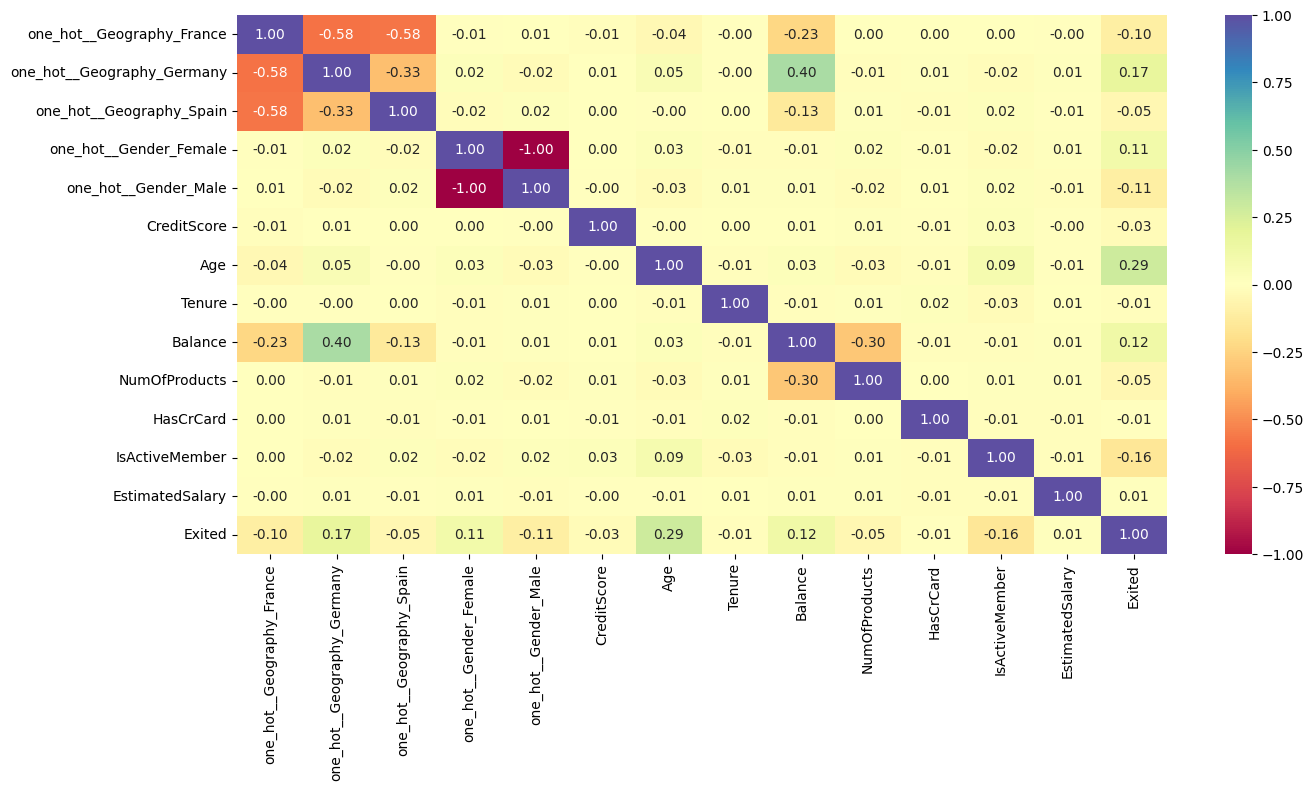

In [ ]:
corr = dataTransformed.corr()


plt.figure(figsize=(15, 7))
sns.heatmap(
    corr, annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show();

**Observations:**

**Moderate Positive Correlations:**
- Balance with Geography_Germany (0.40)
- Age with Exited (0.29)

**Moderate Negative Correlations:**
- NumOfProducts with Balance (-0.30)

**Weak Correlations:**
- Exited with Geography_Germany (0.17)
- Exited with IsActiveMember (-0.16)


### Let's do a data.desribe to see stats

In [ ]:
dataTransformed.describe()

one_hot__Geography_France  one_hot__Geography_Germany  \
count               10000.000000                10000.000000   
mean                    0.501400                    0.250900   
std                     0.500023                    0.433553   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     1.000000                    0.000000   
75%                     1.000000                    1.000000   
max                     1.000000                    1.000000   

       one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
count              10000.000000            10000.000000          10000.000000   
mean                   0.247700                0.454300              0.545700   
std                    0.431698                0.497932              0.497932   
min                    0.000000                0.000000              0.000000   
25%                    0.000000                0.000000              0.000000   
50%                    0.000000                0.000000              1.000000   
75%                    0.000000                1.000000              1.000000   
max                    1.000000                1.000000              1.000000   

        CreditScore           Age        Tenure        Balance  NumOfProducts  \
count  10000.000000  10000.000000  10000.000000   10000.000000   10000.000000   
mean     650.528800     38.921800      5.012800   76485.889288       1.530200   
std       96.653299     10.487806      2.892174   62397.405202       0.581654   
min      350.000000     18.000000      0.000000       0.000000       1.000000   
25%      584.000000     32.000000      3.000000       0.000000       1.000000   
50%      652.000000     37.000000      5.000000   97198.540000       1.000000   
75%      718.000000     44.000000      7.000000  127644.240000       2.000000   
max      850.000000     92.000000     10.000000  250898.090000       4.000000   

         HasCrCard  IsActiveMember  EstimatedSalary        Exited  
count  10000.00000    10000.000000     10000.000000  10000.000000  
mean       0.70550        0.515100    100090.239881      0.203700  
std        0.45584        0.499797     57510.492818      0.402769  
min        0.00000        0.000000        11.580000      0.000000  
25%        0.00000        0.000000     51002.110000      0.000000  
50%        1.00000        1.000000    100193.915000      0.000000  
75%        1.00000        1.000000    149388.247500      0.000000  
max        1.00000        1.000000    199992.480000      1.000000

**Observations:**

**Demographic Insights**

- **Geography:**
  - France (50.14%): Approximately half of the customers are from France.
  - Germany (25.09%): About a quarter of the customers are from Germany.
  - Spain (24.77%): Similarly, about a quarter are from Spain.

- **Gender:**
  - Female (45.43%): Less than half of the customers are female.
  - Male (54.57%): Slightly more than half are male.

**Credit and Financial Insights**

- **Credit Score:**
  - Mean (650.53): The average credit score of customers is around 650.
  - Range (350 - 850): Scores vary widely from 350 to 850.
  - Interquartile Range (584 - 718): The middle 50% of customers have credit scores between 584 and 718.

- **Balance:**
  - Mean (76485.89): The average account balance is approximately 76,486.
  - Range (0 - 250,898): Balances range from 0 to about 250,898.
  - Median (97,198.54): The median balance is quite high, suggesting a skewed distribution.
  - 25% of customers have a balance of 0: A significant number of customers have no balance in their accounts.

- **Estimated Salary:**
  - Mean (100,090.24): The average estimated salary is about 100,090.
  - Range (11.58 - 199,992.48): Salaries range widely from about 12 to nearly 200,000.
- Interquartile Range (51,002.11 - 149,388.25): The middle 50% of customers have estimated salaries between 51,002 and 149,388.

**Customer Behavior Insights**

- **Age:**
  - Mean (38.92): The average age of customers is around 39.
  - Range (18 - 92): Ages range from 18 to 92.
  - Interquartile Range (32 - 44): The middle 50% of customers are between 32 and 44 years old.

- **Tenure:**
  - Mean (5.01 years): The average tenure with the bank is about 5 years.
  - Range (0 - 10 years): Tenures range from 0 to 10 years.
  - Interquartile Range (3 - 7 years): The middle 50% of customers have been with the bank between 3 and 7 years.

- **Number of Products:**
  - Mean (1.53 products): On average, customers have purchased about 1.5 products.
  - Range (1 - 4 products): The number of products ranges from 1 to 4.
  - Interquartile Range (1 - 2 products): The middle 50% of customers have between 1 and 2 products.

- **Credit Card Ownership (HasCrCard):**
  - Mean (0.7055): About 70.55% of customers have a credit card.
- **Active Membership (IsActiveMember):**
  - Mean (0.5151): Slightly more than half of the customers are active members.

- **Churn Insights**

  - Exited:
    - Mean (0.2037): About 20.37% of customers have left the bank.
    - Range (0 - 1): Binary variable indicating whether a customer has exited.


### Univariate Analysis

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.legend(["Mean", "Median"])

    plt.show()
    print("Skewness: %f" % data[feature].skew())
    print("Kurtosis: %f" % data[feature].kurt())
    print('=='*60)

##### A note on Kurtosis:
**Kurtosis:** Kurtosis is a statistical measure that describes the shape of a distribution's tails in relation to its overall shape. Specifically, it indicates how heavy or light the tails of the distribution are compared to a normal distribution.

- **Positive Kurtosis** (Leptokurtic): Distributions with heavy tails and a sharp peak.
- **Negative Kurtosis** (Platykurtic): Distributions with light tails and a flatter peak.
- **Zero Kurtosis** (Mesokurtic): Distributions similar to the normal distribution.

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        legend=False,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

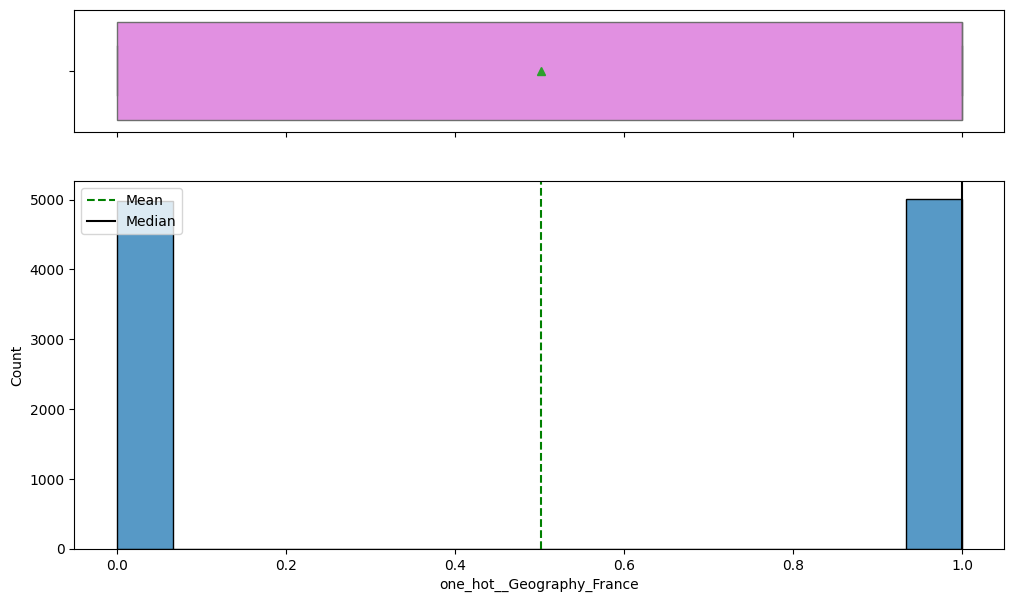

Skewness: -0.005601
Kurtosis: -2.000369


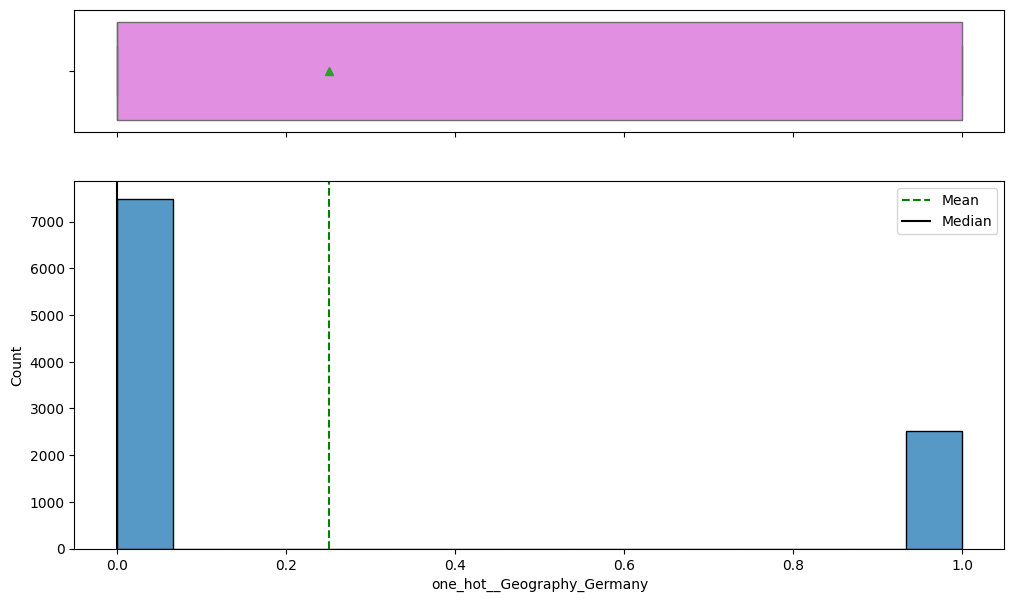

Skewness: 1.149340
Kurtosis: -0.679153


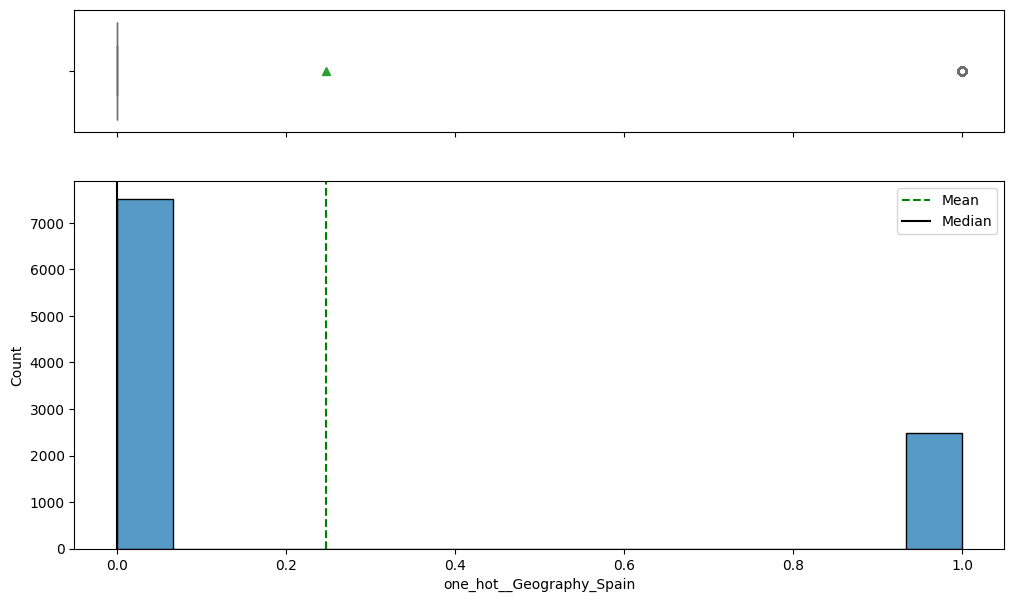

Skewness: 1.169106
Kurtosis: -0.633318


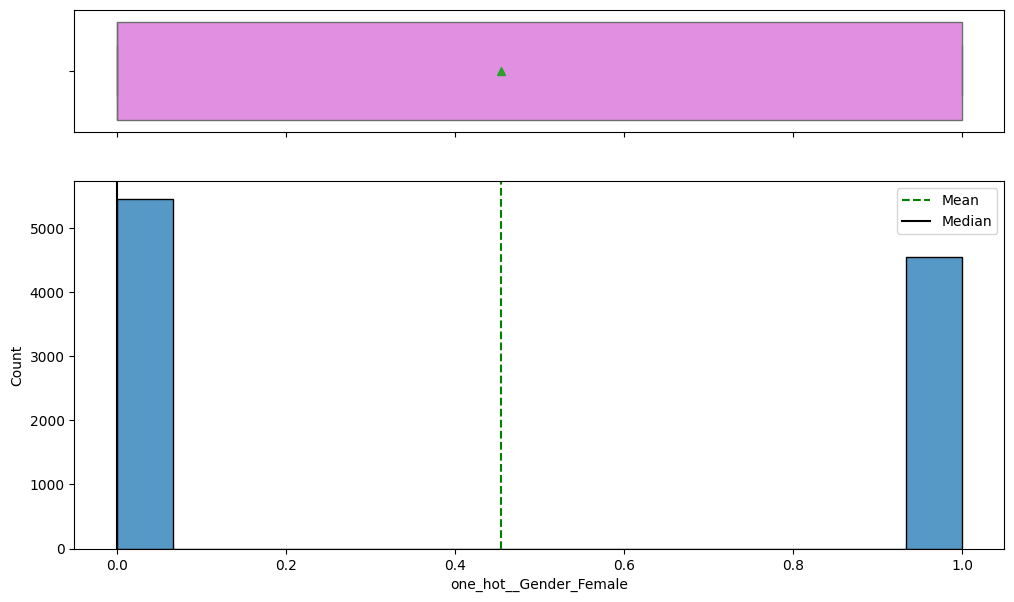

Skewness: 0.183596
Kurtosis: -1.966686


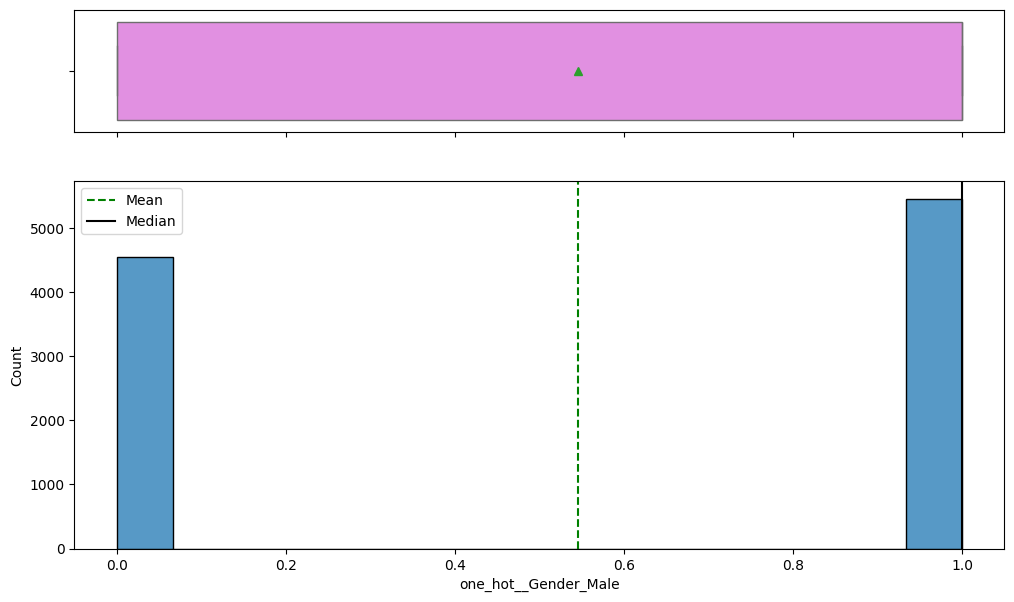

Skewness: -0.183596
Kurtosis: -1.966686


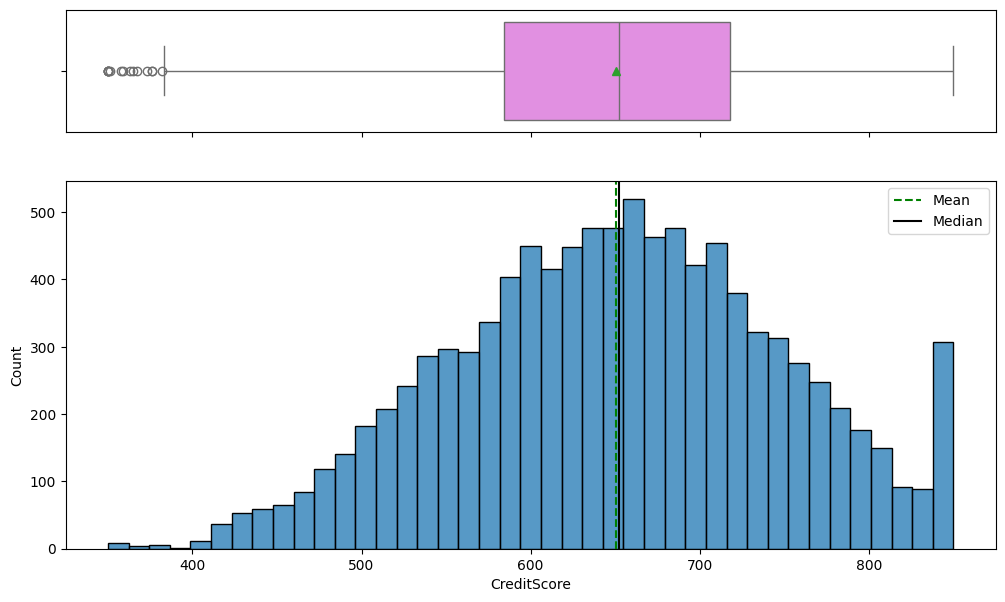

Skewness: -0.071607
Kurtosis: -0.425726


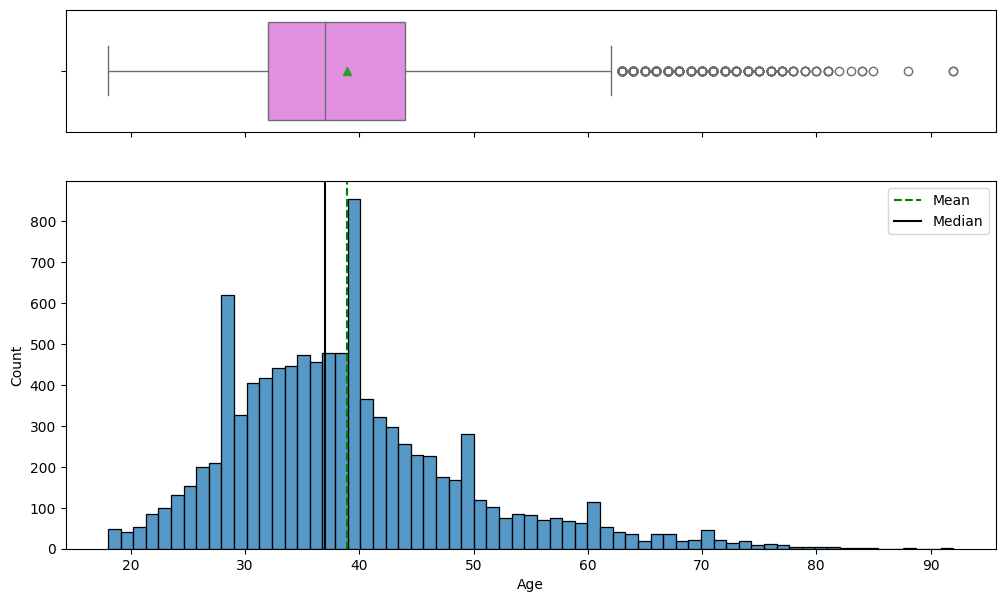

Skewness: 1.011320
Kurtosis: 1.395347


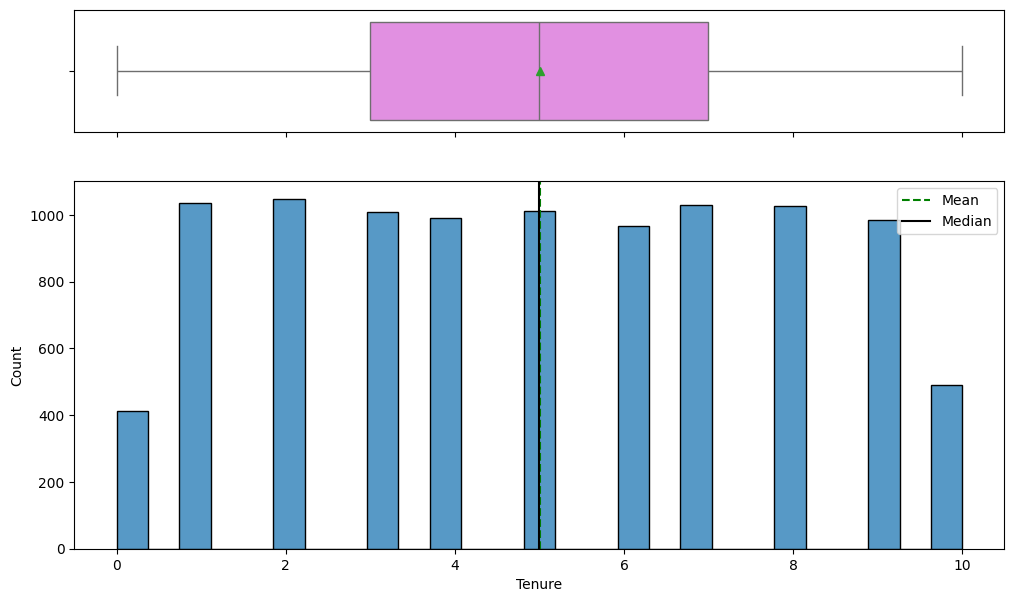

Skewness: 0.010991
Kurtosis: -1.165225


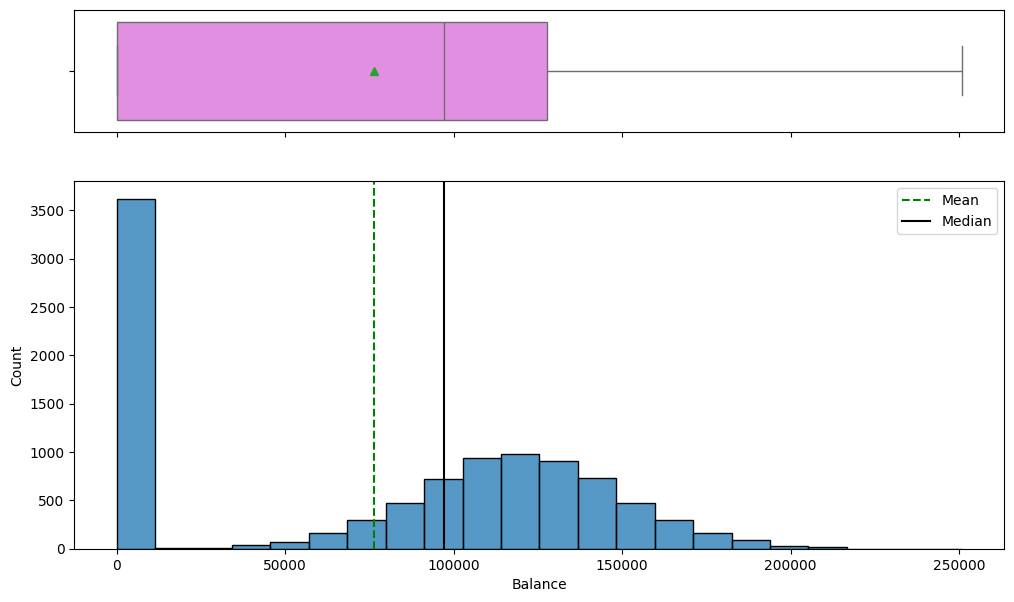

Skewness: -0.141109
Kurtosis: -1.489412


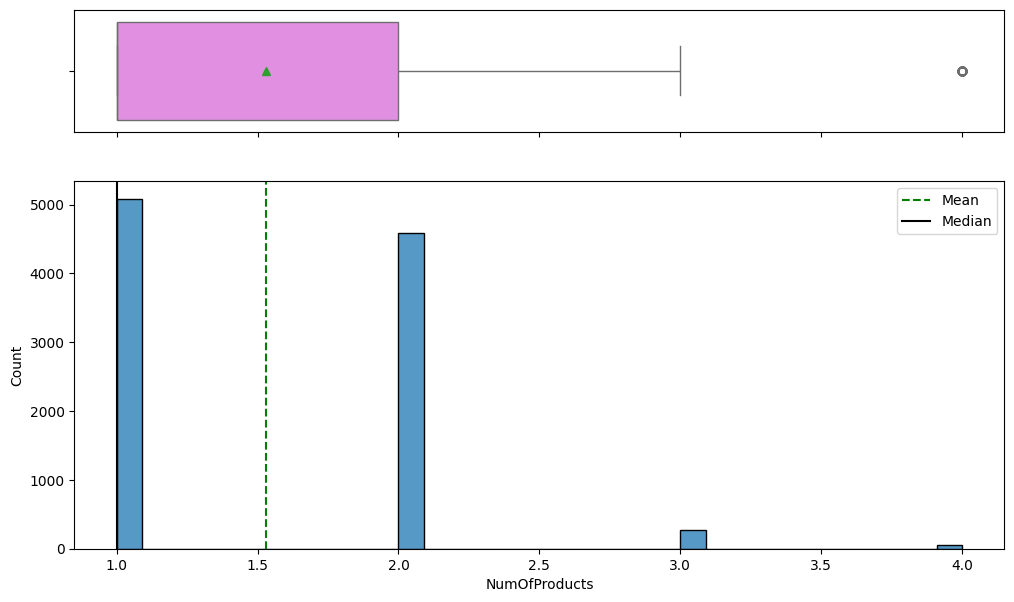

Skewness: 0.745568
Kurtosis: 0.582981


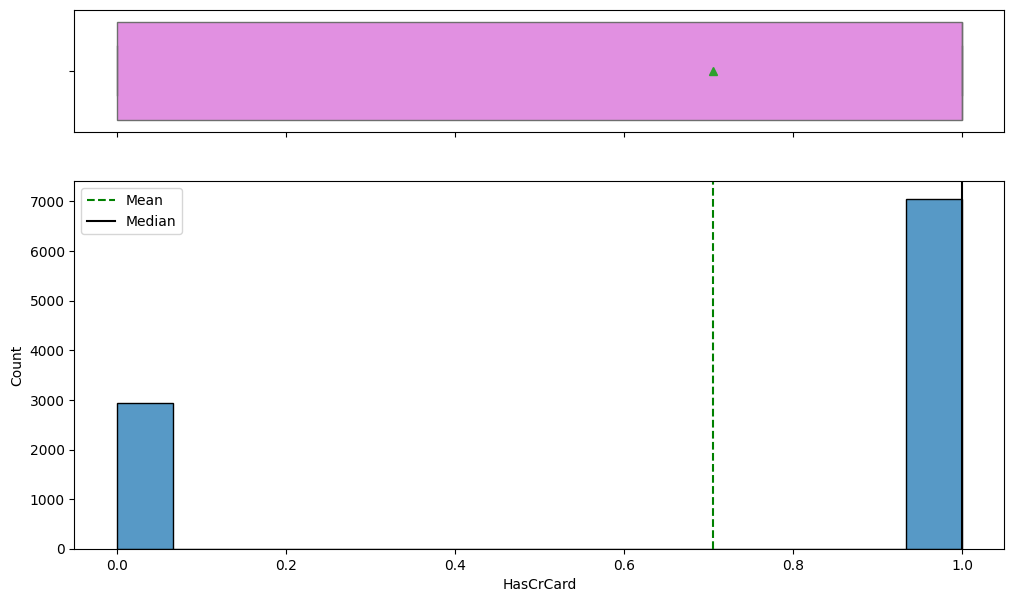

Skewness: -0.901812
Kurtosis: -1.186973


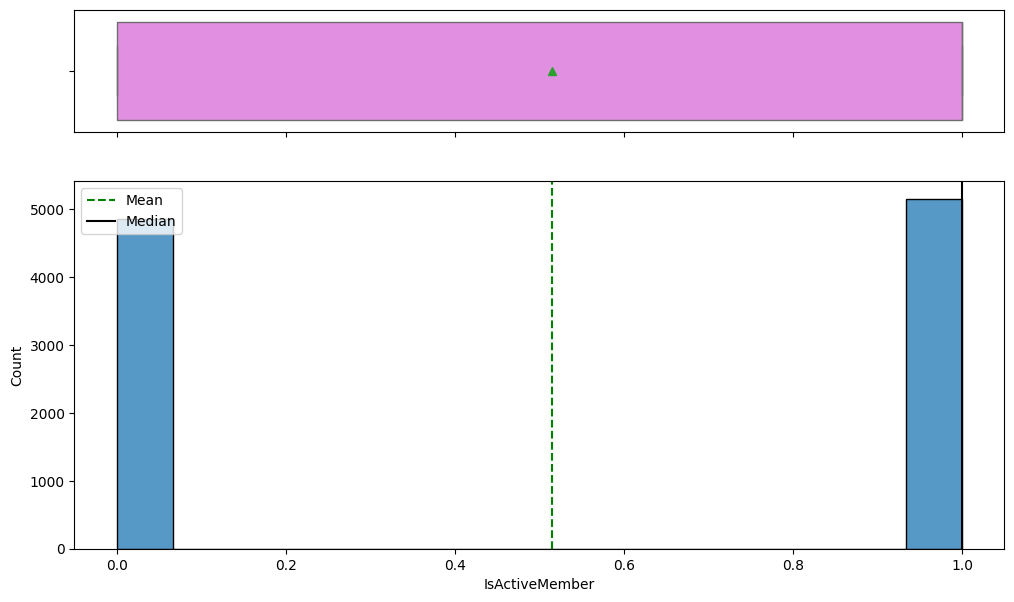

Skewness: -0.060437
Kurtosis: -1.996747


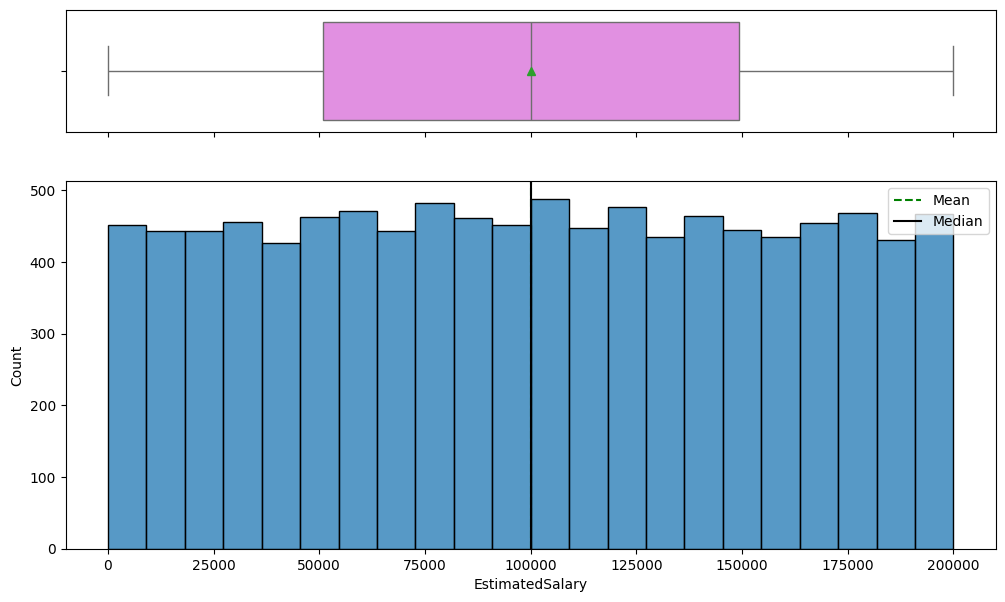

Skewness: 0.002085
Kurtosis: -1.181518


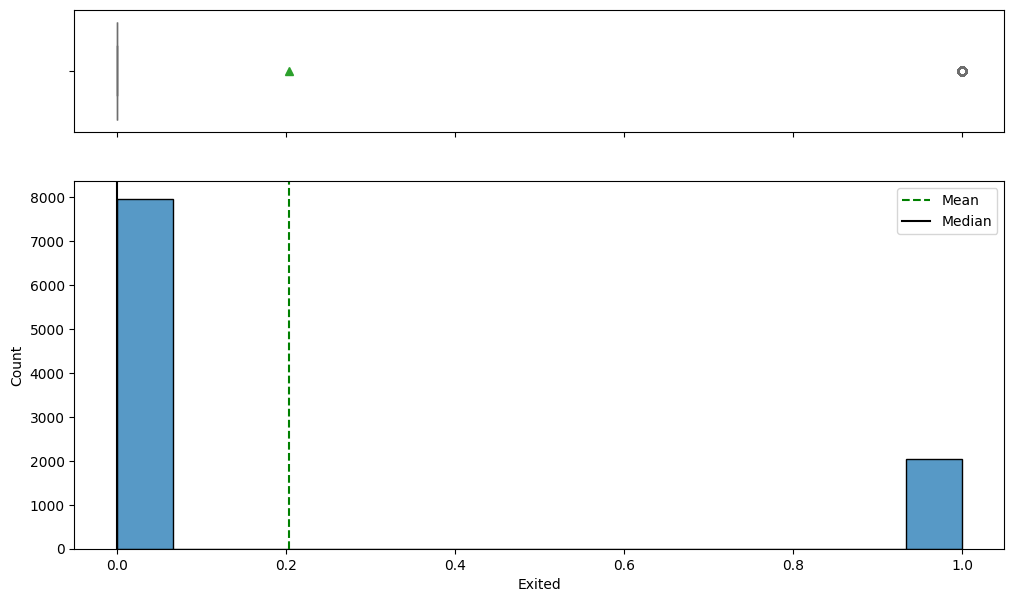

Skewness: 1.471611
Kurtosis: 0.165671


In [ ]:
for i in dataTransformed.columns:
    histogram_boxplot(dataTransformed, i)

Observations:

The observations match up with the analysis from data.describe() function
- Age has many outliers on the positive side

### Let's view our features

In [ ]:
for i, value in enumerate(dataTransformed.columns):
    print(i, value)

0 one_hot__Geography_France
1 one_hot__Geography_Germany
2 one_hot__Geography_Spain
3 one_hot__Gender_Female
4 one_hot__Gender_Male
5 CreditScore
6 Age
7 Tenure
8 Balance
9 NumOfProducts
10 HasCrCard
11 IsActiveMember
12 EstimatedSalary
13 Exited


Observations:
- we have 13 features now

### Filter out CreditScore, Age, balance and EstimatedSalary

In [ ]:
# Indices to exclude
exclude_indices = [5, 6, 8, 12]

# Create a new list excluding the specified indices
filtered_columns = [col for i, col in enumerate(dataTransformed.columns) if i not in exclude_indices]
filtered_columns

['one_hot__Geography_France',
 'one_hot__Geography_Germany',
 'one_hot__Geography_Spain',
 'one_hot__Gender_Female',
 'one_hot__Gender_Male',
 'Tenure',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'Exited']

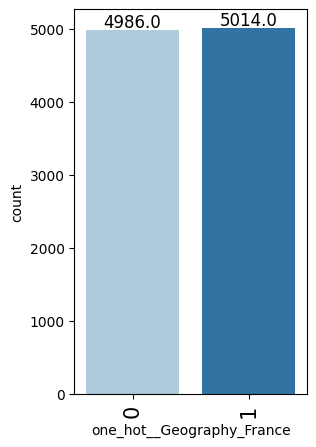

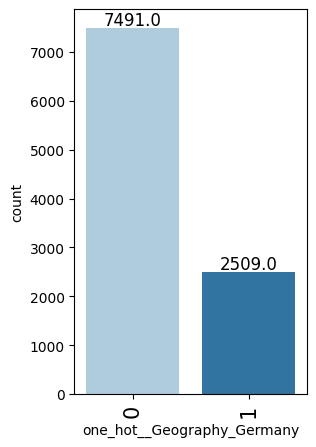

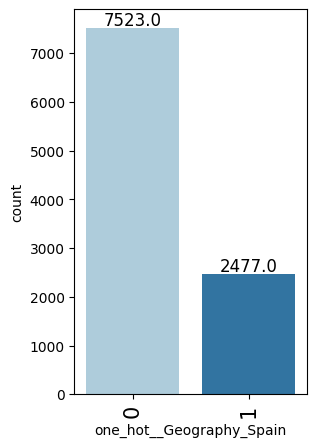

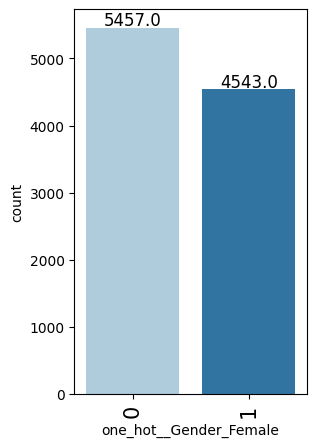

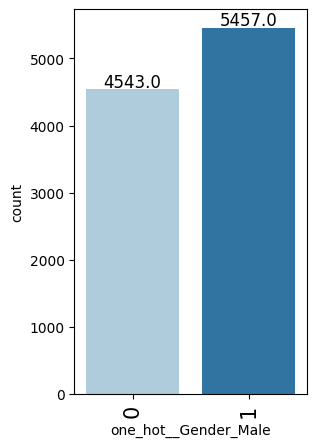

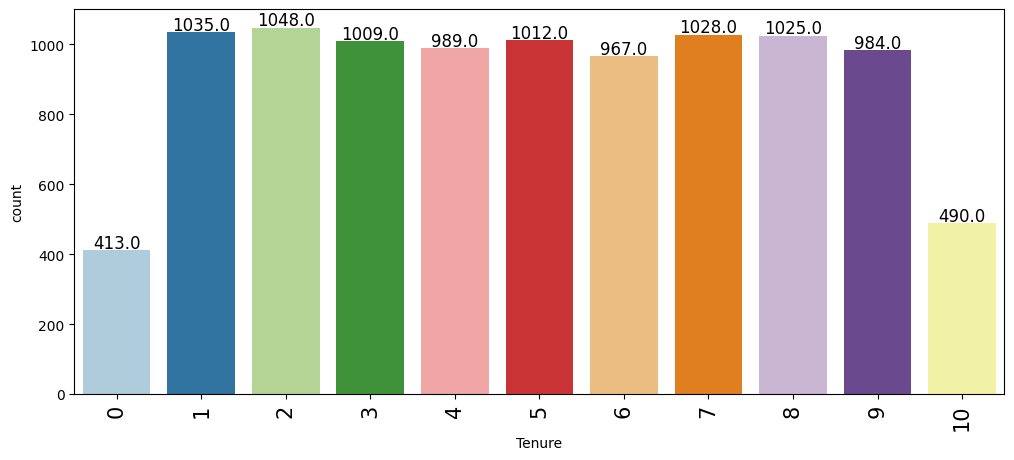

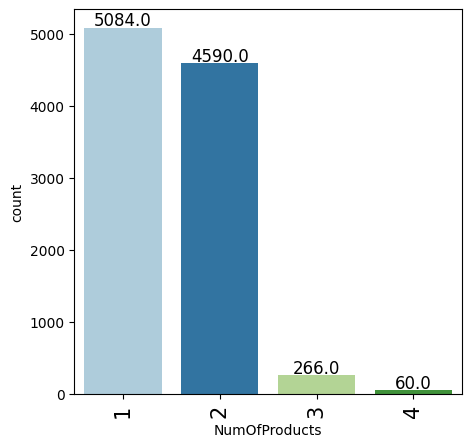

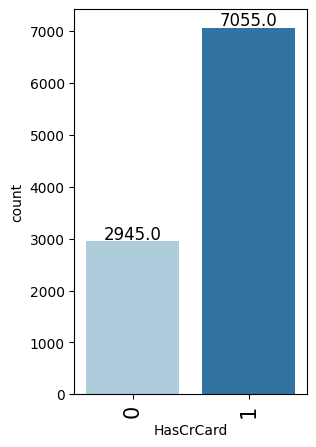

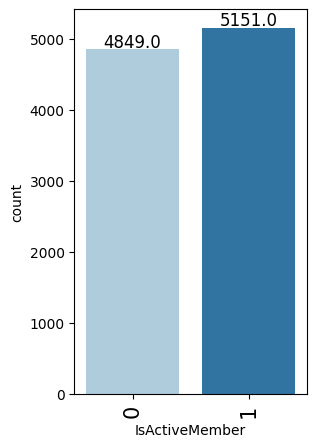

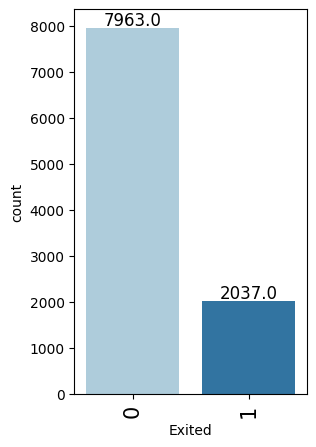

In [ ]:
for i in filtered_columns:
    labeled_barplot(dataTransformed, i)

Observations:

The Observations match up with what we found in the statistical analysis with data.describe()

### Bivariate Analysis

In [ ]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 1, 5))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [ ]:
# Function to plot distribution with respect to target

import matplotlib.pyplot as plt
import seaborn as sns

def distribution_plot_wrt_target(data, predictor, target):
    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()
    target_labels = {0: 'not-Exited', 1: 'Exited'}

    axs[0, 0].set_title("Distribution of target for target=" + target_labels[target_uniq[0]])
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="teal",
    )

    axs[0, 1].set_title("Distribution of target for target=" + target_labels[target_uniq[1]])
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="orange",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, hue=target, ax=axs[1, 0], palette="gist_rainbow")
    # Move the legend to the top right and customize labels
    handles, labels = axs[1, 0].get_legend_handles_labels()
    axs[1, 0].legend(handles, [target_labels[int(label)] for label in labels], loc='upper center')

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="gist_rainbow",
        hue=target
    )
    # Move the legend to the top right and customize labels
    handles, labels = axs[1, 1].get_legend_handles_labels()
    axs[1, 1].legend(handles, [target_labels[int(label)] for label in labels], loc='upper center')

    plt.tight_layout()
    plt.show()


Exited                        0     1    All
one_hot__Geography_France                   
All                        7963  2037  10000
0                          3759  1227   4986
1                          4204   810   5014
------------------------------------------------------------------------------------------------------------------------


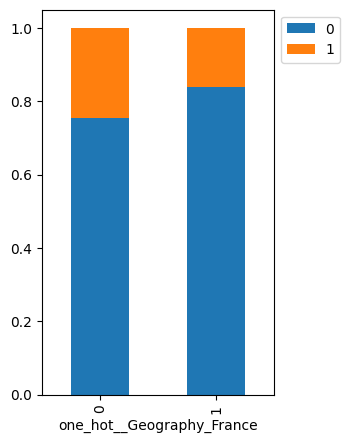

Exited                         0     1    All
one_hot__Geography_Germany                   
All                         7963  2037  10000
0                           6268  1223   7491
1                           1695   814   2509
------------------------------------------------------------------------------------------------------------------------


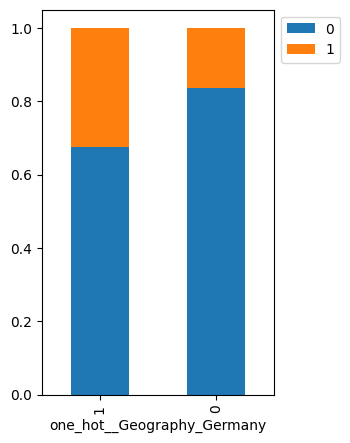

Exited                       0     1    All
one_hot__Geography_Spain                   
All                       7963  2037  10000
0                         5899  1624   7523
1                         2064   413   2477
------------------------------------------------------------------------------------------------------------------------


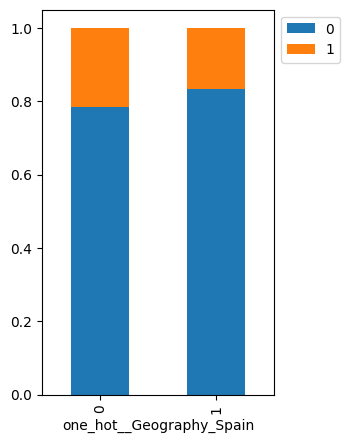

Exited                     0     1    All
one_hot__Gender_Female                   
All                     7963  2037  10000
1                       3404  1139   4543
0                       4559   898   5457
------------------------------------------------------------------------------------------------------------------------


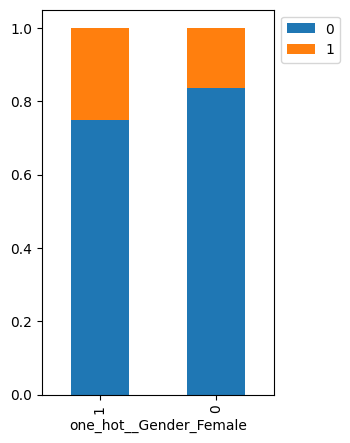

Exited                   0     1    All
one_hot__Gender_Male                   
All                   7963  2037  10000
0                     3404  1139   4543
1                     4559   898   5457
------------------------------------------------------------------------------------------------------------------------


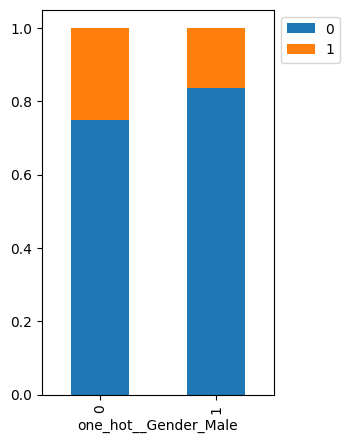

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
9        771   213    984
3        796   213   1009
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


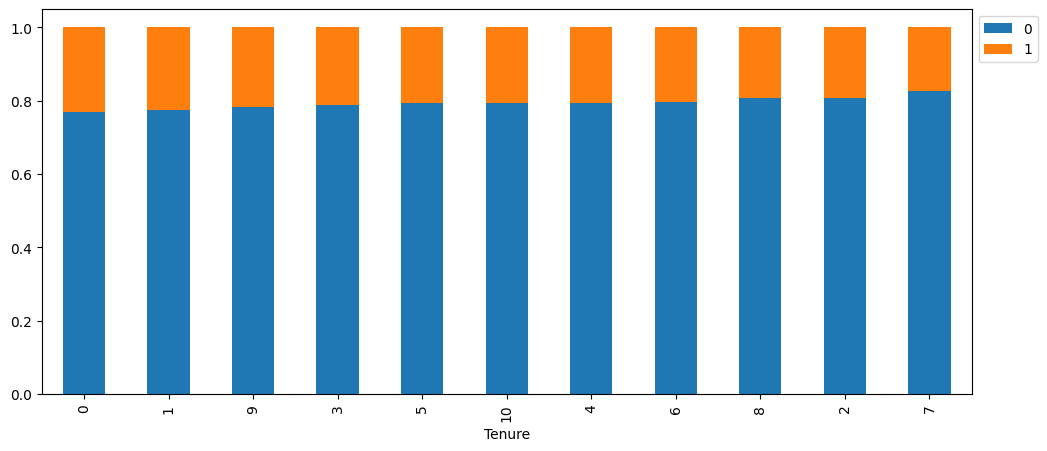

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


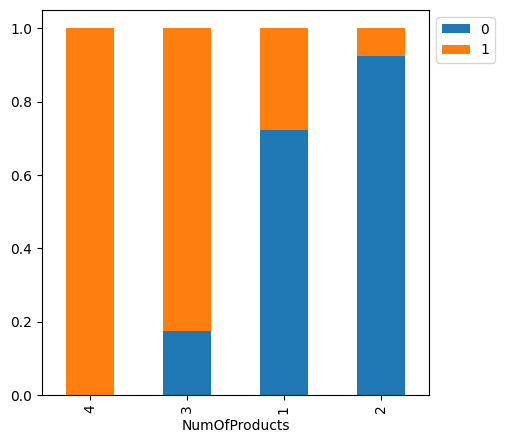

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


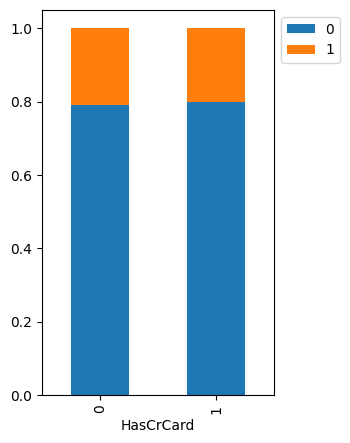

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


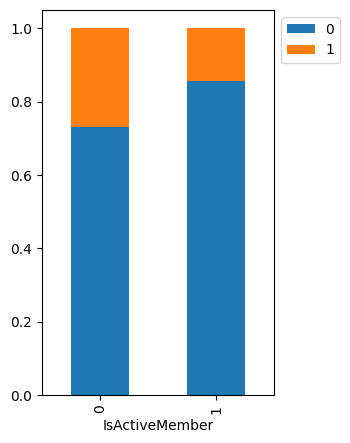

Exited     0     1    All
Exited                   
1          0  2037   2037
All     7963  2037  10000
0       7963     0   7963
------------------------------------------------------------------------------------------------------------------------


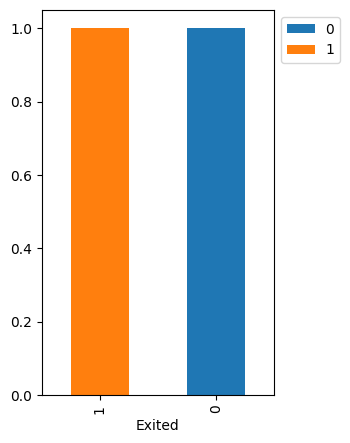

In [ ]:
for i in filtered_columns:
    stacked_barplot(dataTransformed, i, 'Exited')

**Interesting Observations:**

Stacked Bar Chart Insights:

- NumOfProducts = 4: All customers exited
- NumOfProducts = 3: Most customers exited.
- NumOfProducts = 2: Majority did not exit.
- NumOfProducts = 1: Split, but most did not exit.

**Note:**

It can seem counterintuitive at first glance that customers with more products are more likely to exit. However, several factors could explain this phenomenon in a real-world context. Here are some potential reasons:

Potential Reasons for Higher Churn Among Customers with More Products
- Dissatisfaction with Service:
- Customers with more products might have higher expectations from the bank. If these expectations are not met, they might be more inclined to leave despite their higher engagement.
- Complexity and Overload:
  - Having multiple products can sometimes lead to complexity and frustration if the services are not well-integrated or user-friendly.
- Aggressive Sales Tactics:
  - If customers feel they were pressured into buying more products or feel they are not getting value for their money, they might decide to leave.
- Competitive Offers:
  - Customers with more products might be more attractive targets for competitors, who might offer better deals to lure them away.
- Lifecycle Stage:
  - Customers might be at a stage in their life where they are consolidating accounts or moving to a different financial institution for better benefits.
- Financial Stress:
  - Customers with multiple products might be under financial stress, leading them to exit if they are unable to manage their finances effectively.



### Let's look at this with the Histogram with respect to target, to get more insights

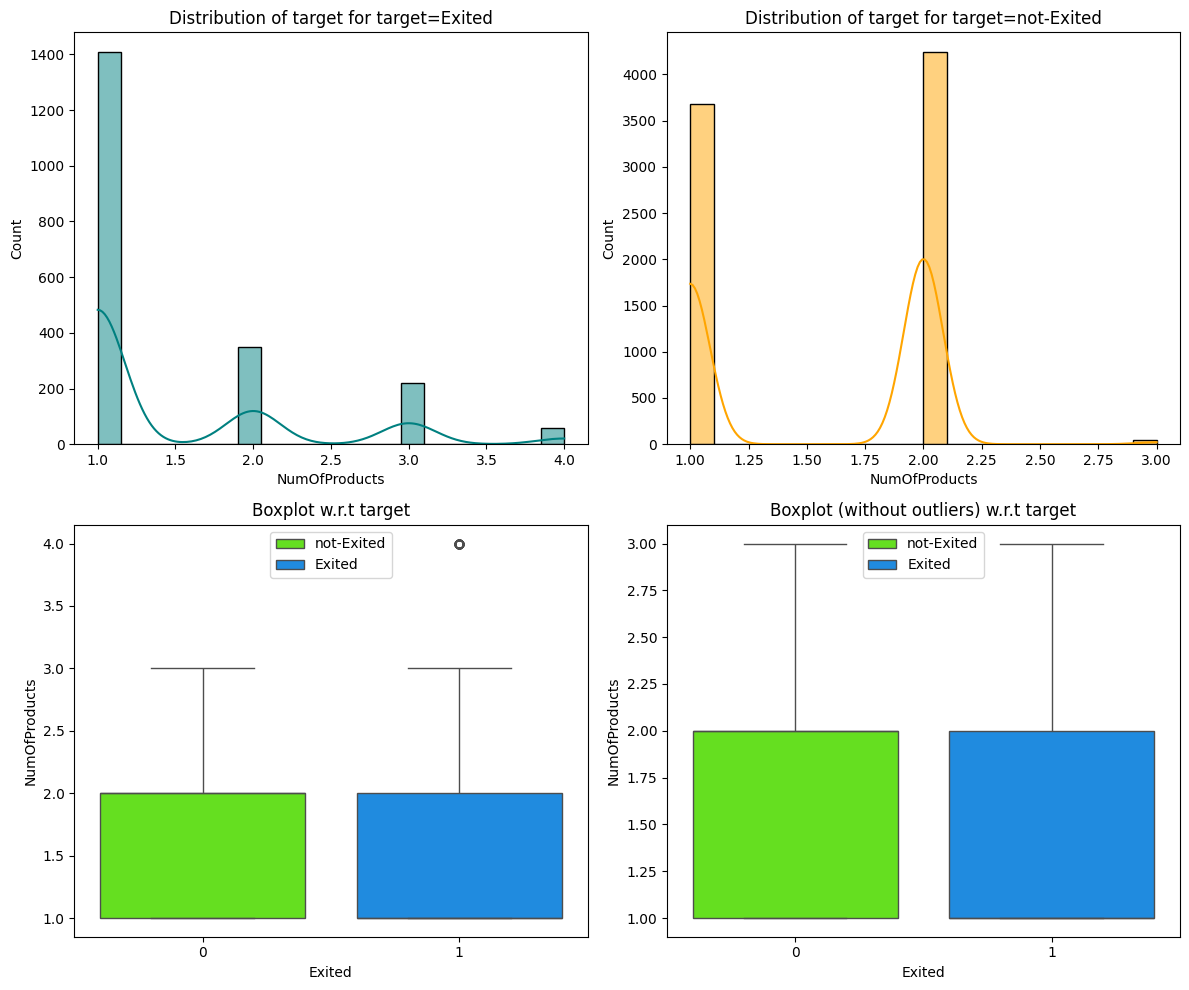

In [ ]:
distribution_plot_wrt_target(dataTransformed, "NumOfProducts", 'Exited')

#### Observations:

**Interpreting the Histogram**
- The height of the bars in the histogram represents the count of customers who have exited for each NumOfProducts category. Let's break down what the histogram shows:

- NumOfProducts = 1:
  - The tallest bar indicates that the largest number of customers who exited had only 1 product.
- NumOfProducts = 2:
  - The second tallest bar shows a significant number of exits for customers with 2 products, but fewer than those with 1 product.
- NumOfProducts = 3:
  - A noticeable bar indicating that some customers with 3 products have exited. This count is smaller compared to those with 1 and 2 products.
- NumOfProducts = 4:
  - A small bar indicates that only a few customers with 4 products have exited. Despite the 100% exit rate for this category (as seen in the stacked bar chart), the total number of customers with 4 products is very low, hence the small bar height.

## Data Preprocessing

### Train-validation-test Split

In [ ]:
# Separate features and target
X = dataTransformed.drop(['Exited'], axis=1)
y = dataTransformed['Exited']

In [ ]:
# Split data into training, validation, and testing sets with stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42, stratify=y_temp)

In [ ]:
print(" Shape of data sets before creating validation test set\n")
print(f"X_temp shape before splitting up validation set: {X_temp.shape}")
print(f"X_test shape before splitting up validation set: {X_test.shape}")
print("\n")
print(f"y_temp shape before splitting up validation set: {y_temp.shape}")
print(f"y_test shape before splitting up validation set: {y_test.shape}")
print("--"*80,"\n")

# Further split the temp set into training and validation sets ( this will decrease the size of temp set)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.3, random_state=1, stratify=y_temp)

print("Shape of data sets after creating validation test set\n")
print("Note that the X_temp data set has been reduced because validation test set is extracted from it\n")
print("X_train shape after splitting up validation set:", X_train.shape[0])
print("X_val shape after splitting up validation set:", X_val.shape[0])
print("X_test shape after splitting up validation set:", X_test.shape[0])
print("\n")
print("y_train shape after splitting up validation set:", y_train.shape[0])
print("y_val shape after splitting up validation set:", y_val.shape[0])
print("y_test shape after splitting up validation set:", y_test.shape[0])



 Shape of data sets before creating validation test set

X_temp shape before splitting up validation set: (4000, 13)
X_test shape before splitting up validation set: (2000, 13)


y_temp shape before splitting up validation set: (4000,)
y_test shape before splitting up validation set: (2000,)
---------------------------------------------------------------------------------------------------------------------------------------------------------------- 

Shape of data sets after creating validation test set

Note that the X_temp data set has been reduced because validation test set is extracted from it

X_train shape after splitting up validation set: 2800
X_val shape after splitting up validation set: 1200
X_test shape after splitting up validation set: 2000


y_train shape after splitting up validation set: 2800
y_val shape after splitting up validation set: 1200
y_test shape after splitting up validation set: 2000


#### Checking class balance for whole data, train set, validation set, and test



In [ ]:
# Checking class balance for whole data, train set, validation set, and test set

y_data_list = ['y', 'y_train', 'y_val', 'y_test']

# Loop to check class balance
for data_name in y_data_list:
    data_set = eval(data_name)
    print(f"Target value ratio in {data_name}:")
    print(f"Data Set Name: {data_set.value_counts(normalize=True)} \n{'-'*80}")

Target value ratio in y:
Data Set Name: Exited
0    0.7963
1    0.2037
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_train:
Data Set Name: Exited
0    0.796429
1    0.203571
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_val:
Data Set Name: Exited
0    0.795833
1    0.204167
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------
Target value ratio in y_test:
Data Set Name: Exited
0    0.7965
1    0.2035
Name: proportion, dtype: float64 
--------------------------------------------------------------------------------


Observation:

Stratify made sure to keep the propotion of target the same in all the data-sets

### Outlier Treatment: Why Treat Outliers ?

- Outliers can disproportionately influence the training process, skewing the model's understanding of the data. Treating them ensures that the model's predictions are not overly influenced by extreme values.

- Outliers in data can significantly affect the performance of machine learning models, including neural networks.

**Reasons to Treat Outliers**
- Improved Model Performance:
- Outliers can skew the results and affect the learning process, potentially leading to a less accurate model.
- Stability:
  - Neural networks, especially when using certain activation functions, can be sensitive to outliers, leading to instability in training.
- Normalization:
  - Many neural network models benefit from normalized input features. Outliers can negatively impact normalization techniques like Min-Max scaling.

- Some ensemble methods, especially those using weaker learners like decision trees, can be affected by outliers. Treating outliers can help improve the accuracy of these models.

- Ensemble methods, such as Random Forest, Gradient Boosting, and Bagging, can be robust to outliers. However, understanding their impact and deciding whether to treat outliers can still be beneficial.

  - Random Forest is generally robust to outliers because it builds multiple decision trees using different subsets of data. However, extreme outliers can still affect individual trees.
  - Gradient Boosting can be more sensitive to outliers, as it builds trees sequentially, and outliers can influence the residuals used in subsequent trees.
  - Like Random Forest, Bagging is relatively robust to outliers but can benefit from outlier treatment to ensure stable performance across all models in the ensemble.

**We will use the clipping method to cap outliers**

let's write a function to handle this


1. List of Columns to Cap:

- rows_to_cap = ['Age'] specifies the columns where you want to cap the upper outliers.

2. Function to Cap Outliers:

- cap_outliers(df, column, cap_value) is a function that caps values in the specified column of the DataFrame df at cap_value.
- It uses np.where to replace values greater than cap_value with cap_value. if not, then put back the value of df[column]

3. Apply Function to Each Column:

- The for loop iterates over each column in rows_to_cap, calculates the 90th percentile value for that column, and applies the cap_outliers function to cap the values.


**explanation for**
```python
np.where(df[column] > cap_value, cap_value, df[column])
```
- if value is > cap_value, replace with cap_value
- if value !> cap_value, then keep the origian value from df[column]

##### first create function for the outlier detection using boxplot

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

def detect_outlier(data, feature, figsize=(8, 4)):
    """
    Boxplot for outlier detection.

    data: DataFrame
    feature: DataFrame column name (str)
    figsize: size of figure (default (12,7))
    """
    plt.figure(figsize=figsize)
    sns.boxplot(
        data=data, x=feature, showmeans=True, color="violet"
    )
    plt.title(f'Boxplot of {feature}')
    plt.xlabel(feature)
    plt.show()

Before Outlier Treatment: X_train for column Age


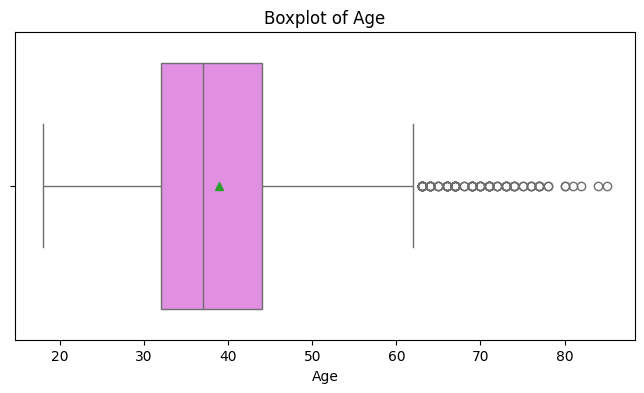

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_val for column Age


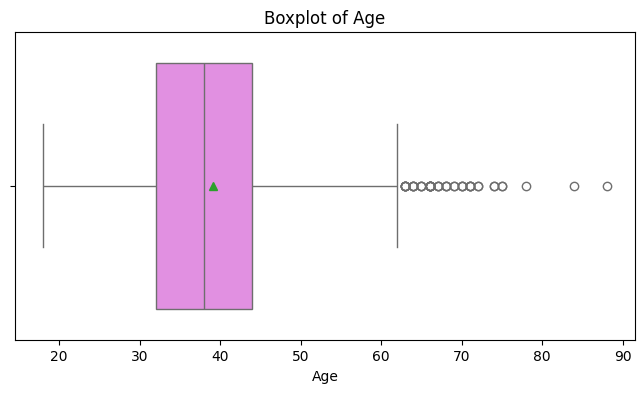

----------------------------------------------------------------------------------------------------------------------------------------------------------------
Before Outlier Treatment: X_test for column Age


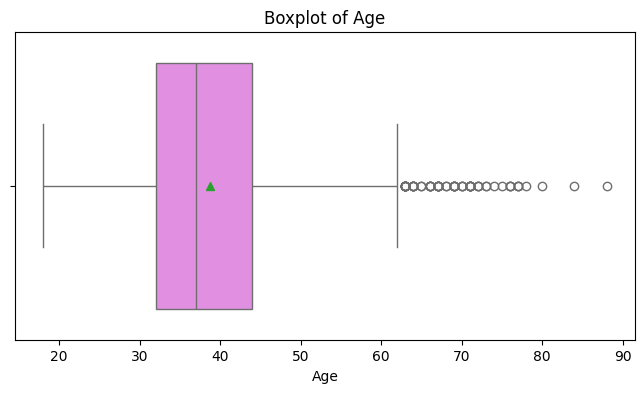

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# create a list with the dataframes to check
dfs_to_check = [X_train, X_val, X_test]

df_name = ['X_train', 'X_val', 'X_test']
columns_to_cap = ['Age']

# run the function
i = 0
for df in dfs_to_check:
    for column in columns_to_cap:
        print(f"Before Outlier Treatment: {df_name[i]} for column {column}")
        detect_outlier(df, column)
        print('--'*80)
    i+=1

##### Create temporary df, so that data_encoded df does not get overwritten, so we can try different values of capping easily

In [ ]:
temp_X_train = X_train.copy()
temp_X_val = X_val.copy()
temp_X_test = X_test.copy()

In [ ]:
# Create list for columns that we will cap for outliers
columns_to_cap = ['Age']

# Define function for capping
def cap_outliers(df, column, upper_cap_value, lower_cap_value):
    df[column] = np.where(df[column] > upper_cap_value, upper_cap_value, df[column])
    df[column] = np.where(df[column] < lower_cap_value, lower_cap_value, df[column])
    return df

# Calculate quantiles from the training data
quantiles = {}
for column in columns_to_cap:
    upper_cap = temp_X_train[column].quantile(0.94)
    lower_cap = temp_X_train[column].quantile(0.00)
    quantiles[column] = (upper_cap, lower_cap)

# Apply function to cap outliers in all datasets
for column in columns_to_cap:
    upper_cap_value, lower_cap_value = quantiles[column]
    temp_X_train = cap_outliers(temp_X_train, column, upper_cap_value, lower_cap_value)
    temp_X_val = cap_outliers(temp_X_val, column, upper_cap_value, lower_cap_value)
    temp_X_test = cap_outliers(temp_X_test, column, upper_cap_value, lower_cap_value)

### Check for outliers after treating

After Outlier Treatment: temp_X_train for column Age


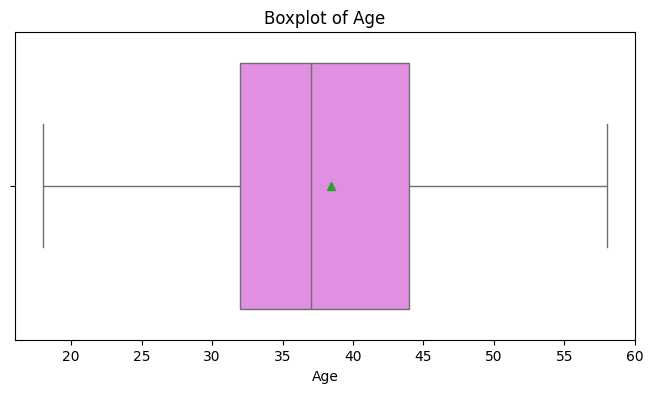

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_val for column Age


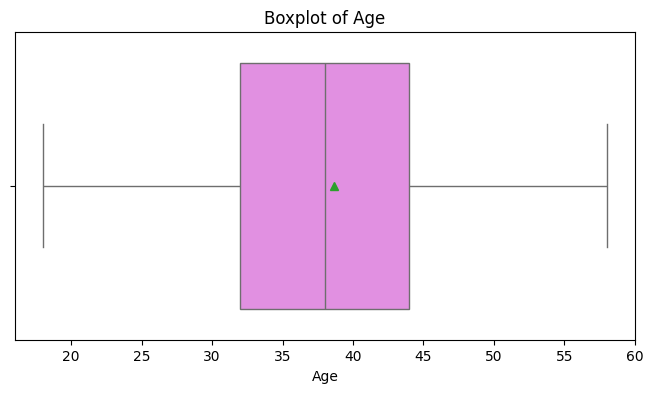

----------------------------------------------------------------------------------------------------------------------------------------------------------------
After Outlier Treatment: temp_X_test for column Age


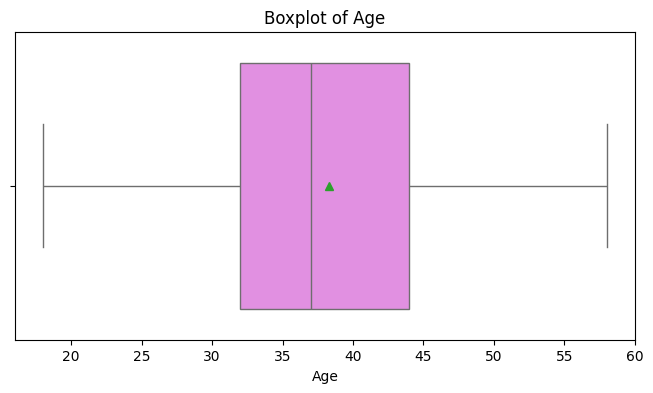

----------------------------------------------------------------------------------------------------------------------------------------------------------------


In [ ]:
# create a list with the dataframes to check
dfs_to_check = [temp_X_train, temp_X_val, temp_X_test]

df_name = ['temp_X_train', 'temp_X_val', 'temp_X_test']
columns_to_cap = ['Age']

# run the function
i = 0
for df in dfs_to_check:
    for column in columns_to_cap:
        print(f"After Outlier Treatment: {df_name[i]} for column {column}")
        detect_outlier(df, column)
        print('--'*80)
    i+=1

Observations:
- No More outliers

### lets copy the temporary data frame back to the originals

In [ ]:
# did outlier treatment, so copying back to original Train, Validate, Test

X_train = temp_X_train.copy()
X_val = temp_X_val.copy()
X_test = temp_X_test.copy()

### Data Normalization

### Why Scaling is Necessary
- Gradient-Based Algorithms: Neural networks and many other machine learning algorithms (like gradient descent) perform better when input features are on a similar scale. This helps in faster convergence.
- Distance-Based Algorithms: Algorithms like k-NN, SVM, and clustering methods rely on distance measures that are sensitive to the scale of the features.
- Regularization: Helps in regularization techniques like L1 and L2 which are sensitive to the scale of the input features.


**Tree-Based Algorithms (No Need to Scale)**
- Random Forests
- Bagging
- Gradient Boosting
- AdaBoost
- XGBoost

These algorithms are robust to the scale of the input features because they use decision trees as their base learners, which split data based on feature values without being influenced by the scale.

**When to Scale**
- Stacking: If you include base learners or a meta-learner that require scaling (e.g., linear models, SVMs), then scaling is recommended for consistency.
- Linear Models (e.g., Logistic Regression, Linear Regression)
- SVMs (Support Vector Machines)
- K-Nearest Neighbors (KNN)
- **Neural Networks**

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Convert the scaled data back to DataFrames
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_val = pd.DataFrame(X_val_scaled, columns=X_val.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [ ]:
display(X_train.head())
display(X_val.head())
display(X_test.head())

one_hot__Geography_France  one_hot__Geography_Germany  \
0                  -1.007169                    1.709260   
1                   0.992882                   -0.585049   
2                  -1.007169                    1.709260   
3                  -1.007169                   -0.585049   
4                  -1.007169                    1.709260   

   one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
0                 -0.564152               -0.918984              0.918984   
1                 -0.564152               -0.918984              0.918984   
2                 -0.564152               -0.918984              0.918984   
3                  1.772572               -0.918984              0.918984   
4                 -0.564152                1.088158             -1.088158   

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     1.214721 -0.258813  1.044579  0.254890       0.815814   0.651315   
1    -0.258009  0.700459 -1.741629 -1.223965      -0.912082   0.651315   
2    -0.029840  0.913630  1.392855  1.212373      -0.912082   0.651315   
3    -0.652120 -0.258813  1.741131 -1.223965       0.815814   0.651315   
4    -1.668512  2.086073 -0.000249  0.544178      -0.912082  -1.535355   

   IsActiveMember  EstimatedSalary  
0        0.960769        -0.488041  
1       -1.040833         1.662868  
2       -1.040833         0.363134  
3        0.960769         1.380711  
4       -1.040833        -1.558894

one_hot__Geography_France  one_hot__Geography_Germany  \
0                  -1.007169                    1.709260   
1                  -1.007169                   -0.585049   
2                   0.992882                   -0.585049   
3                   0.992882                   -0.585049   
4                   0.992882                   -0.585049   

   one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
0                 -0.564152                1.088158             -1.088158   
1                  1.772572               -0.918984              0.918984   
2                 -0.564152                1.088158             -1.088158   
3                 -0.564152               -0.918984              0.918984   
4                 -0.564152                1.088158             -1.088158   

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0     2.096285 -0.791742 -1.393353  0.519417      -0.912082   0.651315   
1     0.125730 -0.578570 -1.045077  0.065075      -0.912082  -1.535355   
2    -3.089386  0.167530 -1.741629  0.555886      -0.912082   0.651315   
3     1.805888  1.233387  0.696303 -1.223965       0.815814   0.651315   
4     1.432520 -0.578570 -1.741629  0.106308      -0.912082  -1.535355   

   IsActiveMember  EstimatedSalary  
0        0.960769         0.542940  
1       -1.040833         0.860489  
2        0.960769         1.241549  
3        0.960769        -1.581892  
4        0.960769         0.939981

one_hot__Geography_France  one_hot__Geography_Germany  \
0                   0.992882                   -0.585049   
1                   0.992882                   -0.585049   
2                   0.992882                   -0.585049   
3                   0.992882                   -0.585049   
4                   0.992882                   -0.585049   

   one_hot__Geography_Spain  one_hot__Gender_Female  one_hot__Gender_Male  \
0                 -0.564152               -0.918984              0.918984   
1                 -0.564152               -0.918984              0.918984   
2                 -0.564152                1.088158             -1.088158   
3                 -0.564152                1.088158             -1.088158   
4                 -0.564152               -0.918984              0.918984   

   CreditScore       Age    Tenure   Balance  NumOfProducts  HasCrCard  \
0    -0.423951 -1.324670 -1.393353 -1.223965      -0.912082   0.651315   
1    -1.284772 -0.685156 -1.393353  1.097006      -0.912082  -1.535355   
2     0.882838 -0.045642 -0.696801  1.301790      -0.912082  -1.535355   
3     2.096285 -0.685156 -0.000249  0.478857      -0.912082   0.651315   
4     2.096285 -0.471985 -1.045077 -0.069217      -0.912082   0.651315   

   IsActiveMember  EstimatedSalary  
0       -1.040833        -1.238130  
1       -1.040833         1.509850  
2       -1.040833        -1.414920  
3       -1.040833         0.365615  
4        0.960769         0.257472

## Model Building

### When to Use Neural Networks or Ensemble Methods


Choosing between neural networks and ensemble methods depends on the nature of the problem, the data, and the specific requirements.

**Neural Networks**
- Strengths:

  - Complex Patterns: Excellent at capturing complex, non-linear relationships in data.
  - High-Dimensional Data: Perform well with large amounts of high-dimensional data, such as images, text, and speech.
  - Feature Engineering: Capable of automatic feature extraction, reducing the need for extensive feature engineering.
  - Adaptability: Highly adaptable to different types of data (e.g., Convolutional Neural Networks for images, Recurrent Neural Networks for sequential data).

- Weaknesses:

  - Data Requirements: Require large amounts of data to perform well.
Computationally Intensive: Require significant computational resources for training and tuning.
  - Training Time: Can take a long time to train, especially with deep architectures.
  - Overfitting: Prone to overfitting, especially with small datasets or if not properly regularized.

- Use Cases:

  - Image classification and object detection.
  - Natural language processing tasks (e.g., sentiment analysis, machine translation).
  - Speech recognition and generation.
  - Complex pattern recognition problems.

Neural Networks: Longer training times, especially for deep architectures.

**Ensemble Methods**
- Strengths:

  - Versatility: Can be applied to a wide range of problems and data types.
  - Performance: Often provide strong performance out-of-the-box with less tuning required compared to neural networks.
  - Robustness: Tend to be robust to overfitting due to combining multiple models.
  - Interpretability: Methods like Random Forests can provide insights into feature importance.

- Weaknesses:

  - Complexity: Ensemble models can be complex and harder to interpret compared to simpler models.
  - Computational Cost: Training and prediction can be computationally intensive, though typically less so than deep neural networks.
  - Scalability: May not scale as well as neural networks for very large datasets or real-time applications.  

- Use Cases:

  - Structured/tabular data with limited sample sizes.
  - Problems where interpretability and understanding feature importance are crucial.
  - Competitions like Kaggle, where ensemble methods often perform well.

  Ensemble Methods: Typically faster to train and can provide quick iterations.

### Model Evaluation Criterion

**Understanding the Business Context**

In this scenario, the primary goal is to predict customer churn (whether a customer will leave the bank or not). Customer churn prediction is a classic classification problem, and the choice of metric should align with the business objective of minimizing churn and understanding customer behavior.

**Key Considerations for Metric Selection**

- Imbalanced Classes: Churn datasets are often imbalanced, with more non-churning customers than churning ones.
- Business Impact: False negatives (predicting a customer will not churn when they actually do) can be costly, as losing a customer impacts revenue.
- Interpretability: The metric should be easy to interpret and actionable for business stakeholders.

**Metrics to Consider**
- Accuracy: Measures the proportion of correctly predicted instances. However, it may not be the best choice for imbalanced datasets.
- Precision and Recall: Precision measures the proportion of positive identifications that were actually correct, while recall (sensitivity) measures the proportion of actual positives that were identified correctly.
- F1 Score: The harmonic mean of precision and recall. It is useful when there is a need to balance precision and recall.
- ROC-AUC: The Area Under the Receiver Operating Characteristic Curve measures the ability of the model to distinguish between classes. It is useful for evaluating overall performance, especially in imbalanced datasets.

**Best Metric for This Scenario**

Given the imbalanced nature of churn datasets and the business impact of false negatives, **F1 Score and ROC-AUC** are often the most appropriate metrics. The business may be concerned with not overburdening its customer retention efforts with too many false positives, making the F1 Score particularly valuable as it balances precision and recall.

However, it is also crucial to ensure that actual churners are not missed (high recall to minimize false negatives).


The ideal model shuld give us:
- **high recall**
- **high F1**
- **high ROC-AUC**


## Let's create some functions that we will use often

### Custom F1 Score

- The F1 score from scikit-learn (sklearn.metrics) is typically used for evaluating model performance after training, not during the training process. Keras and TensorFlow metrics are designed to be used during model training and evaluation in an end-to-end manner

  - tp: True Positive
  - fp: False Positive
  - fn: False Negative

**K.epsilon()** is a small constant used in Keras to prevent numerical instabilities such as division by zero. It is crucial in maintaining the stability and reliability of neural network training and evaluation, especially in custom metrics and loss functions.

### Explaination of how the function works:
`tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'), axis=0)`

**What are True Positives (TP):**
- True Positives are instances where the model correctly predicts the positive class. For binary classification:

  - y_true = 1 (actual class is positive)
  - y_pred = 1 (predicted class is positive)

**Step-by-Step Breakdown:**
1. **Element-wise Multiplication** (y_true * y_pred):
    - Both y_true and y_pred are tensors (typically vectors) of the same shape, containing the true labels and predicted labels, respectively.
    - For a binary classification task, each element in y_true and y_pred is either 0 or 1.
    - When you perform element-wise multiplication (y_true * y_pred):
      - If both y_true[i] and y_pred[i] are 1, the result is 1 (indicating a true positive for that instance).
      - If either y_true[i] or y_pred[i] is 0, the result is 0 (indicating it's not a true positive for that instance).

Example:

```python
# Define your lists
y_true = [1, 0, 1, 1]
y_pred = [1, 0, 1, 0]

# Convert lists to tensors
y_true_tensor = tf.cast(y_true, dtype=tf.float32) # could use tf.constant()
y_pred_tensor = tf.cast(y_pred, dtype=tf.float32)

# Perform element-wise multiplication
result = y_true_tensor * y_pred_tensor

# Print the result
print(f"tensor: {result}")
print(f"dimensions: {result.ndim}")
```
Output:
```csv
tensor: [1. 0. 1. 0.]
dimensions: 1
```


2. **Casting to Float (tf.cast(..., 'float32'))**:
- The multiplication result **[1, 0, 1, 0]** is cast to float32 (even though in this specific case it might not change much, as the result is already numeric). - This casting ensures that subsequent operations are performed in **floating-point precision, which is required for most TensorFlow operations**.

3. **Summing the Values (tf.reduce_sum(..., axis=0)):**
- The tf.reduce_sum(..., axis=0) function sums all the values in the tensor along the specified axis.
- In this context, axis=0 typically sums over the batch dimension. However, if your tensor is a 1D vector, this just sums all the elements.
The sum gives you the total number of true positives.

Example:
```python
tf.reduce_sum([1.0, 0.0, 1.0, 0.0], axis=0) = 1.0 + 0.0 + 1.0 + 0.0 = 2.0
```

**Result:**

**tp = 2.0: This means there are 2 true positives in your predictions.**

In [ ]:
def f1_score(y_true, y_pred):

    # Ensure both y_true and y_pred are of type float32, y_true and y_preds are tensors
    y_true = tf.cast(y_true, "float32")
    y_pred = tf.cast(tf.round(y_pred), "float32")

    # Calculate true positives, false positives, and false negatives
    tp = tf.reduce_sum(tf.cast(y_true * y_pred, 'float32'), axis=0)
    fp = tf.reduce_sum(tf.cast((1 - y_true) * y_pred, 'float32'), axis=0)
    fn = tf.reduce_sum(tf.cast(y_true * (1 - y_pred), 'float32'), axis=0)


   # from tensorflow.keras import backend as K # already done earlier
    precision = tp / (tp + fp + K.epsilon())
    recall = tp / (tp + fn + K.epsilon())


    f1 = 2 * (precision * recall) / (precision + recall + K.epsilon()) # epsilon is used to prevent 0 division error.


    return f1


### Function to plot matrix against Validation Set

In [ ]:
import matplotlib.pyplot as plt

def plot(history, name):
    """
    Function to plot loss/accuracy

    history: an object which stores the metrics and losses.
    name: can be one of Loss, Accuracy, F1_score, auc
    """
    fig, ax = plt.subplots()  # Creating a subplot with figure and axes.
    plt.plot(history.history[name])  # Plotting the train accuracy or train loss
    plt.plot(history.history['val_' + name])  # Plotting the validation accuracy or validation loss

    plt.title('Model ' + name.capitalize())  # Defining the title of the plot.
    plt.ylabel(name.capitalize())  # Capitalizing the first letter.
    plt.xlabel('Epoch')  # Defining the label for the x-axis.

    # Adjusted legend positioning
    ax.legend(['Train', 'Validation'], loc='upper right')  # Placing the legend inside the plot area

    # Display the plot
    plt.show()


### Function to store results (metrics) in a df

In [ ]:
# Create an empty DataFrame to store the metrics
metrics_df = pd.DataFrame(columns=[
    'modelName','# hidden layers', '# neurons - hidden layer', 'activation function - hidden layer',
    '# epochs', 'batch size', 'optimizer', 'time(secs)',
    'Loss', 'Accuracy', 'Precision', 'Recall', 'F1 Score', 'AUC-ROC',
    'Val Loss', 'Val Accuracy', 'Val Precision', 'Val Recall', 'Val F1 Score', 'Val AUC-ROC'
])


def evaluate_and_store_keras_metrics(modelName, layers, neurons, activation, epochs, batch_size, optimizer, history, time_secs, metrics_df):
    loss = history.history['loss'][-1]
    accuracy = history.history['accuracy'][-1]
    precision = history.history['precision'][-1]
    recall = history.history['recall'][-1]
    f1 = history.history['f1_score'][-1]
    auc = history.history['auc'][-1]

    val_loss = history.history['val_loss'][-1]
    val_accuracy = history.history['val_accuracy'][-1]
    val_precision = history.history['val_precision'][-1]
    val_recall = history.history['val_recall'][-1]
    val_f1 = history.history['val_f1_score'][-1]
    val_auc = history.history['val_auc'][-1]

    # Create a DataFrame with the new metrics
    new_metrics = pd.DataFrame([{
        'model': modelName,
        '# hidden layers': layers,
        '# neurons - hidden layer': neurons,
        'activation function - hidden layer': activation,
        '# epochs': epochs,
        'batch size': batch_size,
        'optimizer': optimizer,
        'time(secs)': time_secs,
        'Loss': loss,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'AUC-ROC': auc,
        'Val Loss': val_loss,
        'Val Accuracy': val_accuracy,
        'Val Precision': val_precision,
        'Val Recall': val_recall,
        'Val F1 Score': val_f1,
        'Val AUC-ROC': val_auc
    }])

    # Concatenate the new metrics with the existing DataFrame if not empty
    if metrics_df.empty:
        metrics_df = new_metrics
    else:
        metrics_df = pd.concat([metrics_df, new_metrics], ignore_index=True)

    return metrics_df






### Build the Neural Network

## Let's Review the parameters needed to build the model

### Activation functions (neuron fires or not)

Activation functions are mathematical functions applied to the output of each neuron in a neural network. **They determine whether a neuron should be "activated" or not**, which means they help decide whether the information should be passed forward in the network. Here's a simple explanation of some common activation functions:[link text](https:// [link text](https://))

**Summary of Activation Functions Use Cases:**

- **ReLU:** General-purpose, especially in hidden layers.
- **Tanh:** When you want the output to range between -1 and 1.
- **Sigmoid:** For binary classification or when you need probabilities.
- **Softmax:** For multi-class classification problems.
- **Linear:** For regression tasks, where predicting a continuous value is needed.
- **Step Function:** Used in very simple binary classifiers to make decisions based on a threshold, though rarely used in modern neural networks due to its lack of gradient information for learning.

Each of these activation functions serves a specific purpose, and the choice of which to use depends on the task at hand and the architecture of your neural network.

## Loss Functions

- **Loss:**

1. **binary_cross-entropy** (2 classes only 0 or 1)
- e.g. If your y variable has a **single column with binary values (e.g., 1 for "exited" and 0 for "not exited")**, then you are dealing with a binary classification problem.

- Loss Function: binary_crossentropy
- Output Layer Activation: sigmoid

2. **sparse_categorical_crossentropy** (multiclass more than 2 classes)
Y Variable: **Single column with multiple labels** with integer labels, where each integer corresponds to a class.

- e.g. Y Variable: The y variable contains a single column with integer labels:
Each integer represents a class (e.g., 0, 1, 2, ...).

- Loss Function: sparse_categorical_crossentropy
- Output Layer Activation: softmax

3. **categorical_crossentropy** (one-hot)

if your y variable has **two or more columns, i.e. one-hot**, one for "exited" and one for "not exited," you're dealing with a multi-class classification problem. Each instance will have a one-hot encoded label where one of the columns is 1 and the other is 0.

- Loss Function: categorical_crossentropy
- Output Layer Activation: softmax



### Optimization functions (update weights)

**Adam and SGD **(Stochastic Gradient Descent) are both optimization algorithms used to update the weights of a neural network during training, but they do so in different ways.

**SGD (Stochastic Gradient Descent)**
  - How it Works: SGD updates the model's weights using the gradient of the loss function with respect to each weight. It does this for each mini-batch of data during training.
  - Learning Rate: SGD uses a fixed learning rate throughout the training, which determines how big the steps are when updating the weights.
  - Pros: Simple and effective, especially for large datasets.
  - Cons: The fixed learning rate can make it harder to find the optimal solution quickly. It might take smaller steps in regions where larger steps are needed and larger steps where smaller ones would be better.

**Adam (Adaptive Moment Estimation)**
  - How it Works: **Adam builds on SGD** by adjusting the learning rate for each weight individually, based on both the average of the gradients (**like momentum**) and the average of the squared gradients (**like RMSprop**). It adapts the learning rate dynamically for each parameter during training.
  - Learning Rate: Adam starts with a default learning rate, but it adjusts over time for each weight based on the historical gradients.
  - Pros: Faster convergence, especially on noisy data or in cases where the gradients vary widely in scale. It often works well "out of the box" with default settings.
  - Cons: More complex and computationally expensive compared to SGD. In some cases, it might lead to overfitting or less generalization.

**SGD:** Updates weights after each mini-batch using a fixed learning rate (specified by the user).

**Adam:** Updates weights after each mini-batch but with an adaptive learning rate for each parameter based on past gradients.  In Adam, you still need to specify a learning rate, but Adam is designed to work well with its default learning rate (0.001) in many cases. The learning rate in Adam is typically less critical to tune than in SGD because Adam adapts the learning rate for each parameter during training.

#### What is Dropout:

**Dropout** is a regularization technique used in neural networks to prevent overfitting. It works by randomly "dropping out" (i.e., setting to zero) a fraction of the neurons during each training iteration. This prevents the neurons from co-adapting too much to the training data, thus improving the model's ability to generalize to unseen data.

### What is Early Stopping:

**Early Stopping**

Early stopping is a regularization technique used to prevent overfitting in machine learning models, particularly neural networks. The basic idea is to monitor the model's performance on a validation set during training and stop the training process when the performance on the validation set starts to degrade, which indicates that the model is beginning to overfit the training data.

**How Early Stopping Works**

**Training Phase:**

Train the model on the training data.
After each epoch (a full pass through the training data), evaluate the model's performance on the validation set.

**Monitoring:**

Keep track of the chosen performance metric (e.g., validation loss, validation accuracy, etc.).
If the performance metric does not improve after a certain number of epochs (patience), stop the training process.

**Restoring Best Weights:**

Optionally, restore the model weights to the state corresponding to the best performance on the validation set.

### Epochs and Batch sizes

**Epoch:**
- Small Number of Epochs: May result in underfitting where the model does not learn enough from the training data.
- Large Number of Epochs: May lead to overfitting where the model learns noise in the training data. Early stopping can be used to monitor validation loss and stop training when performance starts to degrade.
- Typical Range: Common values range from 10 to several hundred, depending on the complexity of the model and dataset.

**Batch Size:**

- Small Batch Size: Can lead to noisy updates but allows the model to learn more finely from the data.
- Large Batch Size: Provides smoother updates and faster training but requires more memory.
- Typical Range: Common values include 16, 32, 64, 128, etc. Powers of 2 are often used because of computational efficiency on hardware like GPUs.


### How training and validation works

**1. Training Phase (on X_train and y_train):**
- The model goes through all the training samples in X_train in batches (e.g., 32 samples per batch).

- For each batch:
  - The model makes predictions on the input data in that batch.
  - It then compares the predictions with the true labels in y_train_over for that batch to compute the loss (e.g., **using loss function: cross-entropy for classification tasks, binary cross-entropy for multi-class classification**).
  - The model updates its weights based on the computed loss using backpropagation and an optimization algorithm (e.g., SGD, Adam).
- This process continues until all the samples in X_train have been used once (completing one epoch).

**2. Validation Phase (on X_val and y_val):**
- After the training phase for that epoch is complete, the model evaluates its performance on the validation set (X_val and y_val).
- The model makes predictions on the entire validation set.
- It calculates the validation loss by comparing these predictions with the true labels in y_val.
- This validation loss is then used to monitor the model's performance (using unseen data) and check for overfitting.
- If the model is overfitting, the validation loss will start to increase while the training loss continues to decrease. This indicates that the model is becoming too specialized in the training data and is not generalizing well to new data.
    - **Early Stopping:** If early stopping is implemented, the training process can be halted **when the validation loss stops improving for several consecutive epochs**, to prevent further overfitting.
    - Without early stopping, the model continues training for the full number of epochs, but you might notice that the final model doesn't generalize well if overfitting occurs.


**3. Repeat for Each Epoch:**
- The above steps are repeated for the specified number of epochs (let's say, 100 epochs).
- After each epoch, you can see the training loss and validation loss, which helps you understand how well the model is learning.

**In summary:**
During each epoch, the model first trains on the training data (X_train, y_train), and then evaluates its performance on the validation data (X_val, y_val).

### Batch Normalization


- Batch Normalization is a technique used in deep learning to make neural networks train faster and more reliably. It helps address some common issues that can slow down the training process or cause it to become unstable.

- When training deep neural networks, one of the challenges is that the distribution of inputs to each layer can change during training as the parameters of the previous layers change. This is known as internal covariate shift. This shift can slow down training because the network has to continuously adapt to these changing distributions.

**Why batch Normalization is more commonly used with ReLU Activation**
**Activation Range**
- ReLU outputs values in the range $[0, \infty)$
, which can lead to a wide range of activation outputs."
puts "Batch Normalization helps to normalize these outputs, keeping them in a more stable range, which aids in training.

**Avoiding Saturation**
- ReLU does not saturate, meaning it doesn’t suffer as much from the vanishing gradient problem.
- When combined with Batch Normalization, this can lead to more stable and faster training."

**Why It’s Less Common with tanh:**
Activation Range of tanh: The tanh function outputs values in the range
**$[−1,1]$**, which is already centered around zero and relatively stable. The need to normalize these values is less critical compared to the wide range of ReLU outputs.


### What is Momentum in Neural Network Optimization?
- Momentum is a technique used in optimization algorithms, like Stochastic Gradient Descent (SGD), to help accelerate the convergence of a neural network during training. It is inspired by the concept of momentum in physics.

- When training a neural network, the optimization process can sometimes be slow and unstable. This can happen due to the zig-zagging motion of the updates, especially in regions of the loss landscape where gradients vary widely. Momentum helps to smooth out these updates and speed up the training process.

- In the Adam optimizer, you don't need to explicitly specify a separate value for momentum because the momentum-like behavior is built into the optimizer by default. The momentum effect in Adam is controlled by the hyperparameter $β₁$.

- **0.9 is a Good Default**: Starting with 0.9 is a solid choice for most scenarios.

## First Model: Define and compile model:  SGD, relu

#### Let's clear the Keras backend first

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'relu'
modelName = 'model1-SGD_relu'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])



### View the summary of the Neural Network Model

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

### Explanation of model.summary()

**Layers and Output Shapes**



1. **`dense` (Dense Layer 1):**
   - **Output Shape:** `(None, 16)`
     - This indicates that the output of this layer is a tensor with an unspecified batch size (`None` means any batch size) and 16 units (neurons). batch size is specified during fitting
   - **Param # (Parameters):** `224`
     - This is the total number of trainable parameters in this layer. It includes weights and biases.
     - **Calculation:**  
       - The number of input features is
       - Number of weights:
       input_dim=𝑋_train.shape[1]

       - Number of biases: 16
       - Total: 14 * 16 + 16 = 224

2. **`dense_1` (Dense Layer 2):**
   - **Output Shape:** `(None, 16)`
     - Like the first dense layer, this layer also outputs 16 units.
   - **Param # (Parameters):** `272`
     - This is the total number of trainable parameters in this layer.
     - **Calculation:**  
       - Number of weights:
       16 * 16 (since the previous layer has 16 outputs)
       - Number of biases: 16
       - Total: 16 * 16 + 16 = 272

3. **`dense_2` (Dense Layer 3, Output Layer):**
   - **Output Shape:** `(None, 1)`
     - This layer outputs a single unit, which is typical for a binary classification problem, where the output is a probability.
   - **Param # (Parameters):** `17`
     - This is the total number of trainable parameters in this layer.
     - **Calculation:**  
       - Number of weights: 16 * 1 = 16
       - Number of biases: 1
       - Total: 16 + 1 = 17

### Summary of Parameters

- **Total params:** `513`
  - This is the sum of all the parameters


### Train the model cross-validate using Validation data set


In [ ]:
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 49ms/step - accuracy: 0.7244 - auc: 0.5180 - f1_score: 0.1537 - loss: 0.5914 - precision: 0.2451 - recall: 0.1260 - val_accuracy: 0.7800 - val_auc: 0.5636 - val_f1_score: 0.0614 - val_loss: 0.5285 - val_precision: 0.2564 - val_recall: 0.0408
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7719 - auc: 0.5577 - f1_score: 0.0658 - loss: 0.5445 - precision: 0.3145 - recall: 0.0399 - val_accuracy: 0.7950 - val_auc: 0.5994 - val_f1_score: 0.0510 - val_loss: 0.5057 - val_precision: 0.4706 - val_recall: 0.0327
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7802 - auc: 0.5954 - f1_score: 0.0460 - loss: 0.5252 - precision: 0.4374 - recall: 0.0233 - val_accuracy: 0.7933 - val_auc: 0.6290 - val_f1_score: 0.0251 - val_loss: 0.4928 - val_precision: 0.3636 - val_recall: 0.0163
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7818 - auc: 0.6287 - f1_score: 0.0328 - loss: 0.5122 - precision: 0.4937 - recall: 0.

### Plot results

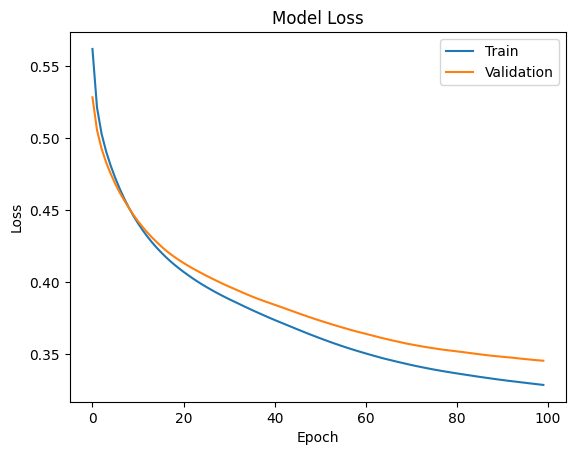

None

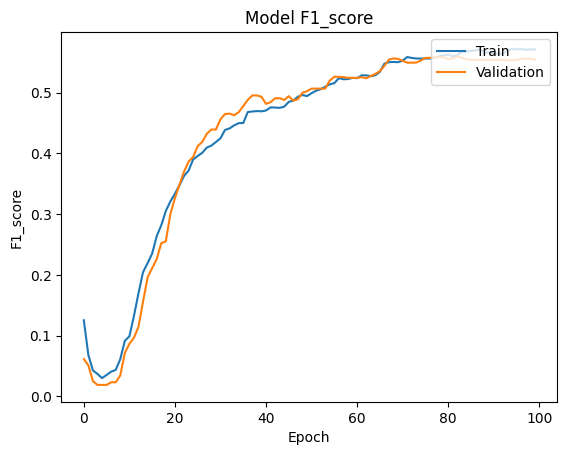

None

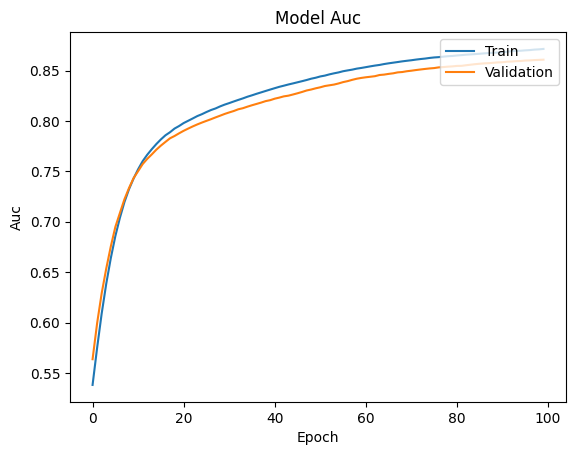

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:



The loss curve depicted in the figure illustrates the training and validation loss as a function of the number of epochs during the training process of a machine learning model. The horizontal axis represents the number of epochs, while the vertical axis denotes the loss.

**Training vs. Validation Loss**

- **Training Loss**: The blue curve represents the training loss, which consistently decreases as the number of epochs increases. This indicates that the model is effectively learning from the training data, as the error on the training set is steadily being minimized.

- **Validation Loss**: The orange curve represents the validation loss. Similar to the training loss, the validation loss also decreases over time, suggesting that the model generalizes well to unseen data. However, the validation loss is consistently higher than the training loss, which is a common occurrence and typically indicates that the model may still have room for improvement in terms of generalization.

**Convergence and Overfitting Analysis**

- **Convergence**: Both the training and validation loss curves are steadily decreasing, and by the final epoch, they are approaching a lower bound. This suggests that the model is converging well, as there is no indication of divergence or instability in the training process.

- **Overfitting**: Although the validation loss is slightly higher than the training loss, the difference between them does not increase significantly over time. This indicates that the model does not appear to be overfitting, as the generalization error remains controlled throughout the training process.

**Conclusion**

The loss curves suggest that the model is training effectively with a good balance between fitting the training data and generalizing to the validation data. To further optimize performance, potential strategies could include adjusting the learning rate, experimenting with regularization techniques, or incorporating early stopping to prevent overfitting in longer training runs.


### view results

In [ ]:
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=hidden_layers,
    neurons=neurons,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    time_secs= timedur,
    metrics_df=metrics_df
)

metrics_df

model  # hidden layers  # neurons - hidden layer  \
0  model1-SGD_relu                2                        16   

  activation function - hidden layer  # epochs  batch size optimizer  \
0                               relu       100          32       SGD   

   time(secs)      Loss  Accuracy  Precision    Recall  F1 Score   AUC-ROC  \
0   67.865583  0.328731  0.864286    0.75266  0.496491  0.571013  0.871472   

   Val Loss  Val Accuracy  Val Precision  Val Recall  Val F1 Score  \
0  0.345542      0.848333       0.668449    0.510204      0.554162   

   Val AUC-ROC  
0     0.860797

### Observations:

**Conclusions:**

Key Observations:

**Loss:**

- The loss for both the training and validation sets shows a decreasing trend, which indicates that the model is learning effectively over time.
The final training loss (0.328731) is slightly lower than the validation loss (0.345542), which is a positive sign of good model generalization with minimal
overfitting.

**Accuracy:**

- The model achieves high accuracy on both the training (86.43%) and validation (84.83%) datasets, suggesting that the model is able to classify the data with a relatively high degree of correctness.

**Precision and Recall:**

- Precision is higher for the training set (75.27%) than for the validation set (66.84%), indicating that the model is better at correctly identifying positive cases during training than on unseen data.
- Recall is lower for both training (49.65%) and validation (51.02%) sets, pointing to a trade-off where the model may not be capturing all positive instances effectively.

**F1 Score:**
- The F1 Score, which balances precision and recall, is moderate for both the training (57.10%) and validation (55.42%) sets. This suggests that while the model is reasonably effective, there is still room for improvement, particularly in balancing precision and recall.

**AUC-ROC:**
- The AUC-ROC scores for both training (0.871472) and validation (0.860797) sets are high, indicating that the model has a strong ability to distinguish between positive and negative classes.

**Model Performance:**

- Model1-SGD_relu performs consistently across the training and validation sets, with a solid overall performance as evidenced by the accuracy and AUC-ROC scores.
- However, there is a noticeable gap between precision and recall, indicating that while the model is good at identifying true positives, it may miss some positive instances.


This analysis indicates that Model1-SGD_relu is a robust model with good generalization capabilities, but with some areas that could benefit from further fine-tuning, especially in balancing precision and recall.

## Second Model: Define and compile model:  
- SGD, relu, dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'relu'
modelName = 'model2-SGD_relu_dropout'

# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Define and compile your model with Adam optimizer and Dropout layers
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score])


### View the summary of the Neural Network Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100
batch_size = 32

# Train the model and get the history object
start_time = time.time()
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end_time = time.time()
traindur = end_time - start_time
print(f"Training time: {traindur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 10s 64ms/step - accuracy: 0.3557 - auc: 0.5160 - f1_score: 0.3473 - loss: 1.0413 - precision: 0.2274 - recall: 0.8149 - val_accuracy: 0.6842 - val_auc: 0.4484 - val_f1_score: 0.1352 - val_loss: 0.6304 - val_precision: 0.1582 - val_recall: 0.1265
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.6049 - auc: 0.4947 - f1_score: 0.2542 - loss: 0.6881 - precision: 0.2248 - recall: 0.3329 - val_accuracy: 0.7967 - val_auc: 0.4664 - val_f1_score: 0.0053 - val_loss: 0.5552 - val_precision: 1.0000 - val_recall: 0.0041
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7121 - auc: 0.5276 - f1_score: 0.1765 - loss: 0.6125 - precision: 0.2516 - recall: 0.1575 - val_accuracy: 0.7958 - val_auc: 0.5276 - val_f1_score: 0.0000e+00 - val_loss: 0.5239 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7515 - auc: 0.5335 - f1_score: 0.1387 - loss: 0.5822 - precision: 0.2981

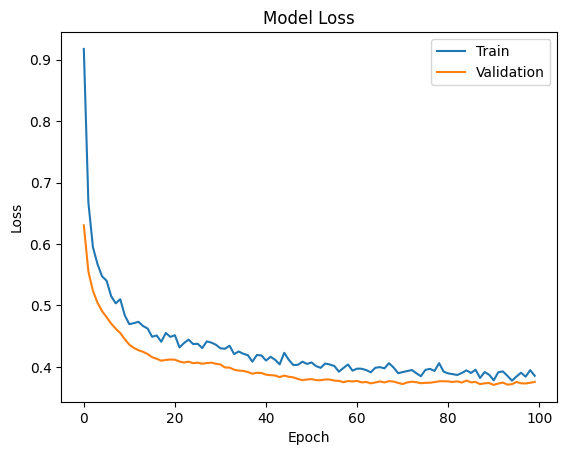

None

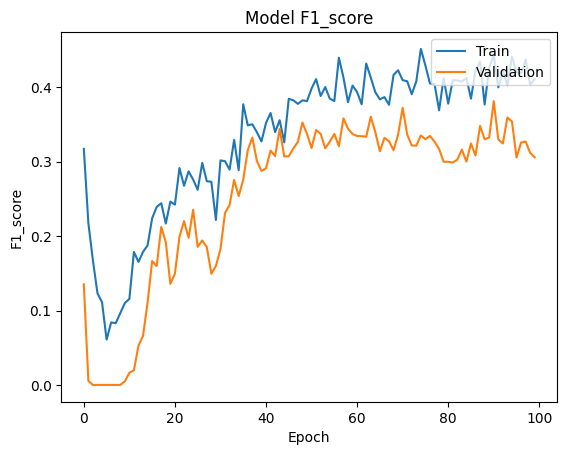

None

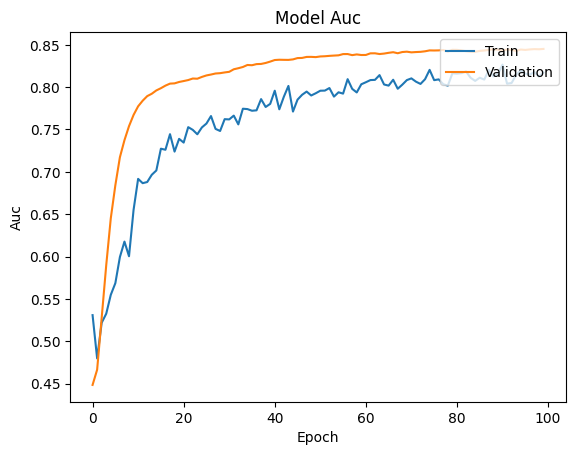

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:


**Training vs. Validation Loss**

- **Training Loss**: The blue curve represents the training loss, which starts at a relatively high value and decreases significantly within the first few epochs. After the initial sharp decline, the training loss fluctuates slightly but continues to decrease gradually over time, eventually stabilizing around a lower bound.

- **Validation Loss**: The orange curve represents the validation loss, which also decreases rapidly at the beginning of the training process. Similar to the training loss, the validation loss shows a consistent downward trend, with fewer fluctuations, indicating that the model is learning well from the data and generalizing effectively.

**Convergence and Overfitting Analysis**

- **Convergence**: The loss curves show that both training and validation losses decrease and stabilize after around 40 epochs, suggesting good convergence of the model. The relatively smooth decline in the validation loss indicates that the model's learning process is stable and progressing toward optimal performance.

- **Overfitting**: There is no significant divergence between the training and validation loss curves, implying that the model is not overfitting. The close proximity of the two curves, especially after the initial epochs, suggests that the model maintains a good balance between fitting the training data and generalizing to unseen data.

**Conclusion**

The loss curves suggest that the model is effectively learning with a good balance between fitting the training data and generalizing to the validation data. The smooth decrease and stabilization of both loss curves indicate successful convergence. To maintain and possibly improve this performance, it may be beneficial to explore further training with fine-tuning of hyperparameters or additional regularization techniques.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=neurons,
    activation=activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer=optimizer.__class__.__name__,  # extracting the optimizer type,
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)
metrics_df

model  # hidden layers  # neurons - hidden layer  \
0          model1-SGD_relu                2                        16   
1  model2-SGD_relu_dropout                2                        16   

  activation function - hidden layer  # epochs  batch size optimizer  \
0                               relu       100          32       SGD   
1                               relu       100          32      Adam   

   time(secs)      Loss  Accuracy  Precision    Recall  F1 Score   AUC-ROC  \
0   67.865583  0.328731  0.864286   0.752660  0.496491  0.571013  0.871472   
1   68.675338  0.385527  0.845357   0.812785  0.312281  0.411245  0.817222   

   Val Loss  Val Accuracy  Val Precision  Val Recall  Val F1 Score  \
0  0.345542      0.848333       0.668449    0.510204      0.554162   
1  0.375628      0.837500       0.890625    0.232653      0.305931   

   Val AUC-ROC  
0     0.860797  
1     0.845122

**Observations:**


**Loss:**
- The model shows a final training loss of 0.385527 and a validation loss of 0.375628, with the validation loss being slightly lower than the training loss. This suggests that the model is performing well on unseen data, and there is no significant overfitting.

**Accuracy:**
The model achieves good accuracy on both the training (84.54%) and validation (83.75%) datasets, indicating consistent performance in correctly classifying data.

**Precision and Recall:**
- Precision is relatively high for both the training (81.28%) and validation (89.06%) sets, showing that the model is effective at correctly identifying positive instances.
- However, recall is low for both training (31.23%) and validation (23.27%) sets, suggesting that the model is missing a significant number of positive instances, leading to a trade-off between precision and recall.

**F1 Score:**
- The F1 Score, which balances precision and recall, is low for both the training (41.12%) and validation (30.59%) sets. This low F1 score reflects the imbalance between precision and recall, indicating that the model struggles to maintain both metrics simultaneously.

**AUC-ROC:**
The AUC-ROC scores for both training (0.817222) and validation (0.845122) sets are high, demonstrating the model’s strong capability to distinguish between positive and negative classes.
Conclusions:

**Model Performance:**
- Model2-SGD_relu_dropout performs well in terms of accuracy and AUC-ROC scores, indicating that it is generally reliable in classification tasks.
The high precision but low recall and F1 score point to a model that is conservative in its predictions, favoring precision over recall, which might not be ideal depending on the application.

**Impact of Dropout:**
The inclusion of dropout seems to have helped in preventing overfitting, as indicated by the relatively close training and validation losses.

In summary, Model2-SGD_relu_dropout exhibits solid overall performance, particularly in precision and avoiding overfitting. However, the trade-off with recall and F1 score suggests a need for further fine-tuning to improve its ability to capture a higher proportion of true positives.

## Third Model: Define and compile model:  
- SGD, relu, dropout, early-stopping

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense, Dropout


hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'relu'
modelName = 'model3-SGD_relu_dropout_earlyStopping'

# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Define and compile your model with Adam optimizer and Dropout layers
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score])


# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### View the summary of the Neural Network Model
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model and cross-validate using validation data set

epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.5123 - auc: 0.5123 - f1_score: 0.3042 - loss: 0.8403 - precision: 0.2271 - recall: 0.5154 - val_accuracy: 0.7950 - val_auc: 0.5477 - val_f1_score: 0.0000e+00 - val_loss: 0.5413 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6829 - auc: 0.5090 - f1_score: 0.1715 - loss: 0.6354 - precision: 0.2071 - recall: 0.1602 - val_accuracy: 0.7958 - val_auc: 0.6285 - val_f1_score: 0.0000e+00 - val_loss: 0.4997 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7494 - auc: 0.5723 - f1_score: 0.1245 - loss: 0.5730 - precision: 0.2869 - recall: 0.0939 - val_accuracy: 0.7958 - val_auc: 0.6742 - val_f1_score: 0.0000e+00 - val_loss: 0.4820 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7680 - auc: 0.5864 - f1_score: 0.0709 - loss: 0.5

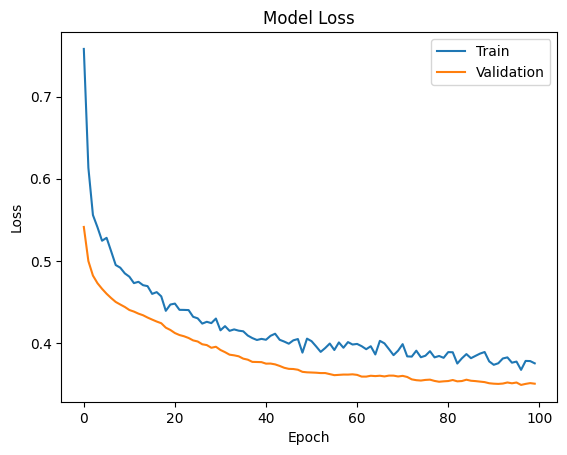

None

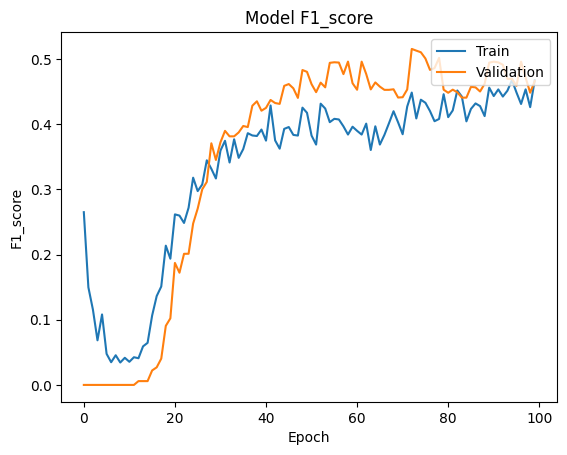

None

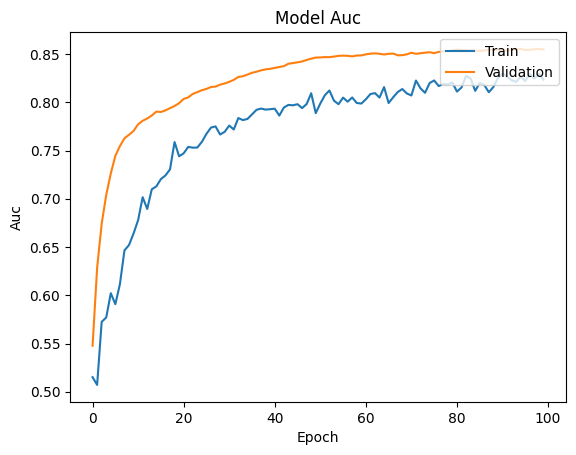

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))


### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows a rapid decrease in the training loss during the initial epochs, followed by a more gradual decline. The training loss exhibits minor fluctuations but trends downward overall, indicating that the model continues to improve as it learns from the training data.

- **Validation Loss**: The orange curve representing the validation loss decreases steadily, particularly in the early stages. The validation loss stabilizes around a certain point and remains consistently lower than the training loss, suggesting good generalization.

**Convergence and Overfitting Analysis**

- **Convergence**: The loss curves indicate that both the training and validation losses are stabilizing as the number of epochs increases. The model shows signs of convergence, as the losses are not decreasing as sharply toward the later epochs, and the validation loss has leveled off.

- **Overfitting**: There is a slight gap between the training and validation loss curves, with the training loss being slightly higher. However, this difference is not significant, indicating that the model is not overfitting and is maintaining a balance between learning from the training data and generalizing to unseen data.

**Conclusion**

The loss curves demonstrate effective learning, with both training and validation losses decreasing and stabilizing over time. The model appears to be well-regularized, avoiding overfitting while achieving a good fit to the training data. To further optimize the model, considerations such as fine-tuning hyperparameters or introducing additional regularization techniques may be explored.


In [ ]:
# Populate the dataframe, so we can compare
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=hidden_layers,
    neurons=neurons,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    time_secs= timedur,
    metrics_df=metrics_df
)
# print the dataframe
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732

**Key Observations:**

**Loss:**

The model's loss is 0.375152 for the training set and 0.350338 for the validation set. The lower validation loss suggests good generalization and that the model is not overfitting, which is reinforced by the use of dropout and early stopping.

**Accuracy:**
The accuracy for both the training (84.71%) and validation (85.00%) datasets is high and very close, indicating consistent performance across both datasets.

**Precision and Recall:**

Precision is moderately high for both training (76.30%) and validation (77.78%) sets, indicating the model's ability to correctly identify positive instances.
Recall is relatively low for both the training (36.14%) and validation (37.14%) sets, similar to previous models, showing that the model struggles with capturing all positive instances.

**F1 Score:**

The F1 Score, which balances precision and recall, is moderate for both the training (46.77%) and validation (46.63%) sets. This suggests that while the model performs reasonably well, there is still a trade-off between precision and recall.

**AUC-ROC:**

The AUC-ROC scores are strong for both the training (0.823409) and validation (0.854732) sets, indicating that the model is effective at distinguishing between positive and negative classes.
Conclusions:

**Model Performance:**
- Model3-SGD_relu_dropout_earlyStopping performs well overall, particularly in terms of accuracy and AUC-ROC, suggesting it has a strong ability to generalize to unseen data.
- The addition of early stopping, alongside dropout, has likely helped in preventing overfitting and ensured that the model stops training when no significant improvements are observed.

**Balancing Precision and Recall:**
- The model still exhibits a trade-off between precision and recall, with precision being higher than recall. This could be fine-tuned further depending on the specific application needs, particularly if recall is more critical.

In summary, Model3-SGD_relu_dropout_earlyStopping is a well-performing model that effectively balances accuracy and generalization. However, like previous models, it faces a trade-off between precision and recall, which may require further optimization based on specific use cases.








## Fourth Model: Define and compile the model,
- SGD, tanh

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Define/Compile the model and view model summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model4-SGD_tanh'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model and cross-validate using validation data set

epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 38ms/step - accuracy: 0.6340 - auc: 0.6733 - f1_score: 0.4226 - loss: 0.6433 - precision: 0.3288 - recall: 0.6466 - val_accuracy: 0.7392 - val_auc: 0.7217 - val_f1_score: 0.4326 - val_loss: 0.5543 - val_precision: 0.3896 - val_recall: 0.4898
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7459 - auc: 0.7174 - f1_score: 0.3919 - loss: 0.5418 - precision: 0.4180 - recall: 0.4030 - val_accuracy: 0.7933 - val_auc: 0.7501 - val_f1_score: 0.3786 - val_loss: 0.4930 - val_precision: 0.4910 - val_recall: 0.3347
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7810 - auc: 0.7422 - f1_score: 0.3348 - loss: 0.4935 - precision: 0.5023 - recall: 0.2798 - val_accuracy: 0.8058 - val_auc: 0.7657 - val_f1_score: 0.3384 - val_loss: 0.4607 - val_precision: 0.5500 - val_recall: 0.2694
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7887 - auc: 0.7568 - f1_score: 0.2769 - loss: 0.4688 - precision: 0.5449 - recall: 0.

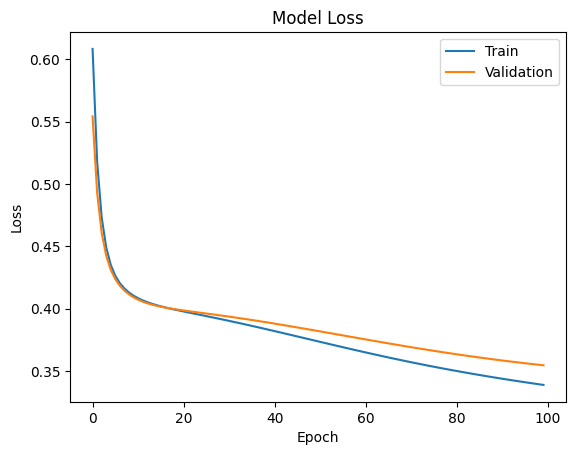

None

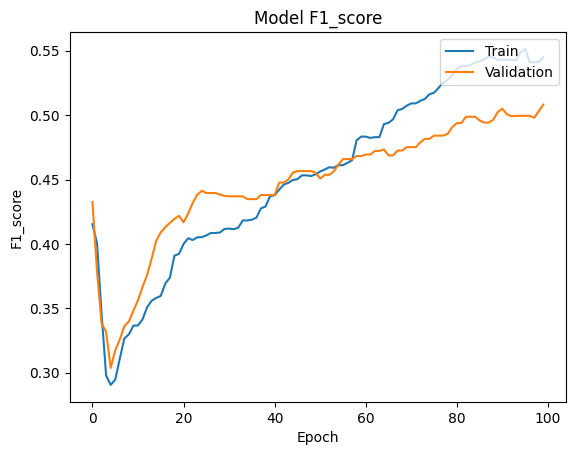

None

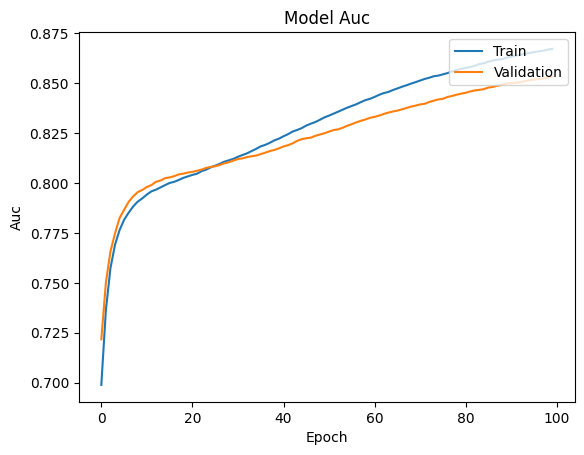

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))


### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve indicates that the training loss decreases rapidly in the initial epochs and then continues to decline more gradually as training progresses. The overall trend shows consistent improvement in minimizing the error on the training data.

- **Validation Loss**: The orange curve for the validation loss closely follows the training loss curve, indicating that the model is generalizing well to unseen data. The validation loss also shows a steady decline, with a very small gap between the two curves, which suggests a good fit.

**Convergence and Overfitting Analysis**

- **Convergence**: The loss curves demonstrate strong convergence, with both training and validation losses decreasing in a smooth and consistent manner. The curves continue to decline over the full range of epochs, indicating that the model is still learning and has not yet fully plateaued.

- **Overfitting**: The minimal difference between the training and validation loss curves indicates that the model is not overfitting. Both losses are decreasing at a similar rate, suggesting that the model maintains a balance between fitting the training data and generalizing to new data.

**Conclusion**

The loss curves suggest that the model is performing well, with effective learning and no signs of overfitting. The close alignment of the training and validation losses indicates a robust model that generalizes well to unseen data. Further training or slight adjustments in the model's hyperparameters might still yield improvements, but the current training process appears to be well-optimized.


In [ ]:
# Populate the dataframe, so we can compare
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=hidden_layers,
    neurons=neurons,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    time_secs= timedur,
    metrics_df=metrics_df
)
# print the dataframe
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414

**Observations:**

**Loss:**

The training loss is 0.338802, and the validation loss is slightly higher at 0.354556. This small difference suggests that the model generalizes well to unseen data with no significant overfitting.

**Accuracy:**

The model achieves high accuracy on both the training (86.14%) and validation (84.75%) datasets, indicating consistent and reliable performance.

**Precision and Recall:**
- Precision is fairly strong for both training (77.58%) and validation (70.39%) sets, reflecting the model’s ability to correctly identify positive instances.
- Recall, however, is lower for both training (44.91%) and validation (43.67%) sets, similar to other models, indicating that while the model is good at predicting true positives, it misses some positive cases.

**F1 Score:**

The F1 Score, which balances precision and recall, is moderate for both the training (54.50%) and validation (50.82%) sets, showing a need for improvement in balancing these two metrics.

**AUC-ROC:**
The AUC-ROC scores are high for both the training (0.867249) and validation (0.853414) sets, indicating that the model is proficient in distinguishing between positive and negative classes.
Conclusions:

**Model Performance:**
- Model4-SGD_tanh performs well across the board, particularly in accuracy and AUC-ROC, which indicates strong discriminative power and effective generalization.
- The use of the Tanh activation function, combined with the SGD optimizer, has resulted in a well-performing model with good precision but lower recall.

**Balancing Precision and Recall:**
- As with the other models, there is a noticeable trade-off between precision and recall. The model leans towards being more precise, but at the cost of not capturing all positive instances, which is reflected in the moderate F1 scores.

In summary, Model4-SGD_tanh is a strong performer with good generalization capabilities, particularly excelling in accuracy and AUC-ROC. However, the trade-off between precision and recall suggests room for further optimization, depending on the specific requirements of the task.








## Fifth Model: Define and compile the model,
- SGD, tanh, dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Define/Compile the model and view model summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model5-SGD_tanh_dropout'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model and cross-validate using validation data set

epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 56ms/step - accuracy: 0.5026 - auc: 0.4613 - f1_score: 0.2512 - loss: 0.8003 - precision: 0.1935 - recall: 0.4041 - val_accuracy: 0.7533 - val_auc: 0.5416 - val_f1_score: 0.1683 - val_loss: 0.5902 - val_precision: 0.2703 - val_recall: 0.1224
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6400 - auc: 0.5243 - f1_score: 0.2404 - loss: 0.6501 - precision: 0.2315 - recall: 0.2780 - val_accuracy: 0.7950 - val_auc: 0.6672 - val_f1_score: 0.0105 - val_loss: 0.5222 - val_precision: 0.3333 - val_recall: 0.0041
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7104 - auc: 0.5745 - f1_score: 0.2600 - loss: 0.5844 - precision: 0.3027 - recall: 0.2484 - val_accuracy: 0.7958 - val_auc: 0.7231 - val_f1_score: 0.0000e+00 - val_loss: 0.4879 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7360 - auc: 0.5953 - f1_score: 0.2251 - loss: 0.5496 - precision: 0.3249 

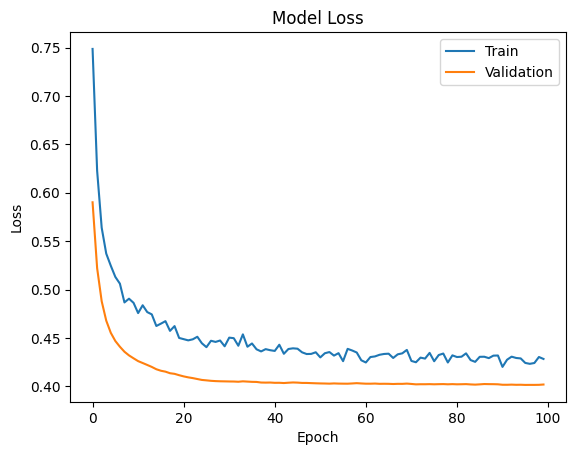

None

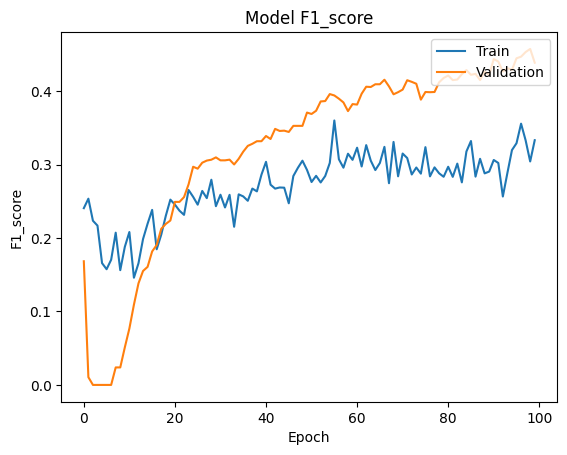

None

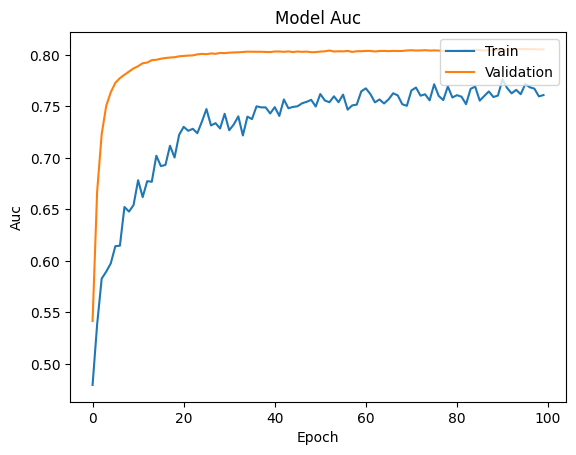

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))


### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly in the initial epochs and then gradually declines with some fluctuations as training progresses. The curve stabilizes after around 30 epochs, indicating that the model is finding it harder to further minimize the error on the training data as it continues learning.

- **Validation Loss**: The orange curve for the validation loss also decreases sharply in the early epochs and stabilizes more smoothly compared to the training loss. The validation loss remains consistently lower than the training loss, indicating strong generalization to unseen data.

**Convergence and Overfitting Analysis**

- **Convergence**: The loss curves indicate that both the training and validation losses stabilize after approximately 30 epochs. While the training loss exhibits some fluctuations, the validation loss stabilizes at a lower value, suggesting good convergence.

- **Overfitting**: There is a noticeable but small gap between the training and validation losses, with the training loss being slightly higher. This difference suggests that the model is well-regularized and not overfitting, maintaining a good balance between learning the training data and generalizing to new data.

**Conclusion**

The loss curves suggest that the model is effectively learning and generalizing, with both losses stabilizing over time. The slight fluctuations in the training loss indicate that the model is still improving, albeit at a slower pace. The low validation loss and minimal gap between the two curves imply that the model is not overfitting and is well-suited to the task at hand. Further adjustments, such as fine-tuning the learning rate or adding more epochs, could be explored to enhance performance.


In [ ]:
# Populate the dataframe, so we can compare
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=hidden_layers,
    neurons=neurons,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    time_secs= timedur,
    metrics_df=metrics_df
)
# print the dataframe
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618

### Key Observations

- **Loss:**
  - The training loss is 0.428253, and the validation loss is slightly lower at 0.401823. This suggests that the model generalizes reasonably well but might still be overfitting slightly due to the relatively higher training loss.

- **Accuracy:**
  - The model achieves decent accuracy on both the training (82.11%) and validation (83.08%) datasets, indicating consistent performance in classifying data correctly.

- **Precision and Recall:**
  - Precision is moderate for both training (66.83%) and validation (65.44%) sets, indicating that the model is fairly accurate in predicting positive instances.
  - Recall is quite low, particularly for the training set (24.04%), although it improves somewhat in the validation set (36.33%). This suggests that the model is missing a significant number of positive instances, especially during training.

- **F1 Score:**
  - The F1 Score, which balances precision and recall, is low for both the training (33.31%) and validation (43.86%) sets. The F1 scores reflect the imbalance between precision and recall, indicating that the model is more conservative in its positive predictions.

- **AUC-ROC:**
  - The AUC-ROC scores for both training (0.761075) and validation (0.805618) sets are lower than those observed in other models, suggesting that this model is less effective at distinguishing between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model5-SGD_tanh_dropout shows reasonable accuracy but struggles with recall, as evidenced by the low recall and F1 scores. The use of dropout appears to have prevented overfitting to some extent, as indicated by the closer alignment of training and validation losses.

- **Balancing Precision and Recall:**
  - The model exhibits a significant trade-off between precision and recall, leaning more towards precision. However, the low recall values indicate that the model is conservative and might be failing to identify a substantial portion of positive cases.

In summary, Model5-SGD_tanh_dropout demonstrates reasonable accuracy and generalization but suffers from a pronounced trade-off between precision and recall. Further optimization may be necessary to improve recall and overall performance, especially in applications where capturing all positive instances is critical.


## Sixth Model: Define and compile the model,
- SGD, tanh, dropout, early-stopping

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# Define/Compile the model and view model summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model6-SGD_tanh_dropout_earlyStopping'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Implement Early Stopping (can be before or after compile)
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# train the model and cross-validate using validation data set

epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 6s 40ms/step - accuracy: 0.5480 - auc: 0.5212 - f1_score: 0.2961 - loss: 0.7653 - precision: 0.2325 - recall: 0.4650 - val_accuracy: 0.7767 - val_auc: 0.6933 - val_f1_score: 0.3338 - val_loss: 0.5498 - val_precision: 0.4311 - val_recall: 0.2939
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6543 - auc: 0.5592 - f1_score: 0.2875 - loss: 0.6391 - precision: 0.2689 - recall: 0.3380 - val_accuracy: 0.8083 - val_auc: 0.7395 - val_f1_score: 0.1948 - val_loss: 0.4898 - val_precision: 0.6531 - val_recall: 0.1306
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7211 - auc: 0.6001 - f1_score: 0.2793 - loss: 0.5739 - precision: 0.3294 - recall: 0.2630 - val_accuracy: 0.8008 - val_auc: 0.7612 - val_f1_score: 0.1006 - val_loss: 0.4630 - val_precision: 0.6250 - val_recall: 0.0612
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7338 - auc: 0.6133 - f1_score: 0.2036 - loss: 0.5441 - precision: 0.3106 - recall: 0.

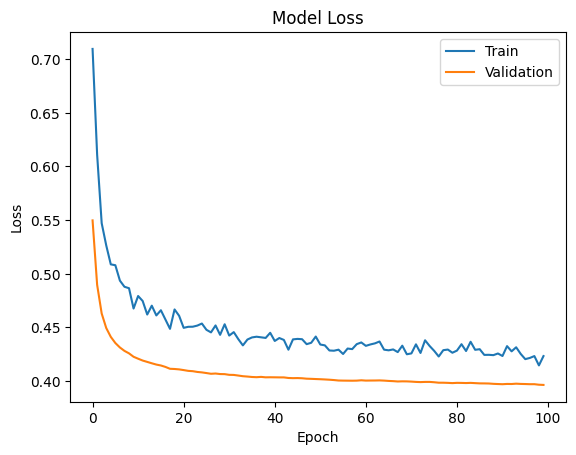

None

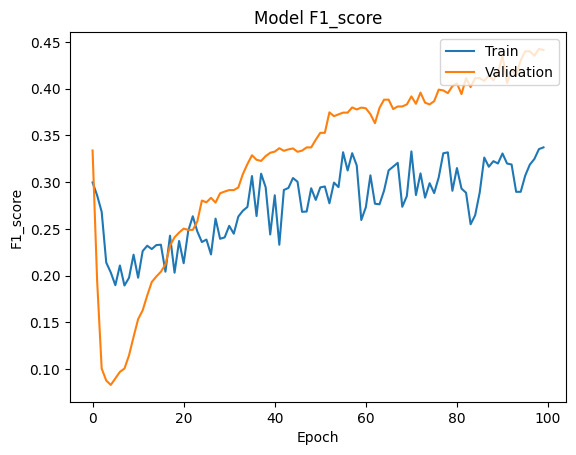

None

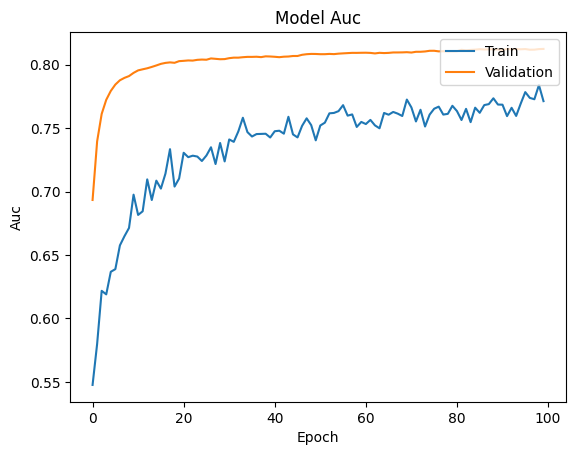

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly during the initial epochs, followed by a more gradual decline with noticeable fluctuations throughout the training process. The curve begins to stabilize after around 30 epochs, but the fluctuations suggest that the model is continuing to adjust its parameters.

- **Validation Loss**: The orange curve for the validation loss decreases sharply in the early epochs and stabilizes smoothly at a lower level than the training loss. The consistent decrease and lower position of the validation loss compared to the training loss indicate that the model is effectively generalizing to unseen data.

**Convergence and Overfitting Analysis**

- **Convergence**: The training and validation loss curves show a general trend of convergence, with both losses stabilizing as training progresses. However, the fluctuations in the training loss suggest that the model is still making adjustments, though the overall direction is toward minimizing error.

- **Overfitting**: The gap between the training and validation loss is small, with the validation loss being consistently lower. This indicates that the model is not overfitting and is maintaining a good balance between learning the training data and generalizing to unseen data.

**Conclusion**

The loss curves indicate that the model is learning effectively, with both the training and validation losses decreasing and stabilizing over time. The minor fluctuations in the training loss suggest that the model may still be improving, albeit slowly. The consistently lower validation loss indicates strong generalization performance. To further refine the model, considerations such as additional training epochs or hyperparameter tuning could be explored to reduce the fluctuations and potentially improve performance.


In [ ]:
# Populate the dataframe, so we can compare
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=hidden_layers,
    neurons=neurons,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    time_secs= timedur,
    metrics_df=metrics_df
)
# print the dataframe
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   
5  model6-SGD_tanh_dropout_earlyStopping                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   
5                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5          32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5  0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618  
5      0.441353     0.812347

### Key Observations

- **Loss:**
  - The training loss is 0.423310, while the validation loss is slightly lower at 0.396420. This suggests that the model generalizes reasonably well, with minimal overfitting.

- **Accuracy:**
  - The model achieves decent accuracy on both the training (82.00%) and validation (82.92%) datasets, indicating consistent performance in classifying data correctly.

- **Precision and Recall:**
  - Precision is moderate for both the training (64.73%) and validation (64.71%) sets, showing the model's ability to correctly identify positive instances.
  - Recall is quite low for both the training (25.44%) and validation (35.92%) sets, suggesting that the model misses a substantial number of positive instances.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is low for both the training (33.71%) and validation (44.14%) sets. This reflects the trade-off between precision and recall, with the model being conservative in its positive predictions.

- **AUC-ROC:**
  - The AUC-ROC scores for both the training (0.771208) and validation (0.812347) sets are moderately high, indicating the model's ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model6-SGD_tanh_dropout_earlyStopping performs reasonably well in terms of accuracy and AUC-ROC, but it struggles with recall, as indicated by the low recall and F1 scores. The use of dropout and early stopping helps to prevent overfitting, as evidenced by the closer alignment of training and validation losses.

- **Balancing Precision and Recall:**
  - The model shows a significant trade-off between precision and recall, leaning more towards precision. However, the low recall values suggest that the model might be failing to identify a considerable number of positive cases, particularly in the training set.


### Summary

Model6-SGD_tanh_dropout_earlyStopping exhibits good generalization and reasonable accuracy but suffers from a noticeable trade-off between precision and recall. The model benefits from dropout and early stopping, which helps prevent overfitting. However, the low recall values indicate a need for further tuning to ensure that the model captures more positive instances without sacrificing precision. With some additional adjustments, this model has the potential to perform more effectively in applications where both precision and recall are critical.


## Model Performance Improvement

## Seventh Model: Define and compile the model,
- Adam, tanh

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model7-Adam_tanh'

# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Define and compile your model with Adam optimizer and Dropout layers
model.add(Dense(units=neurons, activation= activation))
model.add(Dense(units=neurons, activation= activation))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score])


### View the summary of the Neural Network Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100
batch_size = 32

# Train the model and get the history object
start_time = time.time()
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end_time = time.time()
traindur = end_time - start_time
print(f"Training time: {traindur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 8s 49ms/step - accuracy: 0.6255 - auc: 0.6359 - f1_score: 0.3830 - loss: 0.6486 - precision: 0.3060 - recall: 0.5471 - val_accuracy: 0.7842 - val_auc: 0.7735 - val_f1_score: 0.4820 - val_loss: 0.5079 - val_precision: 0.4735 - val_recall: 0.5102
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7756 - auc: 0.7632 - f1_score: 0.4095 - loss: 0.4886 - precision: 0.4863 - recall: 0.3910 - val_accuracy: 0.8158 - val_auc: 0.7901 - val_f1_score: 0.4460 - val_loss: 0.4296 - val_precision: 0.5714 - val_recall: 0.3918
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7957 - auc: 0.7780 - f1_score: 0.3543 - loss: 0.4385 - precision: 0.5676 - recall: 0.2817 - val_accuracy: 0.8175 - val_auc: 0.7948 - val_f1_score: 0.4315 - val_loss: 0.4090 - val_precision: 0.5867 - val_recall: 0.3592
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8015 - auc: 0.7842 - f1_score: 0.3543 - loss: 0.4289 - precision: 0.6007 - recall: 0.

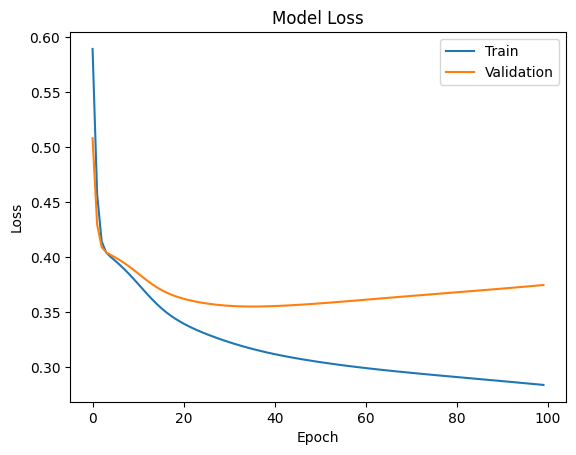

None

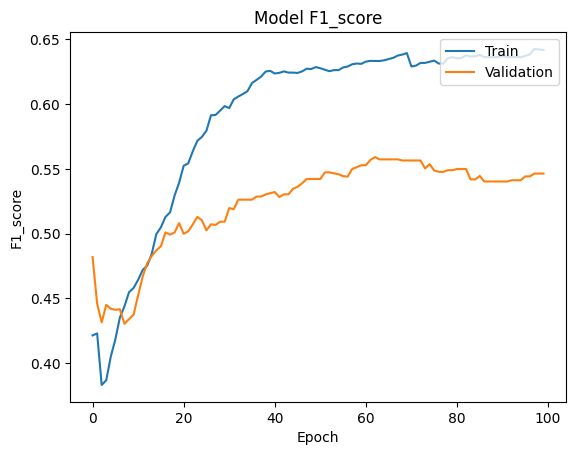

None

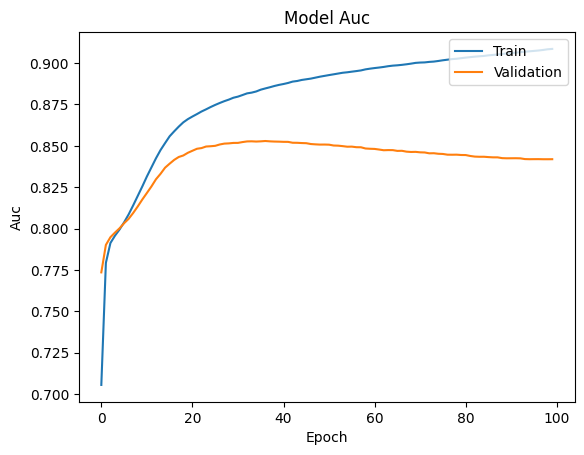

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows a rapid decrease in the training loss during the initial epochs, followed by a more gradual decline as training progresses. The training loss continues to decrease steadily, suggesting that the model is learning effectively from the training data.

- **Validation Loss**: The orange curve for the validation loss initially decreases along with the training loss but then begins to increase after around 20 epochs. This upward trend in the validation loss indicates that the model's performance on unseen data is deteriorating, suggesting potential overfitting.

**Convergence and Overfitting Analysis**

- **Convergence**: The training loss shows signs of convergence as it steadily decreases over the epochs. However, the increasing validation loss indicates that the model is not converging well on the validation set and may have started to memorize the training data rather than generalize from it.

- **Overfitting**: The divergence between the training and validation loss curves, with the training loss continuing to decrease while the validation loss increases, is a strong indication of overfitting. This suggests that the model is becoming overly specialized to the training data, reducing its ability to perform well on new, unseen data.

**Conclusion**

The loss curves suggest that while the model is effectively minimizing training loss, it is likely overfitting to the training data, as evidenced by the increasing validation loss. To address this, techniques such as early stopping, regularization, or reducing model complexity may be necessary to improve generalization and prevent overfitting.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation=activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer=optimizer.__class__.__name__,  # extracting the optimizer type,
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   
5  model6-SGD_tanh_dropout_earlyStopping                2   
6                       model7-Adam_tanh                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   
5                        16                               tanh       100   
6                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5          32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6          32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5  0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6  0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618  
5      0.441353     0.812347  
6      0.546391     0.841900

### Key Observations

- **Loss:**
  - The training loss is 0.283788, which is significantly lower than the validation loss of 0.374555. This suggests that the model might be overfitting to the training data, given the larger discrepancy between the two losses.

- **Accuracy:**
  - The model achieves high accuracy on the training set (88.50%) and maintains decent accuracy on the validation set (84.67%), indicating strong performance in classifying data correctly, though with a potential overfitting issue.

- **Precision and Recall:**
  - Precision is relatively high for both the training (79.67%) and validation (66.49%) sets, reflecting the model's effectiveness at correctly identifying positive instances.
  - Recall is also higher compared to previous models, with 58.42% for training and 50.20% for validation, indicating a better balance between identifying positive instances and maintaining accuracy.

- **F1 Score:**
  - The F1 Score is solid for both the training (64.18%) and validation (54.64%) sets, indicating a more balanced performance between precision and recall compared to previous models.

- **AUC-ROC:**
  - The AUC-ROC scores are high for both the training (0.908557) and validation (0.841900) sets, demonstrating that the model has a strong ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model7-Adam_tanh performs very well overall, with strong accuracy, precision, and recall. The high AUC-ROC scores indicate robust discriminative power. However, the discrepancy between training and validation loss suggests that the model might be overfitting, which could be addressed through further regularization or early stopping.

- **Balancing Precision and Recall:**
  - The model achieves a better balance between precision and recall than the previous models, as evidenced by the F1 scores. This indicates that the Adam optimizer, combined with the Tanh activation function, has helped in achieving more consistent performance across these metrics.


### Summary

Model7-Adam_tanh demonstrates strong overall performance with high accuracy, precision, and recall, making it a well-balanced model. The model shows a better balance between precision and recall compared to previous models, thanks to the use of the Adam optimizer. However, the noticeable difference between training and validation loss suggests potential overfitting, which may need to be addressed with additional regularization techniques. With further fine-tuning, this model has the potential to achieve even better generalization and performance in real-world applications.


## Eight Model: Define and compile the model,
- Adam, tanh, dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
from tensorflow.keras.layers import Dense, Dropout

hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model8-Adam_tanh_dropout'

# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Define and compile your model with Adam optimizer and Dropout layers
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score])


### View the summary of the Neural Network Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
epochs = 100
batch_size = 32

# Train the model and get the history object
start_time = time.time()
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end_time = time.time()
traindur = end_time - start_time
print(f"Training time: {traindur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 9s 56ms/step - accuracy: 0.5656 - auc: 0.5869 - f1_score: 0.3514 - loss: 0.7541 - precision: 0.2668 - recall: 0.5656 - val_accuracy: 0.7542 - val_auc: 0.7480 - val_f1_score: 0.4534 - val_loss: 0.5428 - val_precision: 0.4194 - val_recall: 0.5306
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6728 - auc: 0.6312 - f1_score: 0.3709 - loss: 0.6111 - precision: 0.3243 - recall: 0.4650 - val_accuracy: 0.8100 - val_auc: 0.7812 - val_f1_score: 0.4076 - val_loss: 0.4734 - val_precision: 0.5541 - val_recall: 0.3551
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7302 - auc: 0.6416 - f1_score: 0.3449 - loss: 0.5594 - precision: 0.3738 - recall: 0.3476 - val_accuracy: 0.8150 - val_auc: 0.7917 - val_f1_score: 0.3370 - val_loss: 0.4368 - val_precision: 0.6055 - val_recall: 0.2694
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7683 - auc: 0.6916 - f1_score: 0.3141 - loss: 0.5010 - precision: 0.4530 - recall: 0.

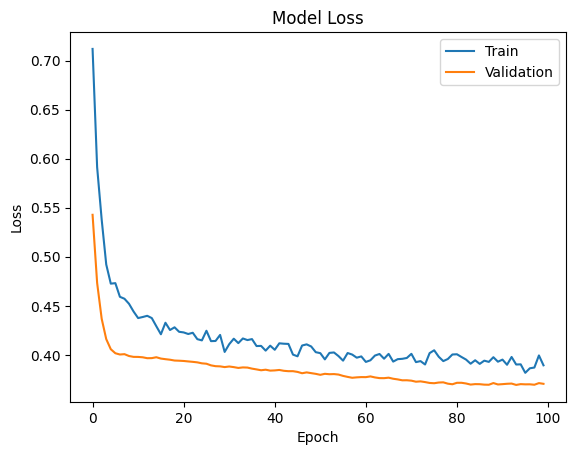

None

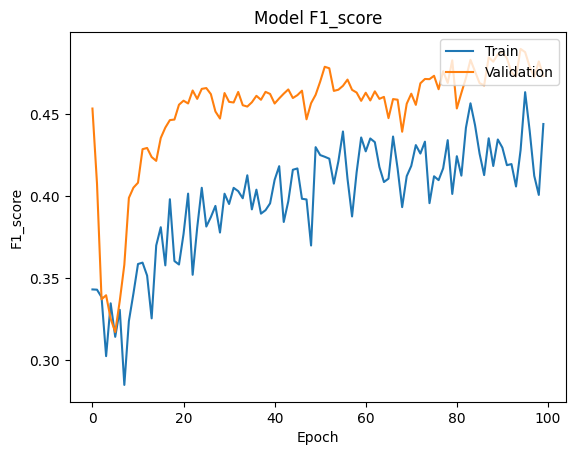

None

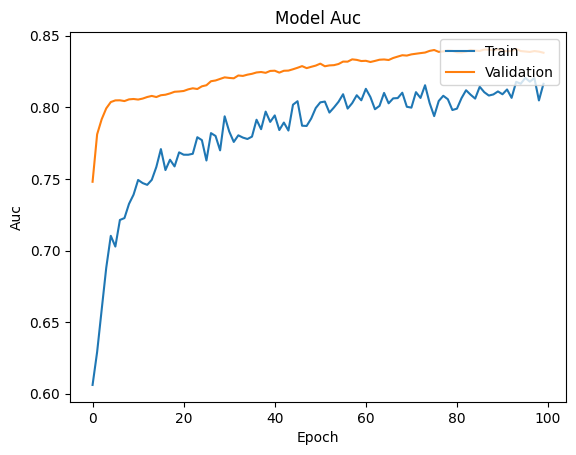

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve indicates that the training loss decreases rapidly during the initial epochs and then continues to decline more gradually, with noticeable fluctuations throughout the training process. The curve stabilizes after around 30 epochs but does not entirely flatten, suggesting that the model continues to adjust its parameters.

- **Validation Loss**: The orange curve for the validation loss decreases sharply at the beginning and stabilizes at a lower level than the training loss. The validation loss curve is smoother and exhibits less fluctuation, consistently staying lower than the training loss, indicating strong generalization.

**Convergence and Overfitting Analysis**

- **Convergence**: The loss curves show that both the training and validation losses stabilize after approximately 30 epochs. The fluctuations in the training loss indicate that the model is still fine-tuning its performance, while the stable validation loss suggests good convergence on the validation set.

- **Overfitting**: The gap between the training and validation losses is small, with the validation loss consistently lower. This implies that the model is not overfitting and maintains a balance between learning the training data and generalizing well to unseen data.

**Conclusion**

The loss curves suggest that the model is effectively learning, with both losses decreasing and stabilizing over time. The slight fluctuations in the training loss curve indicate ongoing adjustments, while the stable validation loss points to strong generalization. Further improvements could be explored through additional training or fine-tuning, though the current model performance appears robust and well-optimized.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation=activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer=optimizer.__class__.__name__,  # extracting the optimizer type,
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)
metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   
5  model6-SGD_tanh_dropout_earlyStopping                2   
6                       model7-Adam_tanh                2   
7               model3-Adam_tanh_dropout                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   
5                        16                               tanh       100   
6                        16                               tanh       100   
7                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5          32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6          32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7          32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5  0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6  0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7  0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618  
5      0.441353     0.812347  
6      0.546391     0.841900  
7      0.473206     0.838119

### Key Observations

- **Loss:**
  - The training loss is 0.389358, and the validation loss is slightly lower at 0.370483. This small difference suggests that the model generalizes well to unseen data, with minimal signs of overfitting.

- **Accuracy:**
  - The model achieves a solid accuracy of 83.00% on the training set and 83.75% on the validation set, indicating consistent performance in correctly classifying the data.

- **Precision and Recall:**
  - Precision is moderate for both the training (65.26%) and validation (67.36%) sets, showing that the model is fairly accurate in predicting positive instances.
  - Recall is somewhat lower, with 35.26% for training and 39.59% for validation, indicating that the model may miss a significant portion of positive cases.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is 44.39% for training and 47.32% for validation. These scores reflect a reasonable balance between precision and recall, though there is room for improvement.

- **AUC-ROC:**
  - The AUC-ROC scores are relatively high for both training (0.816453) and validation (0.838119), suggesting that the model has a good ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model3-Adam_tanh_dropout shows good generalization, with solid accuracy and high AUC-ROC scores, indicating that the model is effective at classifying data and distinguishing between classes. The slight difference in loss between training and validation further reinforces that the model is not overfitting.

- **Balancing Precision and Recall:**
  - The model achieves a decent balance between precision and recall, as indicated by the F1 scores. However, the recall values are still lower than desired, meaning the model might be missing some positive instances. The dropout mechanism seems to be effective in preventing overfitting while maintaining a reasonable balance between metrics.



### Summary

Model8-Adam_tanh_dropout demonstrates strong generalization with good accuracy and AUC-ROC scores, making it a reliable model for classification tasks. The model effectively balances precision and recall, though there is still some room for improvement in recall. With further fine-tuning, particularly in enhancing recall, this model has the potential to perform even better in applications where identifying positive cases is critical.


## Nineth Model: Define and compile the model,
- Adam, tanh, dropout, early-stopping

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
from keras.callbacks import EarlyStopping

from tensorflow.keras.layers import Dense, Dropout

hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model9-Adam_tnh_Dropout_earlyStopping'

# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train.shape[1],)))

# Define and compile your model with Adam optimizer and Dropout layers
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation= activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score])

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

### View the summary of the Neural Network Model
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model and get the history object

epochs=100
batch_size=32

start_time = time.time()
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end_time = time.time()
traindur = end_time - start_time
print(f"Training time: {traindur} seconds")

Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 7s 42ms/step - accuracy: 0.5513 - auc: 0.5382 - f1_score: 0.3111 - loss: 0.7266 - precision: 0.2408 - recall: 0.4895 - val_accuracy: 0.7683 - val_auc: 0.7013 - val_f1_score: 0.3765 - val_loss: 0.5670 - val_precision: 0.4253 - val_recall: 0.3837
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6707 - auc: 0.6083 - f1_score: 0.3304 - loss: 0.6062 - precision: 0.3057 - recall: 0.3976 - val_accuracy: 0.8150 - val_auc: 0.7621 - val_f1_score: 0.3559 - val_loss: 0.4916 - val_precision: 0.5966 - val_recall: 0.2898
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7424 - auc: 0.6257 - f1_score: 0.3277 - loss: 0.5578 - precision: 0.3904 - recall: 0.3147 - val_accuracy: 0.8242 - val_auc: 0.7878 - val_f1_score: 0.3372 - val_loss: 0.4448 - val_precision: 0.6848 - val_recall: 0.2571
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7660 - auc: 0.7152 - f1_score: 0.3448 - loss: 0.4960 - precision: 0.4518 - recall: 0.

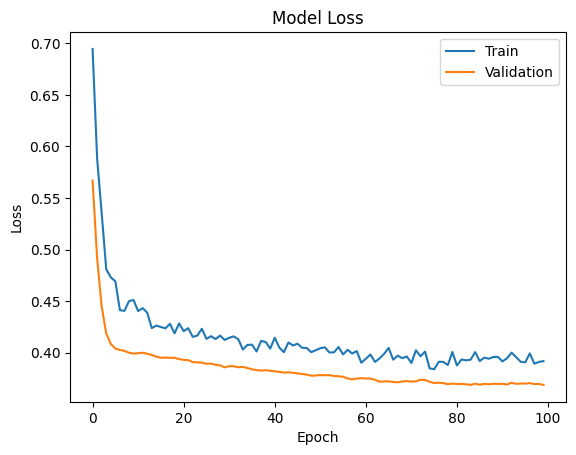

None

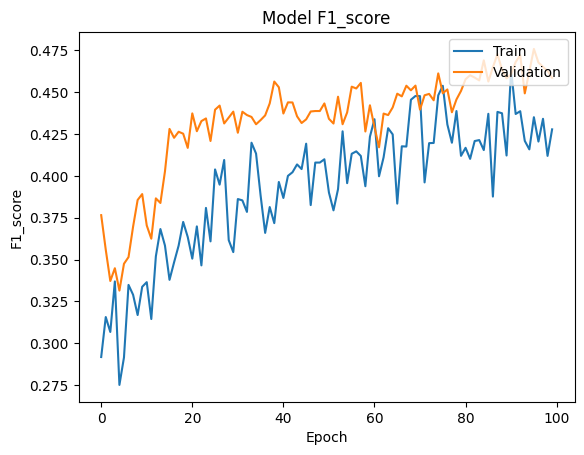

None

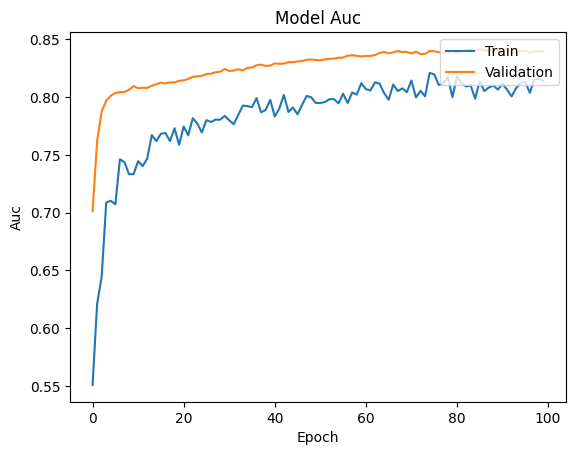

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly during the initial epochs and then gradually declines with noticeable fluctuations as training progresses. The curve stabilizes somewhat after around 30 epochs, though it continues to exhibit minor fluctuations, indicating that the model is still adjusting its parameters.

- **Validation Loss**: The orange curve for the validation loss decreases sharply in the early epochs and stabilizes at a lower level than the training loss. The validation loss remains consistently lower and exhibits a smooth, gradual decrease, indicating that the model is effectively generalizing to unseen data.

**Convergence and Overfitting Analysis**

- **Convergence**: The training and validation loss curves both stabilize after approximately 30 epochs, with the validation loss showing minimal fluctuation. This suggests good convergence on the validation set, though the ongoing fluctuations in the training loss imply that the model may still be fine-tuning its performance.

- **Overfitting**: The consistent gap between the training and validation loss curves, with the validation loss remaining lower, suggests that the model is not overfitting. The model appears to be well-regularized, maintaining a balance between learning from the training data and generalizing effectively to unseen data.

**Conclusion**

The loss curves indicate that the model is learning effectively, with both training and validation losses decreasing and stabilizing over time. The slight fluctuations in the training loss curve suggest ongoing adjustments, while the stable and lower validation loss points to strong generalization. The current model performance appears robust, though further fine-tuning or additional training could be explored to reduce fluctuations and potentially enhance performance.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type,
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   
5  model6-SGD_tanh_dropout_earlyStopping                2   
6                       model7-Adam_tanh                2   
7               model3-Adam_tanh_dropout                2   
8  model9-Adam_tnh_Dropout_earlyStopping                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   
5                        16                               tanh       100   
6                        16                               tanh       100   
7                        16                               tanh       100   
8                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5          32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6          32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7          32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8          32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5  0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6  0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7  0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   
8  0.427741  0.814029  0.368828      0.836667       0.678832    0.379592   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618  
5      0.441353     0.812347  
6      0.546391     0.841900  
7      0.473206     0.838119  
8      0.458490     0.839904

### Key Observations

- **Loss:**
  - The training loss is 0.391854, and the validation loss is slightly lower at 0.368828. This indicates that the model generalizes well to unseen data with minimal overfitting.

- **Accuracy:**
  - The model achieves an accuracy of 82.96% on the training set and 83.67% on the validation set, reflecting consistent and reliable performance in classifying the data.

- **Precision and Recall:**
  - Precision is moderate, with 65.66% for training and 67.88% for validation, indicating that the model is effective in correctly identifying positive instances.
  - Recall is somewhat lower, with 34.21% for training and 37.96% for validation, suggesting that the model may miss a notable portion of positive cases.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is 42.77% for training and 45.85% for validation. These scores suggest a reasonable balance between precision and recall, though the model could be improved in this area.

- **AUC-ROC:**
  - The AUC-ROC scores are strong for both training (0.814029) and validation (0.839904), demonstrating that the model has a good ability to differentiate between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model9-Adam_tanh_Dropout_earlyStopping performs well in terms of generalization, with consistent accuracy and strong AUC-ROC scores. The slight difference in loss between training and validation suggests that the model is not overfitting, thanks in part to the use of dropout and early stopping.

- **Balancing Precision and Recall:**
  - While the model achieves a reasonable balance between precision and recall, as indicated by the F1 scores, there is still room for improvement, particularly in recall. The current configuration seems to favor precision over recall, which may be desirable depending on the specific application.



### Summary

Model9-Adam_tanh_Dropout_earlyStopping is a strong performer with good generalization, high accuracy, and robust AUC-ROC scores. The model effectively balances precision and recall, though there is potential for improvement in recall to better capture positive instances. With additional fine-tuning and optimization, this model could be further enhanced to meet the specific demands of various applications.


## Tenth Model: Define and compile the model,
- SGD, tanh, SMOTE

**Oversampling**

1. **Understanding Class Imbalance**

In many real-world datasets, the class distribution is imbalanced. This means that one class (usually the majority class) significantly outnumbers the other class (minority class). For example, in a fraud detection dataset, the number of fraudulent transactions is typically much smaller than the number of legitimate transactions.

2. **Why Address Class Imbalance?**

Class imbalance can lead to biased models that perform well on the majority class but poorly on the minority class. To mitigate this, techniques like undersampling and oversampling are used.

What is Oversampling?

- Oversampling involves **increasing the number of instances in the minority class** to balance the class distribution. This can be done by randomly duplicating samples from the minority class or by generating synthetic samples (e.g., using SMOTE).

Why Use Oversampling?

- Preserves All Majority Class Samples: Unlike undersampling, oversampling does not discard any majority class samples.
- Improves Model Performance: By balancing the class distribution, the model can learn the characteristics of both classes more effectively.

SMOTE:

- SMOTE: A technique to generate synthetic samples for the minority class to balance the dataset.
- Purpose: Address class imbalance, improve model performance, and avoid overfitting.
- Process: Identifies minority class instances, selects nearest neighbors, and generates synthetic samples by interpolation.
- Benefits: Leads to better generalization, improved recall, precision, and F1 scores, and more balanced model performance across classes.

Using SMOTE can significantly enhance the performance of machine learning models on imbalanced datasets by ensuring that the model learns effectively from both classes.

**Explanation of SMOTE Parameters**

- sampling_strategy=1

  - Purpose: Defines the desired balance between the minority and majority classes after resampling.
  - Value 1: This means the minority class will be resampled to have the same number of instances as the majority class. In other words, after applying SMOTE, the dataset will be perfectly balanced with a 1:1 ratio between the minority and majority classes.

- k_neighbors=5

  - Purpose: Specifies the number of nearest neighbors to use when generating synthetic samples for the minority class.
  - Value 5: This means SMOTE will look for the 5 nearest neighbors of each minority class instance and create synthetic samples by interpolating between the instance and its neighbors.

Impact:

- Higher Values: Use more neighbors, leading to a smoother distribution of synthetic samples but potentially more overlap with the majority class.
- Lower Values: Use fewer neighbors, resulting in synthetic samples that are closer to the original minority instances but might not cover the feature space as well.  

In [ ]:
from imblearn.over_sampling import SMOTE

# Synthetic Minority Over Sampling Technique
sm = SMOTE(sampling_strategy=1, k_neighbors=5, random_state=1)


In [ ]:
# Apply SMOTE to the training data
X_train_over, y_train_over = sm.fit_resample(X_train, y_train)

print("Original training dataset shape:", X_train.shape, y_train.shape)
print("Resampled training dataset shape:", X_train_over.shape, y_train_over.shape)
print(f"Original training dataset shape has not been modified: {X_train.shape, y_train.shape}")


Original training dataset shape: (2800, 13) (2800,)
Resampled training dataset shape: (4460, 13) (4460,)
Original training dataset shape has not been modified: ((2800, 13), (2800,))


In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model10-SGD_tanh_SMOTE'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 19ms/step - accuracy: 0.6241 - auc: 0.6765 - f1_score: 0.6232 - loss: 0.6497 - precision: 0.6013 - recall: 0.6627 - val_accuracy: 0.6508 - val_auc: 0.7417 - val_f1_score: 0.4583 - val_loss: 0.6346 - val_precision: 0.3389 - val_recall: 0.7469
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.6809 - auc: 0.7543 - f1_score: 0.6792 - loss: 0.5895 - precision: 0.6556 - recall: 0.7175 - val_accuracy: 0.6733 - val_auc: 0.7742 - val_f1_score: 0.4759 - val_loss: 0.6020 - val_precision: 0.3573 - val_recall: 0.7510
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7086 - auc: 0.7806 - f1_score: 0.7025 - loss: 0.5662 - precision: 0.6879 - recall: 0.7283 - val_accuracy: 0.6883 - val_auc: 0.7873 - val_f1_score: 0.4958 - val_loss: 0.5847 - val_precision: 0.3723 - val_recall: 0.7673
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.7123 - auc: 0.7930 - f1_score: 0.7039 - loss: 0.5529 - precision: 0.6942 - re

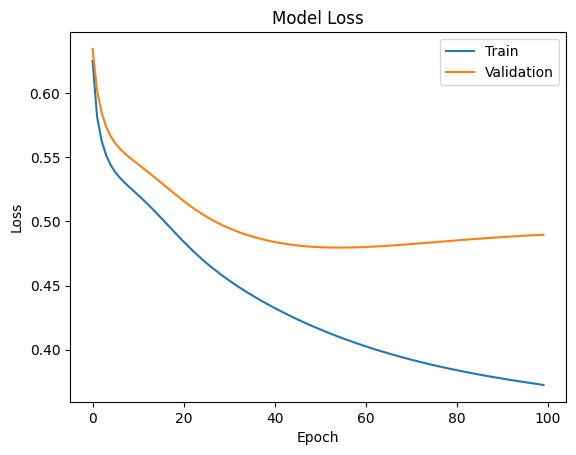

None

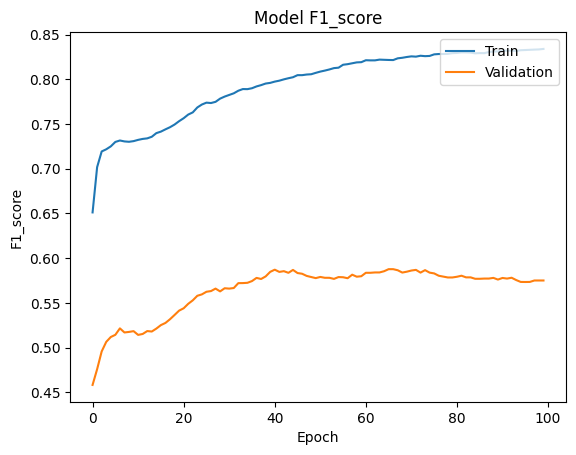

None

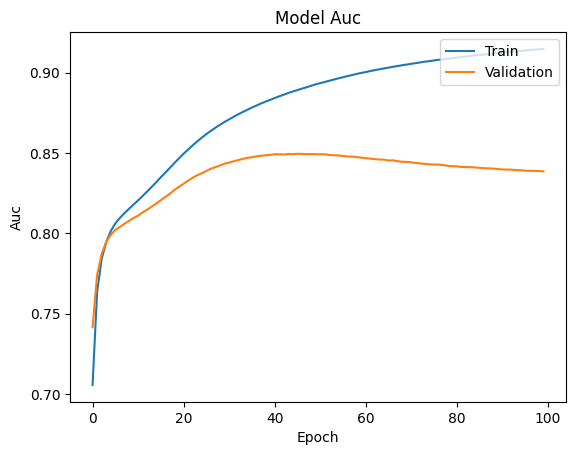

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows a steady decrease in the training loss over the course of the epochs. The loss decreases rapidly at first and then continues to decline at a slower, more consistent rate as training progresses. This trend suggests that the model is effectively learning from the training data.

- **Validation Loss**: The orange curve for the validation loss initially decreases alongside the training loss but begins to increase after approximately 30 epochs. This rise in validation loss indicates that the model's performance on unseen data is starting to degrade, a clear sign of potential overfitting.

**Convergence and Overfitting Analysis**

- **Convergence**: The training loss curve demonstrates good convergence as it steadily decreases. However, the validation loss shows a divergence from the training loss after about 30 epochs, suggesting that the model is no longer improving on the validation data and may be overfitting.

- **Overfitting**: The increasing gap between the training and validation loss, particularly the rise in validation loss, indicates that the model is overfitting. While the training loss continues to decrease, the validation loss starts to increase, signaling that the model is becoming too specialized to the training data and losing generalization capability.

**Conclusion**

The loss curves suggest that while the model is effectively minimizing training loss, it is likely overfitting to the training data, as evidenced by the increasing validation loss. To address this, techniques such as early stopping, regularization, or reducing model complexity may be necessary to improve generalization and prevent overfitting.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                        model1-SGD_relu                2   
1                model2-SGD_relu_dropout                2   
2  model3-SGD_relu_dropout_earlyStopping                2   
3                        model4-SGD_tanh                2   
4                model5-SGD_tanh_dropout                2   
5  model6-SGD_tanh_dropout_earlyStopping                2   
6                       model7-Adam_tanh                2   
7               model3-Adam_tanh_dropout                2   
8  model9-Adam_tnh_Dropout_earlyStopping                2   
9                 model10-SGD_tanh_SMOTE                2   

   # neurons - hidden layer activation function - hidden layer  # epochs  \
0                        16                               relu       100   
1                        16                               relu       100   
2                        16                               relu       100   
3                        16                               tanh       100   
4                        16                               tanh       100   
5                        16                               tanh       100   
6                        16                               tanh       100   
7                        16                               tanh       100   
8                        16                               tanh       100   
9                        16                               tanh       100   

   batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0          32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1          32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2          32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3          32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4          32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5          32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6          32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7          32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8          32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9          32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   

   F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0  0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1  0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2  0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3  0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4  0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5  0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6  0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7  0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   
8  0.427741  0.814029  0.368828      0.836667       0.678832    0.379592   
9  0.833988  0.914838  0.489654      0.779167       0.474490    0.759184   

   Val F1 Score  Val AUC-ROC  
0      0.554162     0.860797  
1      0.305931     0.845122  
2      0.466341     0.854732  
3      0.508226     0.853414  
4      0.438552     0.805618  
5      0.441353     0.812347  
6      0.546391     0.841900  
7      0.473206     0.838119  
8      0.458490     0.839904  
9      0.575074     0.838645

### Key Observations

- **Loss:**
  - The training loss is 0.372471, which is higher than the validation loss of 0.489654. This difference suggests that the model might be experiencing some overfitting, especially considering the use of SMOTE to balance the dataset.

- **Accuracy:**
  - The model achieves an accuracy of 83.48% on the training set and 77.92% on the validation set. This decrease in accuracy on the validation set compared to the training set indicates that the model might not be generalizing as well as desired.

- **Precision and Recall:**
  - Precision is notably high for both the training (82.44%) and validation (47.45%) sets, showing the model’s effectiveness in correctly identifying positive instances on the training data.
  - Recall is exceptionally high for the training set (85.07%) but drops significantly on the validation set (47.45%). This large drop-off suggests that while the model is capable of identifying positive instances when trained with SMOTE, it struggles to maintain this performance on unseen data.

- **F1 Score:**
  - The F1 Score, which balances precision and recall, is very high for training (83.40%) but much lower for validation (57.51%). This discrepancy further emphasizes the potential overfitting or mismatch in how the model performs on balanced versus real-world data.

- **AUC-ROC:**
  - The AUC-ROC score is high for both training (0.914838) and validation (0.838645), indicating that the model has strong discriminative power but may still struggle to generalize when applied to new data.

### Conclusions

- **Model Performance:**
  - Model10-SGD_tanh_SMOTE shows strong performance on the training data, particularly in terms of precision, recall, and AUC-ROC. However, the significant drop in these metrics on the validation set indicates that the model might be overfitting or that the effects of SMOTE are not fully translating to better generalization.

- **Balancing Precision and Recall:**
  - The model demonstrates a significant imbalance between its performance on training and validation data, with a notable drop in both precision and recall on the validation set. This suggests that while SMOTE helps with the training data, further adjustments are needed to improve validation performance.



### Summary

Model10-SGD_tanh_SMOTE excels in training performance with high precision, recall, and AUC-ROC scores, demonstrating that SMOTE effectively handles imbalanced data during training. However, the model struggles to maintain this performance on the validation set, indicating potential overfitting. Further tuning and exploration of different techniques are recommended to improve the model's generalization and to balance precision and recall more effectively in real-world scenarios.


## Eleventh Model: Define and compile the model,
- SGD, tanh, SMOTE, drop-out

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model11-SGD_tanh_SMOTE_dropout'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 8s 34ms/step - accuracy: 0.5282 - auc: 0.5253 - f1_score: 0.5100 - loss: 0.7793 - precision: 0.5122 - recall: 0.5296 - val_accuracy: 0.6142 - val_auc: 0.7168 - val_f1_score: 0.4291 - val_loss: 0.6554 - val_precision: 0.3081 - val_recall: 0.7143
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.5771 - auc: 0.6076 - f1_score: 0.5705 - loss: 0.7039 - precision: 0.5593 - recall: 0.5970 - val_accuracy: 0.6425 - val_auc: 0.7539 - val_f1_score: 0.4563 - val_loss: 0.6363 - val_precision: 0.3327 - val_recall: 0.7469
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6004 - auc: 0.6447 - f1_score: 0.6028 - loss: 0.6777 - precision: 0.5787 - recall: 0.6432 - val_accuracy: 0.6617 - val_auc: 0.7695 - val_f1_score: 0.4710 - val_loss: 0.6207 - val_precision: 0.3467 - val_recall: 0.7429
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6450 - auc: 0.6923 - f1_score: 0.6387 - loss: 0.6457 - precision: 0.6240 - re

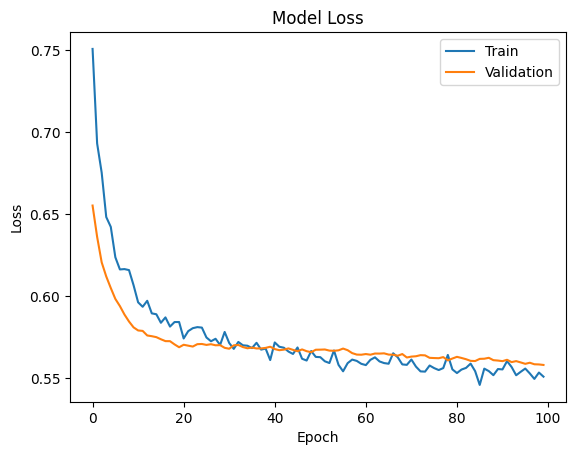

None

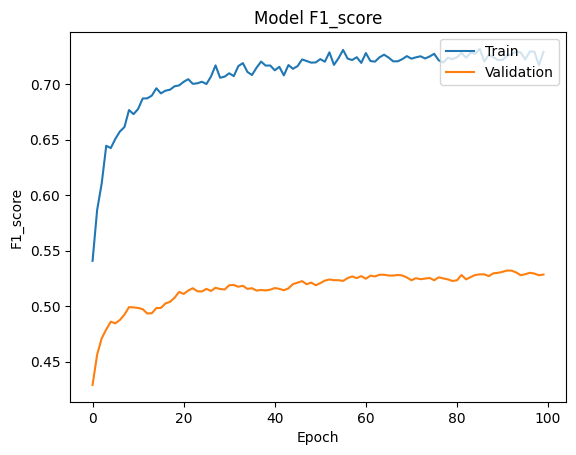

None

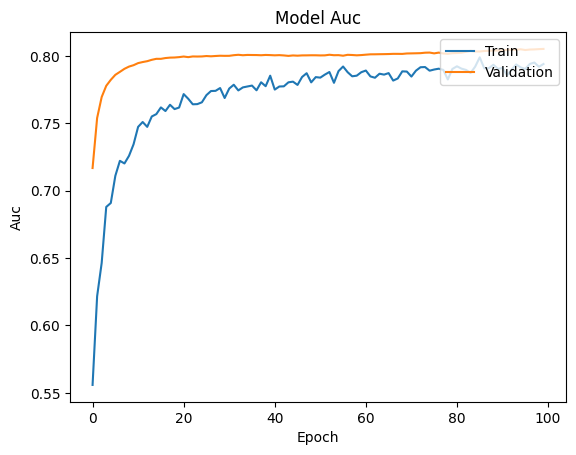

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve indicates that the training loss decreases rapidly during the initial epochs and then gradually declines with some fluctuations as training progresses. The curve stabilizes after about 20 epochs, but the presence of fluctuations suggests that the model continues to fine-tune its learning on the training data.

- **Validation Loss**: The orange curve for the validation loss also decreases sharply in the early epochs and stabilizes at a level slightly lower than the training loss. The validation loss remains relatively stable with fewer fluctuations, suggesting that the model generalizes well to unseen data.

**Convergence and Overfitting Analysis**

- **Convergence**: Both the training and validation loss curves show signs of stabilization after approximately 20 epochs. While the training loss continues to exhibit minor fluctuations, the overall trend suggests good convergence, particularly as the validation loss remains steady and low.

- **Overfitting**: The gap between the training and validation losses is minimal, with the validation loss consistently staying slightly lower. This suggests that the model is not overfitting and maintains a healthy balance between fitting the training data and generalizing to new data.

**Conclusion**

The loss curves suggest that the model is effectively learning and generalizing, with both losses decreasing and stabilizing over time. The slight fluctuations in the training loss curve imply ongoing adjustments, while the stable and lower validation loss indicates strong generalization. The current model performance appears robust, though slight adjustments or additional training could be explored to further refine the model.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                         model1-SGD_relu                2   
1                 model2-SGD_relu_dropout                2   
2   model3-SGD_relu_dropout_earlyStopping                2   
3                         model4-SGD_tanh                2   
4                 model5-SGD_tanh_dropout                2   
5   model6-SGD_tanh_dropout_earlyStopping                2   
6                        model7-Adam_tanh                2   
7                model3-Adam_tanh_dropout                2   
8   model9-Adam_tnh_Dropout_earlyStopping                2   
9                  model10-SGD_tanh_SMOTE                2   
10         model11-SGD_tanh_SMOTE_dropout                2   

    # neurons - hidden layer activation function - hidden layer  # epochs  \
0                         16                               relu       100   
1                         16                               relu       100   
2                         16                               relu       100   
3                         16                               tanh       100   
4                         16                               tanh       100   
5                         16                               tanh       100   
6                         16                               tanh       100   
7                         16                               tanh       100   
8                         16                               tanh       100   
9                         16                               tanh       100   
10                        16                               tanh       100   

    batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0           32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1           32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2           32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3           32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4           32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5           32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6           32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7           32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8           32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9           32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   
10          32       SGD   68.928774  0.550997  0.732063   0.727073  0.743049   

    F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0   0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1   0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2   0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3   0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4   0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5   0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6   0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7   0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   
8   0.427741  0.814029  0.368828      0.836667       0.678832    0.379592   
9   0.833988  0.914838  0.489654      0.779167       0.474490    0.759184   
10  0.729001  0.793970  0.558139      0.725000       0.408207    0.771429   

    Val F1 Score  Val AUC-ROC  
0       0.554162     0.860797  
1       0.305931     0.845122  
2       0.466341     0.854732  
3       0.508226     0.853414  
4       0.438552     0.805618  
5       0.441353     0.812347  
6       0.546391     0.841900  
7       0.473206     0.838119  
8       0.458490     0.839904  
9       0.575074     0.838645  
10      0.528436     0.805159

### Key Observations

- **Loss:**
  - The training loss is 0.550997, and the validation loss is 0.558139. The close alignment between these losses suggests that the model is generalizing reasonably well without significant overfitting, even with the use of SMOTE and dropout.

- **Accuracy:**
  - The model achieves similar accuracy on both the training (73.21%) and validation (72.50%) sets. This consistency indicates that the model is stable and performs similarly on both the training and validation datasets.

- **Precision and Recall:**
  - Precision is relatively high for both the training (72.71%) and validation (40.82%) sets, reflecting the model’s effectiveness in identifying positive instances during training.
  - Recall is also high on the training set (74.30%) but drops on the validation set (77.14%), showing a slight imbalance but generally good performance in capturing positive cases.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is 72.90% for training and 52.84% for validation. The training F1 Score suggests a good balance between precision and recall, while the validation F1 Score indicates that this balance diminishes on unseen data.

- **AUC-ROC:**
  - The AUC-ROC scores are strong for both the training (0.793970) and validation (0.805159) sets, demonstrating that the model has a good ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model11-SGD_tanh_SMOTE_dropout demonstrates consistent performance across training and validation data, with stable accuracy and AUC-ROC scores. The use of SMOTE and dropout appears to effectively manage overfitting while maintaining good generalization.

- **Balancing Precision and Recall:**
  - The model shows a decent balance between precision and recall on the training set, as reflected in the F1 Score. However, there is a noticeable drop in these metrics on the validation set, particularly in precision, which suggests the model might still be overfitting to some extent or that it struggles to generalize as well to new data.



### Summary

Model11-SGD_tanh_SMOTE_dropout performs well on both training and validation sets, with consistent accuracy and strong AUC-ROC scores. While the model balances precision and recall effectively on the training set, there is a drop in precision and F1 Score on the validation set, indicating room for improvement in generalization. With additional fine-tuning, this model has the potential to achieve better balance and performance in real-world applications, particularly in maintaining high precision and recall across different datasets.


## Twelth Model: Define and compile the model,
- SGD, tanh, SMOTE, drop-out, early stopping

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = SGD(learning_rate=0.01)
neurons = 16
activation = 'tanh'
modelName = 'model12-SGD_tanh_SMOTE_dropout_earlyStopping'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 46ms/step - accuracy: 0.4876 - auc: 0.4895 - f1_score: 0.4626 - loss: 0.8001 - precision: 0.4709 - recall: 0.4708 - val_accuracy: 0.5858 - val_auc: 0.6587 - val_f1_score: 0.3992 - val_loss: 0.6832 - val_precision: 0.2886 - val_recall: 0.7020
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5393 - auc: 0.5498 - f1_score: 0.5258 - loss: 0.7269 - precision: 0.5237 - recall: 0.5407 - val_accuracy: 0.6108 - val_auc: 0.7358 - val_f1_score: 0.4396 - val_loss: 0.6663 - val_precision: 0.3168 - val_recall: 0.7837
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5710 - auc: 0.5964 - f1_score: 0.5641 - loss: 0.6946 - precision: 0.5542 - recall: 0.5817 - val_accuracy: 0.6167 - val_auc: 0.7601 - val_f1_score: 0.4494 - val_loss: 0.6507 - val_precision: 0.3223 - val_recall: 0.7959
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5792 - auc: 0.6242 - f1_score: 0.5784 - loss: 0.6758 - precision: 0.5604 - re

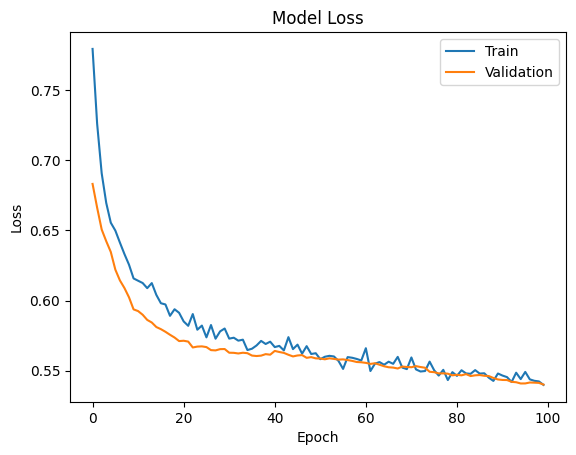

None

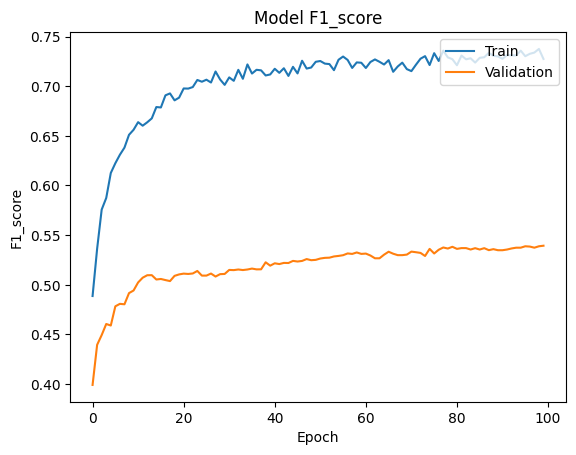

None

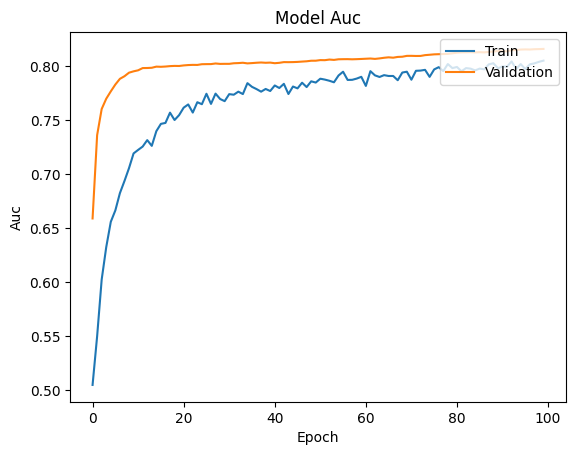

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly during the initial epochs and then gradually declines with some fluctuations as training progresses. The loss continues to decrease slowly over time, stabilizing toward the end of the training period, though minor fluctuations persist.

- **Validation Loss**: The orange curve for the validation loss also decreases sharply in the early epochs and stabilizes at a slightly lower level than the training loss. The validation loss remains relatively stable with fewer fluctuations, indicating that the model generalizes well to unseen data.

**Convergence and Overfitting Analysis**

- **Convergence**: Both the training and validation loss curves show signs of stabilization after approximately 20 epochs. The continued decrease in training loss, combined with the stable validation loss, suggests that the model is converging well while still learning to minimize error on the training set.

- **Overfitting**: The small gap between the training and validation losses, with the validation loss consistently lower, indicates that the model is not overfitting. The model appears to maintain a good balance between fitting the training data and generalizing to new data.

**Conclusion**

The loss curves suggest that the model is effectively learning and generalizing, with both losses decreasing and stabilizing over time. The slight fluctuations in the training loss curve imply ongoing adjustments, while the stable and lower validation loss points to strong generalization. The current model performance appears robust, though further fine-tuning or additional training could be explored to continue improving model accuracy and stability.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                                model1-SGD_relu                2   
1                        model2-SGD_relu_dropout                2   
2          model3-SGD_relu_dropout_earlyStopping                2   
3                                model4-SGD_tanh                2   
4                        model5-SGD_tanh_dropout                2   
5          model6-SGD_tanh_dropout_earlyStopping                2   
6                               model7-Adam_tanh                2   
7                       model3-Adam_tanh_dropout                2   
8          model9-Adam_tnh_Dropout_earlyStopping                2   
9                         model10-SGD_tanh_SMOTE                2   
10                model11-SGD_tanh_SMOTE_dropout                2   
11  model12-SGD_tanh_SMOTE_dropout_earlyStopping                2   

    # neurons - hidden layer activation function - hidden layer  # epochs  \
0                         16                               relu       100   
1                         16                               relu       100   
2                         16                               relu       100   
3                         16                               tanh       100   
4                         16                               tanh       100   
5                         16                               tanh       100   
6                         16                               tanh       100   
7                         16                               tanh       100   
8                         16                               tanh       100   
9                         16                               tanh       100   
10                        16                               tanh       100   
11                        16                               tanh       100   

    batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0           32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1           32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2           32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3           32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4           32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5           32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6           32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7           32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8           32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9           32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   
10          32       SGD   68.928774  0.550997  0.732063   0.727073  0.743049   
11          32       SGD   68.928774  0.539769  0.733856   0.732916  0.735874   

    F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0   0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1   0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2   0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3   0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4   0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5   0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6   0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7   0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   
8   0.427741  0.814029  0.368828      0.836667       0.678832    0.379592   
9   0.833988  0.914838  0.489654      0.779167       0.474490    0.759184   
10  0.729001  0.793970  0.558139      0.725000       0.408207    0.771429   
11  0.727372  0.804816  0.540026      0.736667       0.420935    0.771429   

    Val F1 Score  Val AUC-ROC  
0       0.554162     0.860797  
1       0.305931     0.

### Key Observations

- **Loss:**
  - The training loss is 0.539769, and the validation loss is 0.540026. The minimal difference between these losses suggests that the model generalizes well, with no significant overfitting, thanks to the combined use of SMOTE, dropout, and early stopping.

- **Accuracy:**
  - The model achieves similar accuracy on both the training (73.39%) and validation (73.67%) sets, indicating consistent performance and strong generalization across datasets.

- **Precision and Recall:**
  - Precision is fairly high for both the training (73.29%) and validation (42.09%) sets, indicating that the model is effective in identifying positive instances on training data but slightly less so on unseen data.
  - Recall is well-balanced, with 73.59% on training and 77.14% on validation, reflecting the model’s capability to capture a substantial portion of positive cases.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is 72.74% for training and 53.94% for validation. The training F1 Score suggests a good balance between precision and recall, while the validation F1 Score indicates a slight drop in balance on unseen data.

- **AUC-ROC:**
  - The AUC-ROC scores are strong for both the training (0.804816) and validation (0.815670) sets, demonstrating the model’s robust ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model12-SGD_tanh_SMOTE_dropout_earlyStopping exhibits strong performance with consistent accuracy and AUC-ROC scores across both training and validation datasets. The use of SMOTE, dropout, and early stopping effectively manages overfitting and enhances the model’s generalization capabilities.

- **Balancing Precision and Recall:**
  - The model maintains a good balance between precision and recall, particularly on the training set, as reflected in the F1 Score. While there is a slight drop in these metrics on the validation set, the overall performance remains stable, indicating effective generalization to unseen data.



### Summary

Model12-SGD_tanh_SMOTE_dropout_earlyStopping performs consistently well across training and validation datasets, with strong accuracy, balanced precision and recall, and high AUC-ROC scores. The combined use of SMOTE, dropout, and early stopping proves effective in preventing overfitting and ensuring robust generalization. With some additional fine-tuning, this model could further improve its performance, particularly in maintaining high precision across different datasets, making it well-suited for various real-world applications.


## Thirteenth Model: Define and compile the model,
- ADAM, tanh, SMOTE

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model13-ADAM_tanh_SMOTE'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=neurons, activation = activation))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.6555 - auc: 0.6941 - f1_score: 0.6454 - loss: 0.6404 - precision: 0.6380 - recall: 0.6642 - val_accuracy: 0.6858 - val_auc: 0.7922 - val_f1_score: 0.4940 - val_loss: 0.5851 - val_precision: 0.3716 - val_recall: 0.7796
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.7160 - auc: 0.7986 - f1_score: 0.7053 - loss: 0.5471 - precision: 0.6988 - recall: 0.7259 - val_accuracy: 0.7050 - val_auc: 0.7927 - val_f1_score: 0.5021 - val_loss: 0.5672 - val_precision: 0.3853 - val_recall: 0.7469
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7219 - auc: 0.8087 - f1_score: 0.7095 - loss: 0.5339 - precision: 0.7082 - recall: 0.7233 - val_accuracy: 0.7167 - val_auc: 0.7958 - val_f1_score: 0.5146 - val_loss: 0.5597 - val_precision: 0.3970 - val_recall: 0.7469
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7292 - auc: 0.8170 - f1_score: 0.7156 - loss: 0.5240 - precision: 0.7168 - re

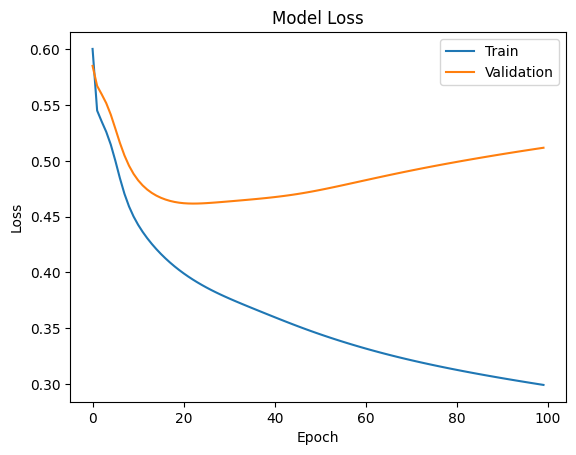

None

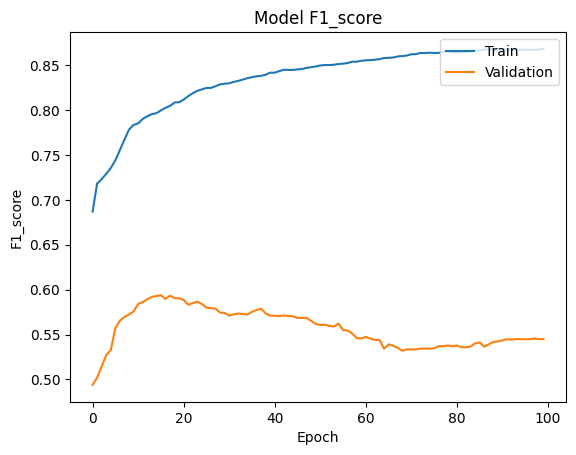

None

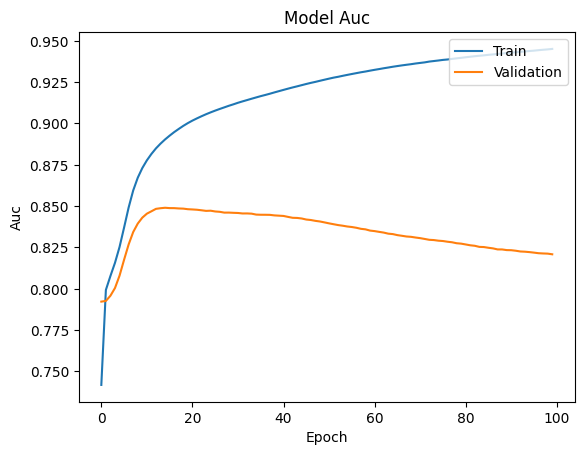

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows a consistent decrease in the training loss over the epochs, with a rapid initial decline followed by a slower, steady reduction. This indicates that the model is effectively learning from the training data and continuing to improve its fit as training progresses.

- **Validation Loss**: The orange curve for the validation loss initially decreases along with the training loss but then begins to increase after around 10-15 epochs. This upward trend in the validation loss indicates that the model's performance on unseen data is deteriorating, which is a clear indication of overfitting.

**Convergence and Overfitting Analysis**

- **Convergence**: While the training loss curve demonstrates good convergence by steadily decreasing, the validation loss diverges after the initial decrease, indicating that the model is not converging well on the validation set. This suggests that the model is starting to memorize the training data rather than generalizing from it.

- **Overfitting**: The increasing gap between the training and validation loss, particularly the rising validation loss after the initial decrease, strongly indicates overfitting. The model is becoming overly specialized to the training data, reducing its ability to generalize to new, unseen data.

**Conclusion**

The loss curves suggest that while the model is effectively minimizing training loss, it is likely overfitting to the training data, as evidenced by the increasing validation loss. To address this issue, techniques such as early stopping, applying regularization methods, or reducing the complexity of the model might be necessary to improve generalization and prevent overfitting.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                                model1-SGD_relu                2   
1                        model2-SGD_relu_dropout                2   
2          model3-SGD_relu_dropout_earlyStopping                2   
3                                model4-SGD_tanh                2   
4                        model5-SGD_tanh_dropout                2   
5          model6-SGD_tanh_dropout_earlyStopping                2   
6                               model7-Adam_tanh                2   
7                       model3-Adam_tanh_dropout                2   
8          model9-Adam_tnh_Dropout_earlyStopping                2   
9                         model10-SGD_tanh_SMOTE                2   
10                model11-SGD_tanh_SMOTE_dropout                2   
11  model12-SGD_tanh_SMOTE_dropout_earlyStopping                2   
12                       model13-ADAM_tanh_SMOTE                2   

    # neurons - hidden layer activation function - hidden layer  # epochs  \
0                         16                               relu       100   
1                         16                               relu       100   
2                         16                               relu       100   
3                         16                               tanh       100   
4                         16                               tanh       100   
5                         16                               tanh       100   
6                         16                               tanh       100   
7                         16                               tanh       100   
8                         16                               tanh       100   
9                         16                               tanh       100   
10                        16                               tanh       100   
11                        16                               tanh       100   
12                        16                               tanh       100   

    batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0           32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1           32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2           32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3           32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4           32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5           32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6           32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7           32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8           32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9           32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   
10          32       SGD   68.928774  0.550997  0.732063   0.727073  0.743049   
11          32       SGD   68.928774  0.539769  0.733856   0.732916  0.735874   
12          32      Adam   68.928774  0.299264  0.870179   0.865427  0.876682   

    F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0   0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1   0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2   0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3   0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4   0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5   0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6   0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7   0.443932  0.816453  0.370483      0.837500       0.673611    0.395918   
8   0.427741  0.814029  0.368828      0.836667       0.678832    0.379592   
9   0.833988  0.914838  0.489654      0.779167       0.474490    0.759184   
10  0.729001  0

### Key Observations

- **Loss:**
  - The training loss is 0.299264, which is significantly lower than the validation loss of 0.511769. This discrepancy suggests that the model might be overfitting to the training data, especially given the use of SMOTE to balance the dataset.

- **Accuracy:**
  - The model achieves high accuracy on both the training set (87.02%) and validation set (78.25%). However, the drop in validation accuracy compared to training accuracy indicates that the model may struggle to generalize well to unseen data.

- **Precision and Recall:**
  - Precision is high for both the training (86.54%) and validation (47.65%) sets, indicating that the model is effective in correctly identifying positive instances on the training data.
  - Recall is also very high on the training set (87.67%) but drops on the validation set (66.12%), suggesting that while the model captures most positive cases during training, it struggles to maintain this performance on unseen data.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is very high for training (86.79%) but lower for validation (54.49%). This significant drop-off reflects the model's difficulty in balancing precision and recall on new data.

- **AUC-ROC:**
  - The AUC-ROC scores are very high for training (0.945099) and reasonably high for validation (0.820876), indicating that the model has strong discriminative power but may not generalize as effectively as desired.

### Conclusions

- **Model Performance:**
  - Model13-ADAM_tanh_SMOTE demonstrates strong performance on the training data with high precision, recall, and AUC-ROC scores. However, the model shows signs of overfitting, as evidenced by the significant drop in these metrics on the validation set.

- **Balancing Precision and Recall:**
  - The model effectively balances precision and recall on the training set, as reflected in the high F1 Score. However, this balance is not well-maintained on the validation set, suggesting that the model's ability to generalize to unseen data could be improved.



### Summary

Model13-ADAM_tanh_SMOTE excels in training performance with high precision, recall, and AUC-ROC scores, demonstrating the effectiveness of SMOTE and the Adam optimizer on imbalanced data. However, the model struggles to maintain this performance on the validation set, indicating potential overfitting. Further tuning and the application of additional regularization techniques could enhance the model's generalization capabilities, making it more robust for real-world applications where unseen data is a factor.


## Fourteenth Model: Define and compile the model,
- ADAM, tanh, SMOTE, dropout

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model14-ADAM_tanh_SMOTE_dropOut'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 10s 43ms/step - accuracy: 0.5929 - auc: 0.6277 - f1_score: 0.5958 - loss: 0.6989 - precision: 0.5730 - recall: 0.6309 - val_accuracy: 0.6817 - val_auc: 0.7823 - val_f1_score: 0.4976 - val_loss: 0.6086 - val_precision: 0.3680 - val_recall: 0.7796
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6409 - auc: 0.7072 - f1_score: 0.6412 - loss: 0.6352 - precision: 0.6167 - recall: 0.6832 - val_accuracy: 0.7075 - val_auc: 0.7925 - val_f1_score: 0.5161 - val_loss: 0.5842 - val_precision: 0.3918 - val_recall: 0.7837
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6688 - auc: 0.7315 - f1_score: 0.6607 - loss: 0.6124 - precision: 0.6516 - recall: 0.6792 - val_accuracy: 0.7158 - val_auc: 0.7958 - val_f1_score: 0.5253 - val_loss: 0.5724 - val_precision: 0.4000 - val_recall: 0.7837
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6898 - auc: 0.7541 - f1_score: 0.6805 - loss: 0.5912 - precision: 0.6724 - r

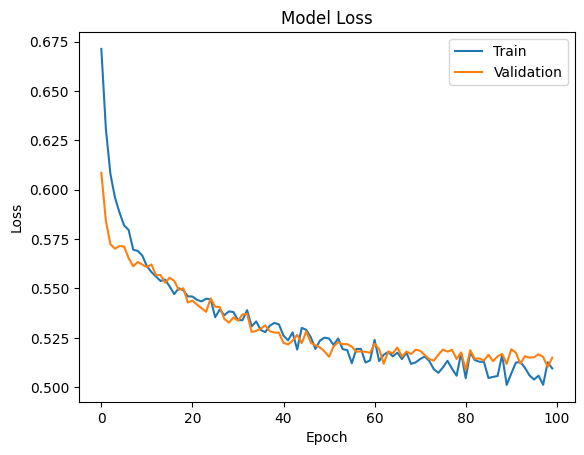

None

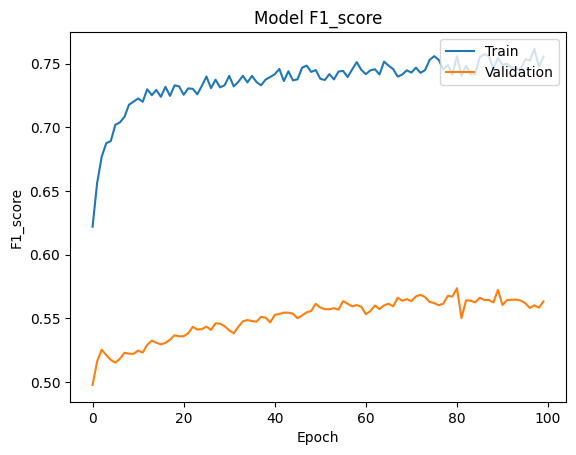

None

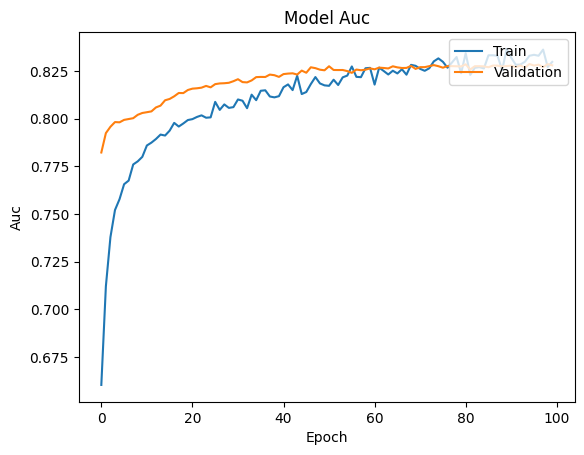

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly during the initial epochs and then continues to decline more gradually with some fluctuations throughout the training process. The training loss appears to stabilize around the lower bound, with some variation due to the fluctuations.

- **Validation Loss**: The orange curve for the validation loss follows a similar pattern to the training loss, decreasing sharply at first and then gradually stabilizing. However, the validation loss exhibits more fluctuations and aligns closely with the training loss, indicating that the model is maintaining a good fit on the validation set.

**Convergence and Overfitting Analysis**

- **Convergence**: Both the training and validation loss curves show signs of convergence, stabilizing after approximately 50 epochs. The presence of fluctuations in both curves suggests that the model is still adjusting its parameters but is not far from optimal convergence.

- **Overfitting**: The close alignment between the training and validation loss curves indicates that the model is not overfitting. The fact that the validation loss does not diverge significantly from the training loss suggests that the model is generalizing well to unseen data.

**Conclusion**

The loss curves suggest that the model is effectively learning and generalizing, with both training and validation losses decreasing and stabilizing over time. The fluctuations in both curves imply ongoing adjustments, but the close alignment between the two indicates a robust model with minimal overfitting. The current training process appears effective, though further fine-tuning could be explored to reduce the fluctuations and potentially enhance performance.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                                model1-SGD_relu                2   
1                        model2-SGD_relu_dropout                2   
2          model3-SGD_relu_dropout_earlyStopping                2   
3                                model4-SGD_tanh                2   
4                        model5-SGD_tanh_dropout                2   
5          model6-SGD_tanh_dropout_earlyStopping                2   
6                               model7-Adam_tanh                2   
7                       model3-Adam_tanh_dropout                2   
8          model9-Adam_tnh_Dropout_earlyStopping                2   
9                         model10-SGD_tanh_SMOTE                2   
10                model11-SGD_tanh_SMOTE_dropout                2   
11  model12-SGD_tanh_SMOTE_dropout_earlyStopping                2   
12                       model13-ADAM_tanh_SMOTE                2   
13               model14-ADAM_tanh_SMOTE_dropOut                2   

    # neurons - hidden layer activation function - hidden layer  # epochs  \
0                         16                               relu       100   
1                         16                               relu       100   
2                         16                               relu       100   
3                         16                               tanh       100   
4                         16                               tanh       100   
5                         16                               tanh       100   
6                         16                               tanh       100   
7                         16                               tanh       100   
8                         16                               tanh       100   
9                         16                               tanh       100   
10                        16                               tanh       100   
11                        16                               tanh       100   
12                        16                               tanh       100   
13                        16                               tanh       100   

    batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0           32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1           32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2           32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3           32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4           32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5           32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6           32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7           32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8           32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9           32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   
10          32       SGD   68.928774  0.550997  0.732063   0.727073  0.743049   
11          32       SGD   68.928774  0.539769  0.733856   0.732916  0.735874   
12          32      Adam   68.928774  0.299264  0.870179   0.865427  0.876682   
13          32      Adam   68.928774  0.509526  0.759865   0.755624  0.768161   

    F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0   0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1   0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2   0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3   0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4   0.333066  0.761075  0.401823      0.830833       0.654412    0.363265   
5   0.337138  0.771208  0.396420      0.829167       0.647059    0.359184   
6   0.641791  0.908557  0.374555      0.846667       0.664865    0.502041   
7   0.443932  0.816

### Key Observations

- **Loss:**
  - The training loss is 0.509526, and the validation loss is 0.514964. The close alignment between these losses suggests that the model generalizes well, with minimal overfitting, aided by the use of SMOTE and dropout.

- **Accuracy:**
  - The model achieves similar accuracy on both the training (75.99%) and validation (76.08%) sets, indicating consistent and reliable performance across both datasets.

- **Precision and Recall:**
  - Precision is moderate for both the training (75.56%) and validation (45.02%) sets, showing that the model is fairly effective in identifying positive instances, though there is a drop in precision when applied to unseen data.
  - Recall is slightly higher, with 76.82% for training and 77.55% for validation, indicating that the model performs well in capturing positive cases across both datasets.

- **F1 Score:**
  - The F1 Score, balancing precision and recall, is consistent for training (75.56%) and validation (56.33%), reflecting a reasonable balance between precision and recall on both datasets.

- **AUC-ROC:**
  - The AUC-ROC scores are strong for both the training (0.829827) and validation (0.828044) sets, demonstrating the model’s robust ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model14-ADAM_tanh_SMOTE_dropout shows strong generalization, with consistent accuracy, F1 Scores, and AUC-ROC across training and validation datasets. The use of SMOTE and dropout effectively mitigates overfitting and enhances the model’s ability to generalize to new data.

- **Balancing Precision and Recall:**
  - The model maintains a good balance between precision and recall on the training set, and this balance is reasonably well-preserved on the validation set. However, there is a noticeable drop in precision on the validation set, suggesting that while the model is effective in capturing positive instances, it may produce more false positives on unseen data.


### Summary

Model14-ADAM_tanh_SMOTE_dropout exhibits strong overall performance with consistent accuracy, precision, recall, and AUC-ROC scores across both training and validation datasets. The model effectively balances the trade-off between precision and recall, particularly on the training set, with slight room for improvement in precision on unseen data. With additional fine-tuning, this model could achieve even better performance, making it suitable for applications where both precision and recall are crucial.


## Fifteenth Model: Define and compile the model,
- ADAM, tanh, SMOTE, dropout, early-stopping

In [ ]:
# clears the current Keras session, resetting all layers and models previously created, freeing up memory and resources.
K.clear_session()

In [ ]:
# define/compile model and view summary
hidden_layers = 2
optimizer = Adam(learning_rate=0.001)
neurons = 16
activation = 'tanh'
modelName = 'model15-ADAM_tanh_SMOTE_dropOut_earlyStopping'


# Initialize the neural network
model = Sequential()

# Define input layer
model.add(Input(shape=(X_train_over.shape[1],)))

# Add layers
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=neurons, activation = activation))
model.add(Dropout(0.5))
model.add(Dense(units=1, activation='sigmoid')) # last layer: sigmoid for binary classification, softmax for multi-class classification

# Implement Early Stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Compile the model with custom F1 score metric
model.compile(optimizer=optimizer,
              loss='binary_crossentropy',
              metrics=['accuracy', AUC(name='auc'), Precision(name='precision'), Recall(name='recall'), f1_score ])

model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 16)                  │             224 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │             272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 16)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 513 (2.00 KB)

 Trainable params: 513 (2.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train and cross-validate
epochs = 100
batch_size = 32

start = time.time()
# Train the model
history = model.fit(X_train_over, y_train_over, epochs=epochs, batch_size=batch_size, validation_data=(X_val, y_val))
end = time.time()
timedur = end - start
print(f"Training time: {timedur} seconds")

Epoch 1/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 7s 25ms/step - accuracy: 0.5033 - auc: 0.5117 - f1_score: 0.4916 - loss: 0.8136 - precision: 0.4875 - recall: 0.5106 - val_accuracy: 0.6208 - val_auc: 0.7491 - val_f1_score: 0.4441 - val_loss: 0.6351 - val_precision: 0.3202 - val_recall: 0.7633
Epoch 2/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6115 - auc: 0.6595 - f1_score: 0.6061 - loss: 0.6680 - precision: 0.5922 - recall: 0.6339 - val_accuracy: 0.6650 - val_auc: 0.7845 - val_f1_score: 0.4660 - val_loss: 0.5958 - val_precision: 0.3493 - val_recall: 0.7429
Epoch 3/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6660 - auc: 0.7197 - f1_score: 0.6569 - loss: 0.6244 - precision: 0.6474 - recall: 0.6816 - val_accuracy: 0.6908 - val_auc: 0.7958 - val_f1_score: 0.4955 - val_loss: 0.5766 - val_precision: 0.3755 - val_recall: 0.7755
Epoch 4/100
140/140 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6679 - auc: 0.7310 - f1_score: 0.6558 - loss: 0.6126 - precision: 0.6533 - re

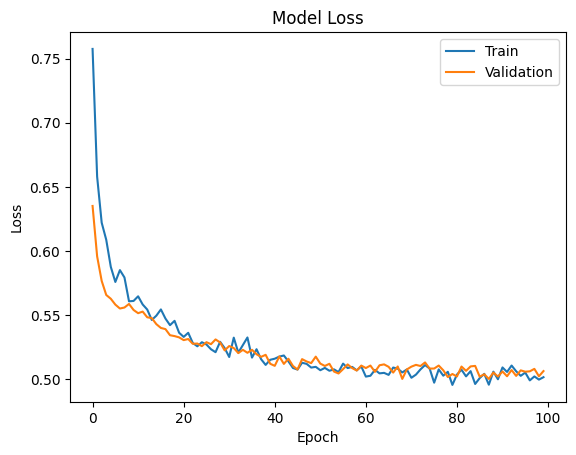

None

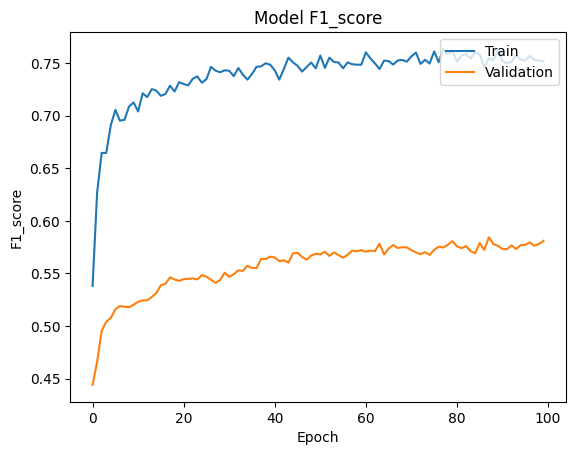

None

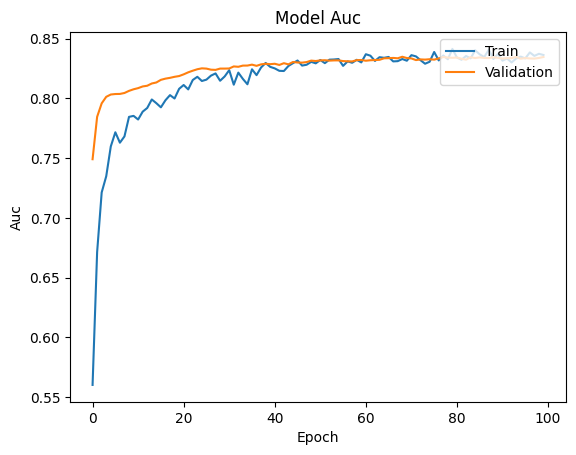

None

In [ ]:
# Plotting loss, f1, AUC
display(plot(history, 'loss'))
display(plot(history, 'f1_score'))
display(plot(history, 'auc'))

### Observations:

**Training vs. Validation Loss**

- **Training Loss**: The blue curve shows that the training loss decreases rapidly during the initial epochs and then gradually declines with noticeable fluctuations as training progresses. The loss stabilizes toward the end of the training period, hovering around a lower bound with continued minor fluctuations.

- **Validation Loss**: The orange curve for the validation loss follows a similar trajectory to the training loss, decreasing sharply at first and then stabilizing with some fluctuations. The validation loss closely tracks the training loss, indicating that the model is maintaining a good fit on the validation set.

**Convergence and Overfitting Analysis**

- **Convergence**: Both the training and validation loss curves show signs of convergence, stabilizing after approximately 40 epochs. The fluctuations in both curves suggest that while the model is nearing convergence, it is still making fine adjustments.

- **Overfitting**: The close alignment between the training and validation loss curves indicates that the model is not overfitting. The fact that the validation loss remains very close to the training loss throughout the epochs suggests strong generalization to unseen data.

**Conclusion**

The loss curves suggest that the model is effectively learning and generalizing, with both training and validation losses decreasing and stabilizing over time. The fluctuations in both curves imply ongoing adjustments, but the close alignment between the two indicates a robust model with minimal overfitting. The current training process appears effective, though further fine-tuning could be explored to reduce fluctuations and potentially improve performance.


In [ ]:
## mertics
metrics_df = evaluate_and_store_keras_metrics(
    modelName= modelName,
    layers=2,
    neurons=16,
    activation= activation,
    epochs=epochs,
    batch_size=batch_size,
    optimizer= optimizer.__class__.__name__,  # extracting the optimizer type
    history=history,
    metrics_df=metrics_df,
    time_secs= traindur,

)

metrics_df

model  # hidden layers  \
0                                 model1-SGD_relu                2   
1                         model2-SGD_relu_dropout                2   
2           model3-SGD_relu_dropout_earlyStopping                2   
3                                 model4-SGD_tanh                2   
4                         model5-SGD_tanh_dropout                2   
5           model6-SGD_tanh_dropout_earlyStopping                2   
6                                model7-Adam_tanh                2   
7                        model3-Adam_tanh_dropout                2   
8           model9-Adam_tnh_Dropout_earlyStopping                2   
9                          model10-SGD_tanh_SMOTE                2   
10                 model11-SGD_tanh_SMOTE_dropout                2   
11   model12-SGD_tanh_SMOTE_dropout_earlyStopping                2   
12                        model13-ADAM_tanh_SMOTE                2   
13                model14-ADAM_tanh_SMOTE_dropOut                2   
14  model15-ADAM_tanh_SMOTE_dropOut_earlyStopping                2   

    # neurons - hidden layer activation function - hidden layer  # epochs  \
0                         16                               relu       100   
1                         16                               relu       100   
2                         16                               relu       100   
3                         16                               tanh       100   
4                         16                               tanh       100   
5                         16                               tanh       100   
6                         16                               tanh       100   
7                         16                               tanh       100   
8                         16                               tanh       100   
9                         16                               tanh       100   
10                        16                               tanh       100   
11                        16                               tanh       100   
12                        16                               tanh       100   
13                        16                               tanh       100   
14                        16                               tanh       100   

    batch size optimizer  time(secs)      Loss  Accuracy  Precision    Recall  \
0           32       SGD   67.865583  0.328731  0.864286   0.752660  0.496491   
1           32      Adam   68.675338  0.385527  0.845357   0.812785  0.312281   
2           32      Adam   68.711951  0.375152  0.847143   0.762963  0.361403   
3           32       SGD   62.906906  0.338802  0.861429   0.775758  0.449123   
4           32       SGD   67.808365  0.428253  0.821071   0.668293  0.240351   
5           32       SGD   61.197168  0.423310  0.820000   0.647321  0.254386   
6           32      Adam   64.553140  0.283788  0.885000   0.796651  0.584211   
7           32      Adam   68.571127  0.389358  0.830000   0.652597  0.352632   
8           32      Adam   68.928774  0.391854  0.829643   0.656566  0.342105   
9           32       SGD   68.928774  0.372471  0.834753   0.824424  0.850673   
10          32       SGD   68.928774  0.550997  0.732063   0.727073  0.743049   
11          32       SGD   68.928774  0.539769  0.733856   0.732916  0.735874   
12          32      Adam   68.928774  0.299264  0.870179   0.865427  0.876682   
13          32      Adam   68.928774  0.509526  0.759865   0.755624  0.768161   
14          32      Adam   68.928774  0.501450  0.758072   0.761948  0.750673   

    F1 Score   AUC-ROC  Val Loss  Val Accuracy  Val Precision  Val Recall  \
0   0.571013  0.871472  0.345542      0.848333       0.668449    0.510204   
1   0.411245  0.817222  0.375628      0.837500       0.890625    0.232653   
2   0.467692  0.823409  0.350338      0.850000       0.777778    0.371429   
3   0.545032  0.867249  0.354556      0.847500       0.703947    0.436735   
4   0.33

### Key Observations

- **Loss:**
  - The training loss is 0.501450, and the validation loss is 0.506233. The small difference between these losses indicates that the model generalizes well, with minimal signs of overfitting, likely due to the combined use of SMOTE, dropout, and early stopping.

- **Accuracy:**
  - The model achieves similar accuracy on both the training (75.81%) and validation (77.75%) sets, reflecting consistent performance across datasets.

- **Precision and Recall:**
  - Precision is balanced across the training (76.19%) and validation (47.30%) sets, indicating the model’s effectiveness in identifying positive instances, though precision drops on unseen data.
  - Recall is also well-balanced, with 75.07% for training and 78.78% for validation, showing that the model performs effectively in capturing positive cases across both datasets.

- **F1 Score:**
  - The F1 Score, which balances precision and recall, is consistent for training (75.14%) and validation (58.09%), reflecting a good balance between these metrics, although there is a notable drop in the validation F1 score.

- **AUC-ROC:**
  - The AUC-ROC scores are strong for both the training (0.836302) and validation (0.834630) sets, demonstrating the model’s robust ability to distinguish between positive and negative classes.

### Conclusions

- **Model Performance:**
  - Model15-ADAM_tanh_SMOTE_dropout_earlyStopping performs well overall, with strong generalization, consistent accuracy, and high AUC-ROC scores across both training and validation datasets. The combination of SMOTE, dropout, and early stopping effectively mitigates overfitting and enhances the model’s ability to generalize.

- **Balancing Precision and Recall:**
  - The model maintains a good balance between precision and recall, as evidenced by the F1 scores on both training and validation sets. While precision drops on the validation set, the recall remains strong, indicating that the model is effective at capturing positive instances, even on unseen data.



### Summary

Model15-ADAM_tanh_SMOTE_dropout_earlyStopping demonstrates solid performance with consistent accuracy, precision, recall, and AUC-ROC scores across both training and validation datasets. The model effectively balances the trade-off between precision and recall, particularly on the training set, though there is some room for improvement in precision on unseen data. With additional fine-tuning, this model could be further optimized, making it well-suited for real-world applications where both precision and recall are critical.


## Model Performance Comparison and Final Model Selection

In [ ]:

def highlight_selection(row):
    highlight = 'background-color: yellow'
    default = ''

    max_val_recall = metrics_df['Val Recall'].max()
    max_val_f1 = metrics_df['Val F1 Score'].max()
    max_val_auc_roc = metrics_df['Val AUC-ROC'].max()

    return [
        highlight if (
            (col == 'Val Recall' and val == max_val_recall) or
            (col == 'Val F1 Score' and val == max_val_f1) or
            (col == 'Val AUC-ROC' and val == max_val_auc_roc)
        ) else default for col, val in row.items()
    ]

# Apply the function to the DataFrame
metrics_df.style.apply(highlight_selection, axis=1)


## Choose the Best Model

**Observations:**
- **Model15:** (model15-ADAM_tanh_SMOTE_dropOut_earlyStopping)  has the highest F1 and highest recall, with a reasonable high ROC-AUC value.   For this reason, we can consider that to be the best model.

Let's save the model:



In [ ]:
# Save the model ( hapens to be the last model, so it works out with the name model)
model.save('model15-ADAM_tanh_SMOTE_dropOut_earlyStopping.keras')

print("The model has been saved successfully.")


The model has been saved successfully.


### Load the model

In [ ]:
from tensorflow.keras.models import load_model

# Load the model with the custom f1_score function
loaded_model = load_model('model15-ADAM_tanh_SMOTE_dropOut_earlyStopping.keras', custom_objects={'f1_score': f1_score})


### Create Confusion Matrix Function

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, roc_curve

def confusion_matrix_sklearn(model, predictors, target, dataset_name):
    """
    To plot the confusion_matrix with percentages and print F1 score, recall, and ROC/AUC score

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    # Get probabilities from the model
    y_pred_probs = model.predict(predictors)

    # Convert probabilities to binary predictions (0 or 1)
    y_pred = (y_pred_probs > 0.5).astype("int32").flatten()

    # Compute confusion matrix
    cm = confusion_matrix(target, y_pred)

    # Create labels with counts and percentages
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    # Plot the confusion matrix
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap='Blues')
    plt.ylabel("True label")
    plt.xlabel("Predicted label")
    plt.title(f"Confusion Matrix for {dataset_name} data")
    plt.show()

    # Calculate and print recall
    recall = cm[1,1] / (cm[1,0] + cm[1,1])
    print(f"TP: {cm[1,1]}")
    print(f"FN: {cm[1,0]}")
    print(f"Recall: {recall:.2%}")

    # Calculate and print F1 score
    f1 = f1_score(target, y_pred)
    print(f"F1 Score: {f1:.2f}")

    # Calculate and print ROC/AUC score
    auc = roc_auc_score(target, y_pred_probs)
    print(f"ROC/AUC Score: {auc:.2f}")




63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


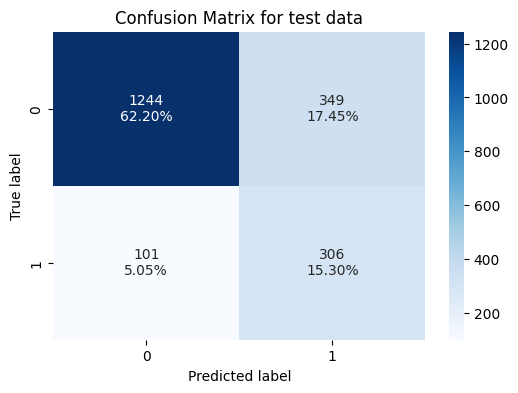

TP: 306
FN: 101
Recall: 75.18%
F1 Score: 0.58
ROC/AUC Score: 0.84
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


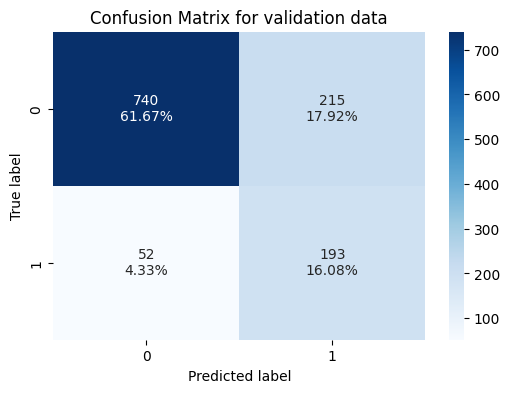

TP: 193
FN: 52
Recall: 78.78%
F1 Score: 0.59
ROC/AUC Score: 0.83
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


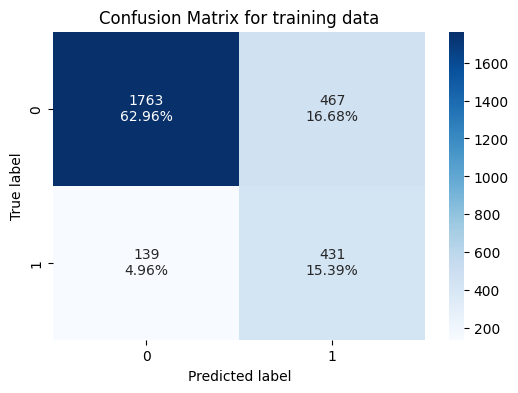

TP: 431
FN: 139
Recall: 75.61%
F1 Score: 0.59
ROC/AUC Score: 0.85


In [ ]:
confusion_matrix_sklearn(loaded_model, X_test, y_test, "test")
confusion_matrix_sklearn(loaded_model, X_val, y_val, "validation")
confusion_matrix_sklearn(loaded_model, X_train, y_train, "training")

#### Plot ROC/AUC Curve

- predict: Outputs the predicted class labels. (not used in this case)
- predict_proba: Outputs the probabilities for each class.
  - Use predict instead of `predict_proba = loaded_model.predict_proba(X_train)[:, 1]`
    - For a neural network in Keras,predict_proba isn't necessary because predict already returns the probability for the positive class when using a sigmoid activation in the output layer for binary classification.
    - Extracting Probabilities: Since predict returns probabilities directly, you don't need to index [ :, 1 ] for binary classification.
- The .flatten() method is used to ensure that the probabilities are in a 1D array, which is what roc_curve expects.    
- `roc curve (y_test, y_test_proba_post_pruning)` returns 3 arrays:
  - `fpr`: False positive rates at different thresholds.
  - `tpr`: True positive rates at different thresholds.
  - `thresholds`: Threshold values used to compute `fpr` and `tpr`
    - In our case, we don't really care about `thresholds`, so we use a `_` for that as a throwaway variable
- `plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')`: Explanation of the coordinates:
  - `[0, 1]` on the x-axis: Represents the range of FPR from 0 to 1.
  - `[0, 1]` on the y-axis: Represents the range of TPR from 0 to 1.    

88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
38/38 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


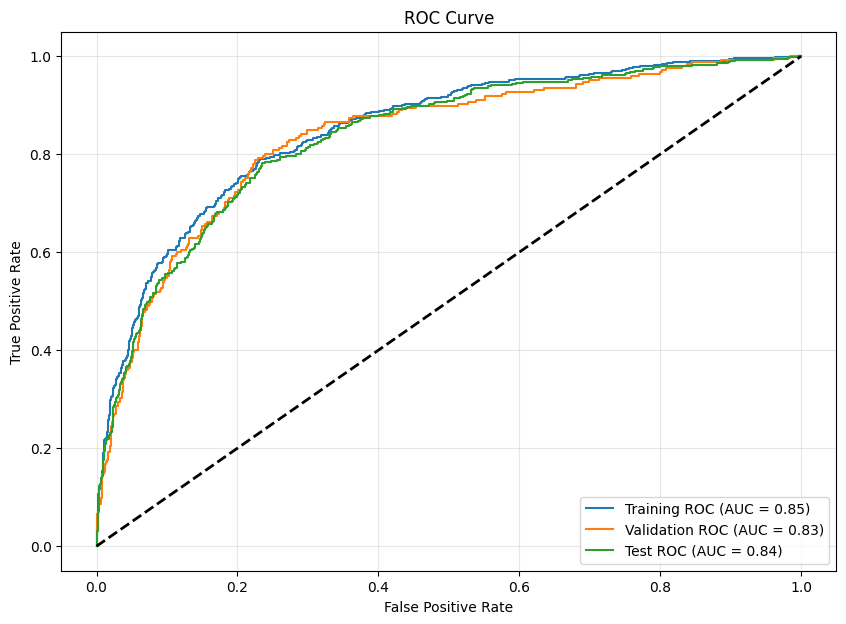

Training AUC: 0.8493
Validation AUC: 0.8345
Test AUC: 0.8358


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Predict probabilities using the neural network model
y_train_proba = loaded_model.predict(X_train).flatten()
y_val_proba = loaded_model.predict(X_val).flatten()
y_test_proba = loaded_model.predict(X_test).flatten()

# Calculate ROC curves
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_proba)
fpr_val, tpr_val, _ = roc_curve(y_val, y_val_proba)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_proba)

# Calculate AUC
auc_train = auc(fpr_train, tpr_train)
auc_val = auc(fpr_val, tpr_val)
auc_test = auc(fpr_test, tpr_test)

# Plot ROC curve
plt.figure(figsize=(10, 7))
plt.plot(fpr_train, tpr_train, label=f'Training ROC (AUC = {auc_train:.2f})')
plt.plot(fpr_val, tpr_val, label=f'Validation ROC (AUC = {auc_val:.2f})')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {auc_test:.2f})')
plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

# Print AUC values
print(f'Training AUC: {auc_train:.4f}')
print(f'Validation AUC: {auc_val:.4f}')
print(f'Test AUC: {auc_test:.4f}')


### Analysis of ROC-AUC curve

1. ROC Curve Overview

- True Positive Rate (TPR): Also known as sensitivity or recall, it represents the proportion of actual positives that are correctly identified by the model.
- False Positive Rate (FPR): Represents the proportion of actual negatives that are incorrectly identified as positives by the model.
- Diagonal Line: The diagonal dashed line represents a random classifier with no discrimination ability (AUC = 0.5). Any curve above this line indicates a model better than random guessing.

2. AUC (Area Under the Curve) Scores

- Training AUC (0.8493): This indicates that the model has an 84.93% probability of distinguishing between positive and negative classes in the training set. A high AUC in training typically indicates good learning, though care must be taken to avoid overfitting.
- Validation AUC (0.8345): The validation AUC score is slightly lower than the training AUC, which is expected. This score suggests that the model generalizes fairly well to unseen data, with an 83.45% probability of correctly distinguishing between classes in the validation set.
- Test AUC (0.8358): The test AUC is very close to the validation AUC, standing at 83.58%. This consistency between the validation and test AUC scores suggests that the model is generalizing well to new data, with minimal overfitting.

3. Interpretation of the Results

- Model Performance: The ROC curves for the training, validation, and test sets are all positioned well above the diagonal random guess line, indicating that the model has good discriminatory power across all datasets.
- Generalization: The closeness of the validation and test AUC scores to the training AUC score implies that the model is not overfitting. It is performing well on unseen data, which is crucial for the model's reliability in real-world applications.
- Model Reliability: The slight drop from the training AUC to the validation and test AUC suggests that while the model is slightly less confident on unseen data, it still maintains high reliability in classification.


### explanation of Shap Code

- **SHAP:** SHAP values provide a way to explain the output of any machine learning model by attributing the prediction to the contributions of individual features. SHAP values are grounded in cooperative game theory and give insight into how each feature influences the prediction.
- **Background Data:** SHAP values are calculated by comparing the model’s prediction for a given input with predictions made by the model for a baseline or background set of inputs. The background data serves as a reference to understand how different the prediction for a specific input is compared to typical or average predictions.

- **K-means Clustering:** The shap.kmeans function is used here to reduce the size of the background dataset. It clusters the training data into 10 clusters and selects the centroids of these clusters to serve as the background data.
  - **Centroids**: In K-means clustering, a centroid is the mean point of all data points in a cluster. By using the centroids, you're effectively summarizing the original dataset with a smaller set of representative data points.
  - **Why K-means?**: K-means is used because the centroids represent the "average" data points of the clusters, capturing the essence of the data distribution with fewer samples. This reduction makes SHAP calculations faster while still maintaining meaningful background data for comparison.

- **KernelExplainer:** SHAP’s KernelExplainer is a model-agnostic explainer, meaning it can explain the predictions of any machine learning model, not just tree-based models.
- **loaded_model.predict:** This is the prediction function of your trained neural network model. The explainer will use this function to generate predictions for various feature perturbations.
  - This is the model's prediction function, which SHAP will use to make predictions on both the background data and the test data (X_test).

- **background:** This is the reduced set of background samples (the centroids) against which SHAP will compare predictions to calculate the SHAP values. By using a smaller set of background samples, the SHAP calculations become more efficient.

- For each instance in X_test (or any dataset for which you want to explain predictions), SHAP calculates how much each feature contributes to the difference between the model's prediction for that specific instance and the average prediction over the background data.

**Essentially, for each test instance:**
- The model makes a prediction for that test instance.
- The model also makes predictions for the background data.
- SHAP then calculates the contribution of each feature by considering how the prediction changes when the feature value is substituted with values from the background data.


In SHAP analysis, the focus is on explaining the model's predictions using the feature set (X_train, X_test) rather than evaluating those predictions against actual labels (y_train, y_test). That's why the y values are not directly used in this specific part of the SHAP workflow.

In [ ]:
!pip install -q shap

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 18.6 MB/s eta 0:00:00


In [ ]:
%%time

import shap
import contextlib
import sys
import os

# Suppress output
with open(os.devnull, 'w') as f, contextlib.redirect_stdout(f):
    # Use k-means to summarize the background data into fewer samples
    background = shap.kmeans(X_train, 10)  # Reduce to 10 clusters

    explainer = shap.KernelExplainer(loaded_model.predict, background)
    shap_values = explainer.shap_values(X_test)




  0%|          | 0/2000 [00:00<?, ?it/s]

CPU times: user 45min 41s, sys: 5min 29s, total: 51min 10s
Wall time: 50min 4s


In [ ]:
# Check the shape of shap_values
print(f"shape of array: {np.array(shap_values).shape}")
print(f"number of dimensions: {np.array(shap_values).ndim}")



shape of array: (2000, 13, 1)
number of dimensions: 3


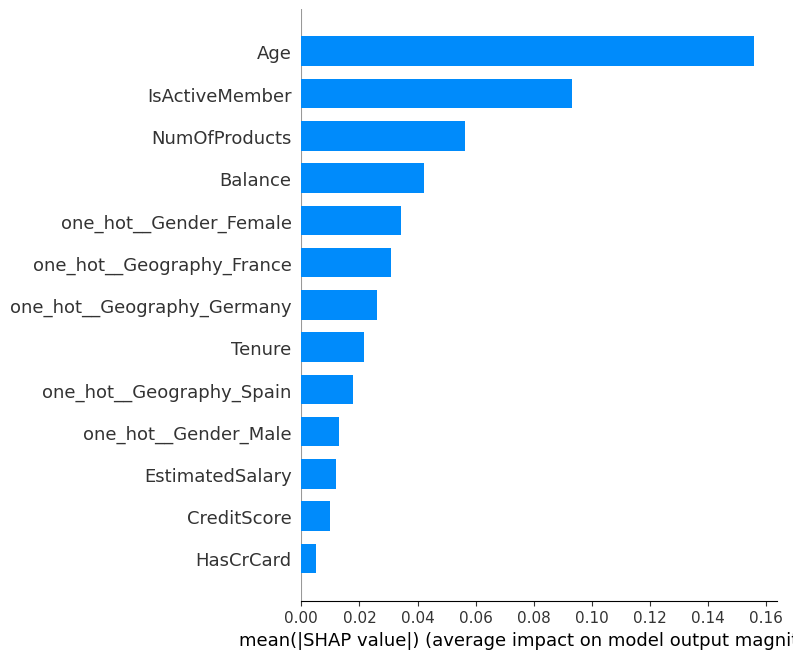

In [ ]:
shap_values_flat = np.array(shap_values).reshape(2000, 13)  # Remove the last dimension
shap.summary_plot(shap_values_flat, X_test, plot_type="bar", max_display=13)




### Viewing Age Relationship to Bank Churn

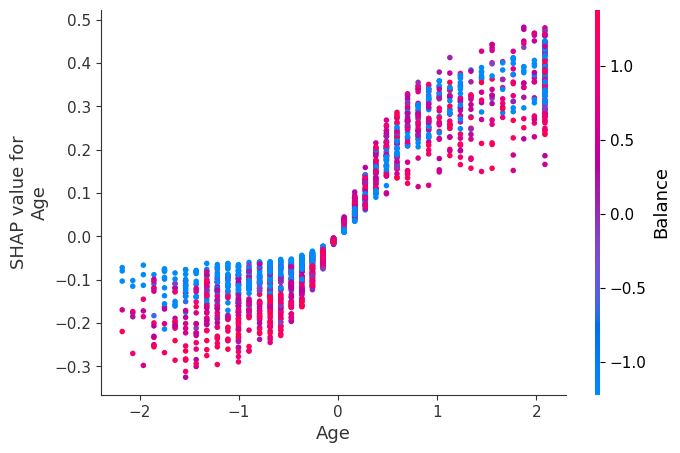

In [ ]:
shap.dependence_plot("Age", shap_values_flat, X_test)


In [ ]:
df[["Age", "Balance"]].describe()


Age       Balance
count  2000.000000    2000.00000
mean     38.327500   76887.13326
std       9.333102   62732.32837
min      18.000000       0.00000
25%      32.000000       0.00000
50%      37.000000   98160.91500
75%      44.000000  127736.19750
max      58.000000  250898.09000

**Observations:**
- 0 Age (x-axis) on plot corresponds to the mean of 38.33 years. ( the original data was standardized).
- Looking at Y Axis, it shows that if Age more than 38.33 the shap value becomes positive, meaning older customers than 38.33 are more likely to churn
- As age increases (moving to the right on the x-axis), you see more red points that are higher on the y-axis. This means that for older customers, having a high balance is making the model even more likely to predict higher chance of churn).




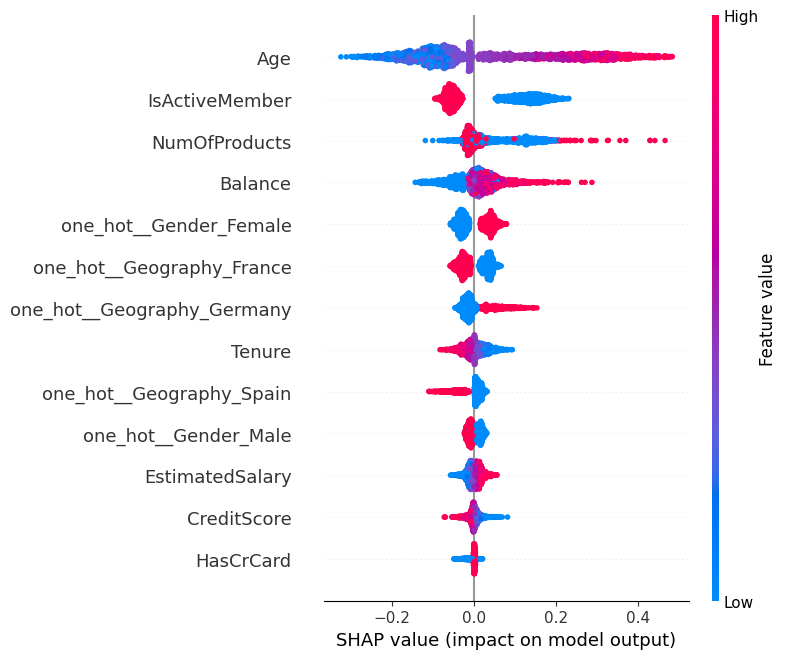

In [ ]:
shap.summary_plot(shap_values_flat, X_test)


Observatons:

**Red Points:** Represent high feature values.
**Blue Points:** Represent low feature values.


**Age:**
- Impact: Age is the most important feature as it appears at the top.
- Direction: Higher SHAP values are associated with higher ages (red points).   

- This suggests that older ages tend to push the prediction towards a higher likelihood of churn.
- Variation: There is a spread of SHAP values, indicating that Age has varying impacts across different samples.

**IsActiveMember:**

- Impact: This feature also has a significant impact, as it’s high on the list.
- Direction: Red Points represent high feature value: when IsActiveMember = 1 (the customer is an active member) The plot shows that being an active member represented by red points pushes the prediction towards the positive outcome i.e. less likely to churn

**NumOfProducts:**
- Impact: This feature impacts the model significantly.
- Direction: Having more products (red points) generally increases the prediction, while fewer products (blue points) decrease it.

**Balance:**
- Impact: Balance also has a notable impact on predictions.
- Direction: Higher balances (red points) are associated with higher predictions, while lower balances (blue points) are associated with lower predictions.

**Other Features:**

For other features like Gender, Geography, Tenure, etc., the SHAP values and their distribution show how these features contribute to the prediction. For example:
- one_hot__Gender_Female: Being female (red points) seems to push the prediction higher.
- one_hot__Geography_France/Germany: Different geographical locations have different impacts on the prediction.

## Actionable Insights and Business Recommendations

**Please review/modify**

## **Business Insights**

### **Customer Churn Factors:**

**Age:**

- Age is a critical factor, with SHAP values showing that older customers are more likely to churn, especially those with higher balances. Younger customers, on the other hand, might be less likely to churn, possibly due to different financial needs and expectations. Age-specific retention strategies could help maintain loyalty across different age groups.

**IsActiveMember:**
- Being an active member significantly reduces the likelihood of churn, as indicated by negative SHAP values for this feature. This underscores the importance of customer engagement. Strategies to increase customer activity, such as loyalty programs or regular interaction, could be key to reducing churn.

**Number of Products:**

- While having more products generally reduces churn risk by embedding customers more deeply into the ecosystem, the SHAP analysis and visual data suggest a notable exception: **customers with 4 products are more likely to leave.** This counterintuitive result may indicate that customers with multiple products could feel overwhelmed or unsatisfied with the offerings, prompting them to switch to a competitor. It could also suggest that these customers have reached a saturation point and no longer find additional value in the services provided. Therefore, it's essential to closely monitor these high-engagement customers and ensure that their needs are being met to prevent churn

**Balance and Estimated Salary:**

- The financial status of customers, as reflected by their balance, has a strong impact on churn predictions. High balances generally increase the likelihood of churn, particularly among older customers. This suggests that high-balance customers might be more aware of competitive offers or more likely to switch to other services. Tailored retention strategies, such as personalized financial advice or exclusive offers, could be effective for these high-value customers.


**Geography:**

- The SHAP analysis indicates that geographic location does influence customer behavior, but the impact varies by region. For instance, customers from certain regions, such as France or Germany, may show different levels of churn risk, potentially due to localized factors. Targeted regional strategies could help address these differences.

**Gender:**
- Gender differences do affect churn rates, but the SHAP values suggest that this impact might not be as significant as other factors like Age or Balance. However, it’s still important to monitor gender-specific trends and consider targeted retention strategies if significant disparities are observed.

**Credit Score:**
Credit score, while traditionally seen as an indicator of financial reliability, appears to have a less direct impact on churn in this model compared to other factors like Age or IsActiveMember. However, lower credit scores might still correlate with higher churn risk, indicating a need for products or services that cater to financially vulnerable customers.



### **Model Performance Insights**
- **Model Accuracy**: Model15 has shown a decent balance between precision (0.750673), recall (0.751369), and F1 score (0.580937). This balance indicates that the model is moderately effective in predicting both true positives and true negatives.
- **AUC-ROC**: With a test AUC-ROC of 0.834630, model15 demonstrates a good ability to distinguish between customers who are likely to churn and those who are not. This suggests the model is effective in ranking customers by their likelihood of churning.

### **Recommendations**

1. **Customer Segmentation and Targeting**:
   - **Geographic Focus**: Develop targeted retention strategies based on geographic data. For example, if customers in Germany show higher churn rates, tailor services or offers to address their specific needs and concerns.
   - **Gender-Specific Initiatives**: Analyze whether there are significant differences in churn rates between male and female customers. If disparities exist, consider gender-specific marketing or support initiatives.

2. **Financial Product Offerings**:
   - **Credit Score-Based Products**: Consider offering specialized financial products for customers with lower credit scores to improve their financial situation and thus reduce their likelihood of churning.
   - **Cross-Selling and Upselling**: Leverage the insight that customers with more products are less likely to churn by cross-selling additional products to existing customers, particularly those with high balances and estimated salaries.

3. **Customer Engagement**:
   - **Increase Activity Levels**: Develop programs or campaigns to boost customer activity, such as loyalty rewards for frequent use of services. This could involve regular check-ins, personalized recommendations, or usage incentives.
   - **Customer Loyalty Programs**: Consider creating or enhancing loyalty programs that reward long-term commitment, particularly targeting younger customers who may be more transient in their banking relationships.

4. **Tailored Retention Strategies**:
   - **High-Value Customers**: Identify high-value customers (those with high balances or salaries) who are at risk of churning and offer personalized incentives, such as reduced fees, better interest rates, or dedicated customer service.
   - **Lifecycle Management**: Implement lifecycle management strategies to keep customers engaged throughout different stages of their relationship with the bank. For example, younger customers might benefit from educational content about financial planning, while older customers might appreciate retirement planning services.

5. **Monitoring and Continuous Improvement**:
   - **Regularly Update the Model**: As more customer data is collected, regularly retrain and validate the model to ensure its predictions remain accurate and relevant. This will help the bank stay ahead of emerging trends in customer behavior.

### **Conclusion**
By leveraging the insights provided by model15, the bank can implement more targeted and effective strategies to reduce churn. This involves understanding the key drivers of customer behavior, such as geographic location, financial status, and engagement levels, and tailoring strategies to meet the needs of different customer segments. Continuous monitoring and improvement of the model will also ensure that the bank remains proactive in its efforts to retain valuable customers.


---
# Converting to html format for submission


In [4]:
%%shell
#convert to html
jupyter nbconvert V4-SM-INN_Learner_Notebook_Full_code.ipynb --to html

[NbConvertApp] Converting notebook V4-SM-INN_Learner_Notebook_Full_code.ipynb to html
[NbConvertApp] Writing 5580538 bytes to V4-SM-INN_Learner_Notebook_Full_code.html
